In [1]:
# PREDICT 422 Practical Machine Learning

# Course Project - Example R Script File

# OBJECTIVE: A charitable organization wishes to develop a machine learning
# model to improve the cost-effectiveness of their direct marketing campaigns
# to previous donors.

# 1) Develop a classification model using data from the most recent campaign that
# can effectively capture likely donors so that the expected net profit is maximized.

# 2) Develop a prediction model to predict donation amounts for donors - the data
# for this will consist of the records for donors only.

#                           Data Dictionary

ID number [Not used in any of the models]<br>
• REG1, REG2, REG3, REG4: Region (There are five geographic regions; only four are needed for
analysis since if a potential donor falls into none of the four he or she must be in the other region. Inclusion of all five indicator variables would be redundant and cause some modeling techniques to fail. A “1” indicates the potential donor belongs to this region.)<br>
• HOME: (1 = homeowner, 0 = not a homeowner)<br>
• CHLD: Number of children<br>
• HINC: Household income (7 categories)<br>
• GENF: Gender (0 = Male, 1 = Female)<br>
• WRAT: Wealth Rating (Wealth rating uses median family income and population statistics from each area to index relative wealth within each state. The segments are denoted 0-9, with 9 being the highest wealth group and 0 being the lowest.) <br>
• AVHV: Average Home Value in potential donor's neighborhood in thousands <br>
• INCM: Median Family Income in potential donor's neighborhood in thousands<br>
• INCA: Average Family Income in potential donor's neighborhood in thousands<br>
• PLOW: Percent categorized as “low income” in potential donor's neighborhood<br>
• NPRO: Lifetime number of promotions received to date<br>
• TGIF: Dollar amount of lifetime gifts to date<br>
• LGIF: Dollar amount of largest gift to date<br>
• RGIF: Dollar amount of most recent gift<br>
• TDON: Number of months since last donation<br>
• TLAG: Number of months between first and second gift<br>
• AGIF: Average dollar amount of gifts to date<br>
• DONR: Classification Response Variable (1 = Donor, 0 = Non-donor)<br>
• DAMT: Prediction Response Variable (Donation Amount in $).

1. Figure out what has been done in the exploratory data analysis step.
   Then Do:
   1. check for missing values that need to be imputed
   2. correlations to see which predictors will likely be predictive
   3. outliers that need to be capped
2. Figure out what has been done in data preparation
   Then Do:
   1. impute missing values with median
   2. Trim variables for outliers using Tukey's method and/or exclude observations (for like clustering) to make wide ranges and skewed variables have distributions with less extreme values (so that extreme values aren't as influential and don't potentially distort analysis)
   3. log transform variables with wide ranges
   4. Consider redefining features
   
3. What has been done in all subsequent steps.


In [2]:
# load the data
charity <- read.csv('charity.csv') # load the "charity.csv" file

In [3]:
# predictor transformations
charity.t <- charity
charity.t$avhv <- log(charity.t$avhv)
# add further transformations if desired
# for example, some statistical methods can struggle when predictors are highly skewed

# Exploratory Data Analysis

In [178]:
dim(charity)

[1] 8009   24

In [179]:
str(charity)

'data.frame':	8009 obs. of  24 variables:
 $ ID  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ reg1: int  0 0 0 0 0 0 0 0 0 0 ...
 $ reg2: int  0 0 0 0 0 1 0 0 0 0 ...
 $ reg3: int  1 1 1 0 1 0 0 0 1 0 ...
 $ reg4: int  0 0 0 0 0 0 0 0 0 0 ...
 $ home: int  1 1 1 1 1 1 1 1 1 1 ...
 $ chld: int  1 2 1 1 0 1 3 3 2 3 ...
 $ hinc: int  4 4 5 4 4 5 4 2 3 4 ...
 $ genf: int  1 0 1 0 1 0 0 0 1 1 ...
 $ wrat: int  8 8 8 8 4 9 8 5 5 7 ...
 $ avhv: int  302 262 303 317 295 114 145 165 194 200 ...
 $ incm: int  76 130 61 121 39 17 39 34 112 38 ...
 $ inca: int  82 130 90 121 71 25 42 35 112 58 ...
 $ plow: int  0 1 6 0 14 44 10 19 0 5 ...
 $ npro: int  20 95 64 51 85 83 50 11 75 42 ...
 $ tgif: int  81 156 86 56 132 131 74 41 160 63 ...
 $ lgif: int  81 16 15 18 15 5 6 4 28 12 ...
 $ rgif: int  19 17 10 7 10 3 5 2 34 10 ...
 $ tdon: int  17 19 22 14 10 13 22 20 14 19 ...
 $ tlag: int  6 3 8 7 6 4 3 7 4 3 ...
 $ agif: num  21.05 13.26 17.37 9.59 12.07 ...
 $ donr: int  0 1 NA NA 1 1 0 0 NA 0 ...
 $ damt: int

There are no missing values (only NA values for the test set y variables).

In [85]:
sapply(charity, function(x) sum(is.na(x)))

ID reg1 reg2 reg3 reg4 home chld hinc genf wrat avhv incm inca plow npro tgif 
   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
lgif rgif tdon tlag agif donr damt part 
   0    0    0    0    0 2007 2007    0

In [87]:
cor(charity[1:5,-(22:24)])

Warning message in cor(charity[1:5, -(22:24)]):
“the standard deviation is zero”

,ID,reg1,reg2,reg3,reg4,home,chld,hinc,genf,wrat,⋯,incm,inca,plow,npro,tgif,lgif,rgif,tdon,tlag,agif
ID,1.000000000,NA,NA,-0.3535534,NA,NA,-0.67082039,0.00000000,0.00000000,-0.70710678,⋯,-0.336244644,-0.192298220,0.709544247,0.45955805,0.007768059,-0.70648001,-0.863276982,-0.65092927,0.33806170,-0.752836950
reg1,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
reg2,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
reg3,-0.353553391,NA,NA,1.0000000,NA,NA,0.00000000,0.25000000,0.61237244,-0.25000000,⋯,-0.509896802,-0.486879571,0.390229427,0.22671392,0.634423884,0.21135096,0.610429008,0.29070095,-0.29880715,0.624873505
reg4,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
home,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
chld,-0.670820393,NA,NA,0.0000000,NA,NA,1.00000000,0.00000000,-0.64549722,0.79056942,⋯,0.824334882,0.818371666,-0.763913304,0.11948873,0.208438906,0.01215183,0.482586504,0.68945784,-0.56694671,0.092613942
hinc,0.000000000,NA,NA,0.2500000,NA,NA,0.00000000,1.00000000,0.40824829,0.25000000,⋯,-0.349479830,-0.192997307,0.167241183,0.01889283,-0.222460323,-0.26899212,-0.283413468,0.67830222,0.59761430,0.332494724
genf,0.000000000,NA,NA,0.6123724,NA,NA,-0.64549722,0.40824829,1.00000000,-0.40824829,⋯,-0.937909702,-0.956234052,0.561379844,-0.30851856,-0.085212932,0.37651054,0.106802828,-0.01977969,0.48795004,0.651674502
wrat,-0.707106781,NA,NA,-0.2500000,NA,NA,0.79056942,0.25000000,-0.40824829,1.00000000,⋯,0.664584595,0.609696039,-0.910535329,-0.41564218,-0.409217137,0.26899212,0.283413468,0.77520253,0.00000000,0.319697000


In [ ]:
pairs(damt~avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon + tlag + agif, data.train.std.y) 

In [852]:
summary(charity)

       ID            reg1             reg2            reg3       
 Min.   :   1   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:2003   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :4005   Median :0.0000   Median :0.000   Median :0.0000  
 Mean   :4005   Mean   :0.2004   Mean   :0.319   Mean   :0.1337  
 3rd Qu.:6007   3rd Qu.:0.0000   3rd Qu.:1.000   3rd Qu.:0.0000  
 Max.   :8009   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
                                                                 
      reg4             home             chld            hinc      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.000   1st Qu.:3.000  
 Median :0.0000   Median :1.0000   Median :2.000   Median :4.000  
 Mean   :0.1395   Mean   :0.8665   Mean   :1.717   Mean   :3.909  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:3.000   3rd Qu.:5.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :5.000   Max.   :7.000  
   

In [235]:
lapply(df[])

Warning message in mean.default(df["chld"]):
“argument is not numeric or logical: returning NA”

[1] NA

# Create train and validation data

In [7]:
# set up data for analysis 
# creates x_train, y_train_ind, y_train_amt
# creates x_valid, y_valid_ind, y_valid_amt
data.train <- charity.t[charity$part=="train",]
x.train <- data.train[,2:21]          # excludes id, donor, damt, part columns 
c.train <- data.train[,22]            # donr column  (1 if donor)  
x.train.don <- x.train[c.train==1,]   
n.train.c <- length(c.train)          # 3984 length of 1 if donor column
y.train <- data.train[c.train==1, 23] # damt for amts >0 (where donr=1)     
n.train.y <- length(y.train)          # 1995 length of donations>0 column

data.valid <- charity.t[charity$part=="valid",]
x.valid <- data.valid[,2:21]
c.valid <- data.valid[,22] # donr column
x.valid.don <- x.valid[c.valid==1,]
n.valid.c <- length(c.valid) # 2018
y.valid <- data.valid[c.valid==1, 23]  # damt for observations with donr=1
n.valid.y <- length(y.valid) # 999

# Create standardized DFs of train, validation, and test data

In [8]:
#create x_test, create dfs of 
#standardized train data, validation, and test data (mean 0, sd 1)
# use train mean and sd for validation and test data

#create x_test
data.test <- charity.t[charity$part=="test",]
n.test <- dim(data.test)[1] # 2007 rows (2007, 24)
x.test <- data.test[,2:21]



#standardize train data => x.train.std
x.train.mean <- apply(x.train, 2, mean) #2 indicates apply the function over columns
x.train.sd <- apply(x.train, 2, sd)
x.train.std <- t((t(x.train)-x.train.mean)/x.train.sd) 
                # standardize to have zero mean and unit sd
                #t = transpose function (so variables are rows), for each row, subtract mean / std
apply(x.train.std, 2, mean) # check zero mean
apply(x.train.std, 2, sd) # check unit sd



# df for x_train_std,y_train_ind:     dataframe of x_train_std and y_train_ind DF
# df for x_train_std,,y__train_amt:   dataframe of x_train_std where donation>0 and y_train_amt
data.train.std.c <- data.frame(x.train.std, donr=c.train) # to classify donr
data.train.std.y <- data.frame(x.train.std[c.train==1,], damt=y.train) # to predict damt when donr=1


#standardize validation data
x.valid.std <- t((t(x.valid)-x.train.mean)/x.train.sd) # standardize using training mean and sd
data.valid.std.c <- data.frame(x.valid.std, donr=c.valid) # to classify donr
data.valid.std.y <- data.frame(x.valid.std[c.valid==1,], damt=y.valid) # to predict damt when donr=1

#standardize test data
x.test.std <- t((t(x.test)-x.train.mean)/x.train.sd) # standardize using training mean and sd
data.test.std <- data.frame(x.test.std)


#turn donr into a categorical variable, so certain methods can read it correctly
data.train.std.c.cat<- data.frame(x.train.std, donr=as.factor(c.train))
data.valid.std.c.cat <- data.frame(x.valid.std, donr=as.factor(c.valid))


x.train.donors<-model.matrix(damt~., data.train.std.y)[,-1]
x.valid.donors<- model.matrix(damt~., data.valid.std.y)[,-1]

reg1          reg2          reg3          reg4          home 
 2.151811e-17 -2.526099e-17  3.693258e-17 -6.017778e-17 -9.663428e-18 
         chld          hinc          genf          wrat          avhv 
-2.051129e-17 -1.463197e-17  4.465563e-17 -1.062688e-16 -3.616154e-16 
         incm          inca          plow          npro          tgif 
-1.335981e-16  8.260581e-17  4.848389e-17 -6.655491e-17  2.532023e-17 
         lgif          rgif          tdon          tlag          agif 
 2.669731e-17  5.429393e-18 -1.835154e-16  1.010477e-16 -1.258480e-16

reg1 reg2 reg3 reg4 home chld hinc genf wrat avhv incm inca plow npro tgif lgif 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
rgif tdon tlag agif 
   1    1    1    1

# Inspect Variable Distributions before log-transforming.

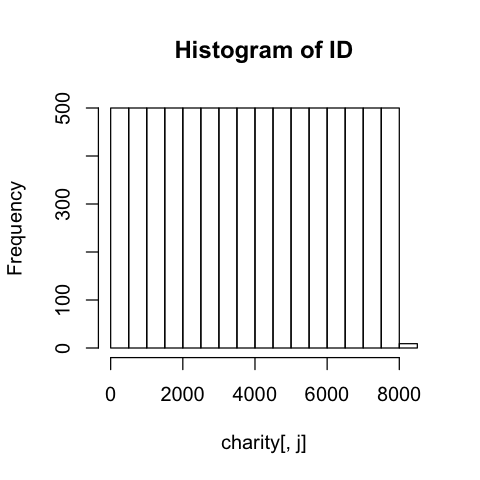

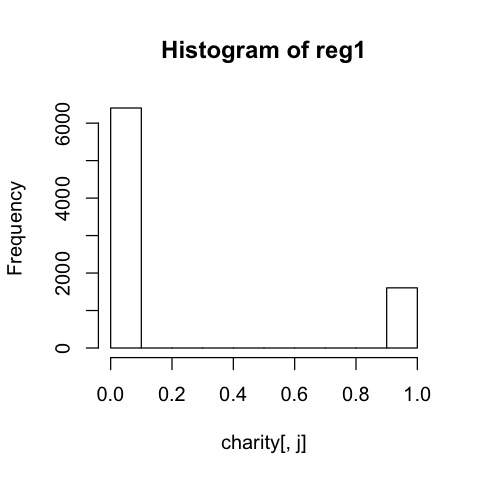

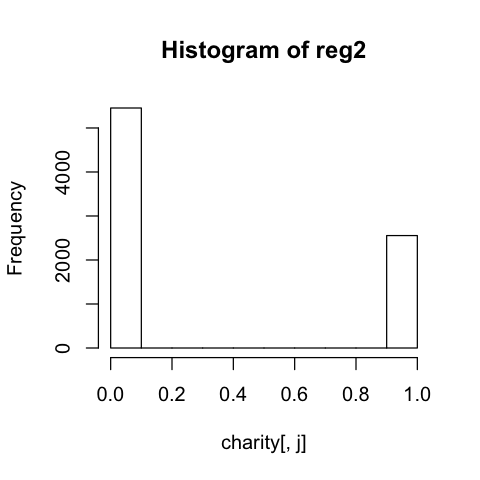

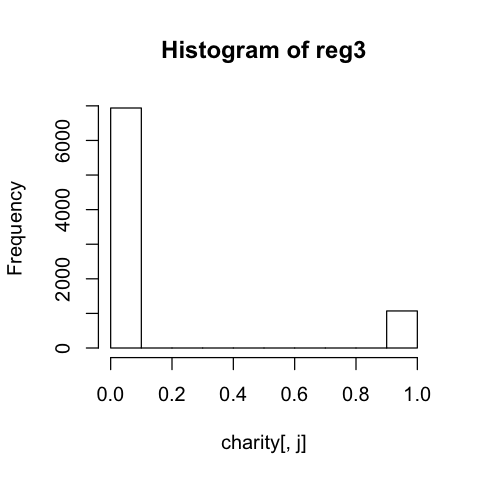

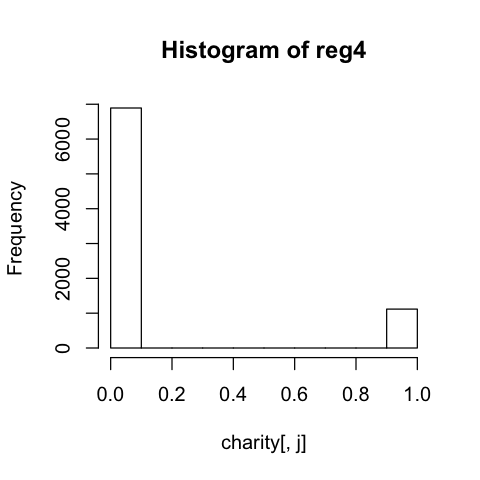

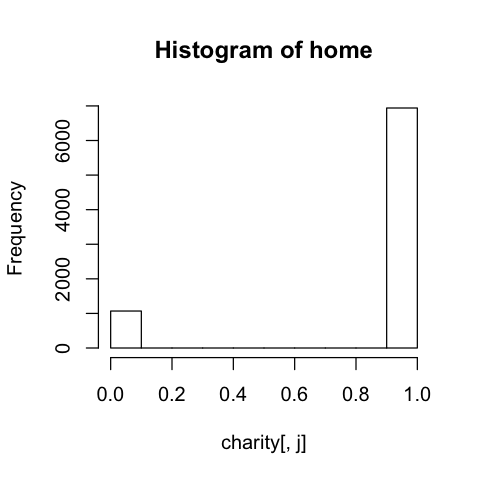

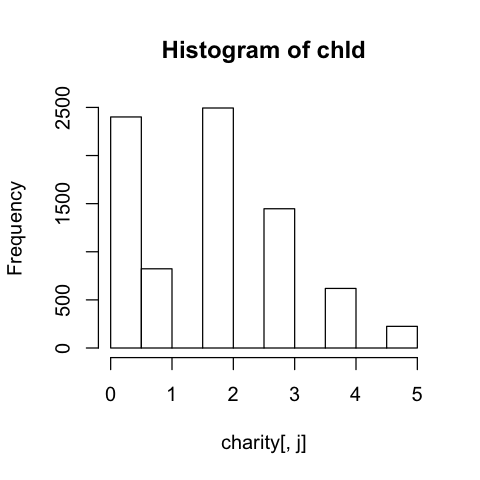

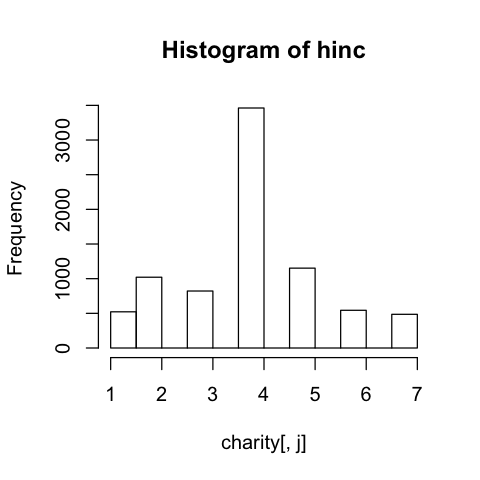

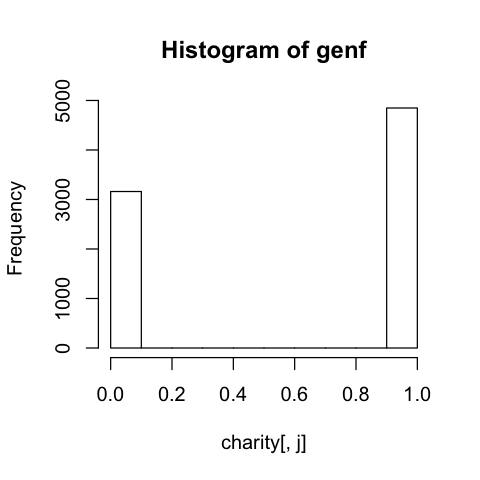

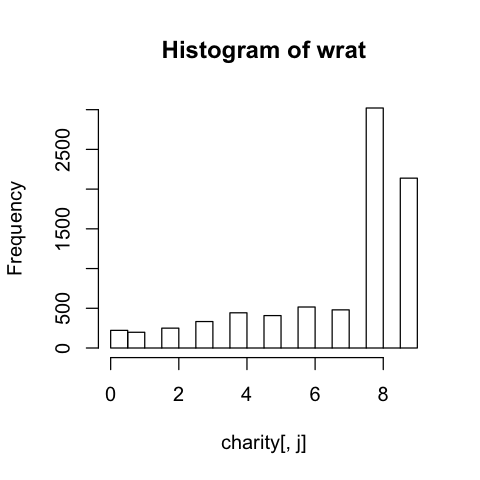

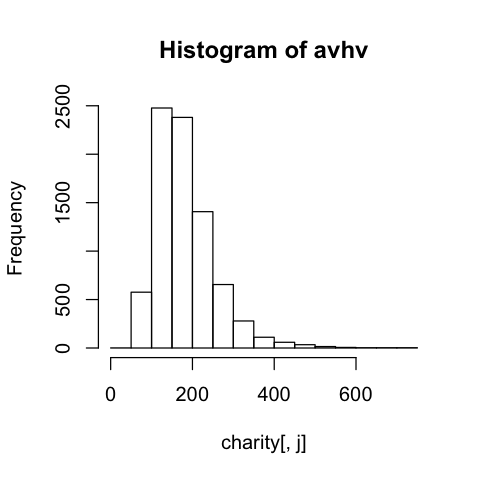

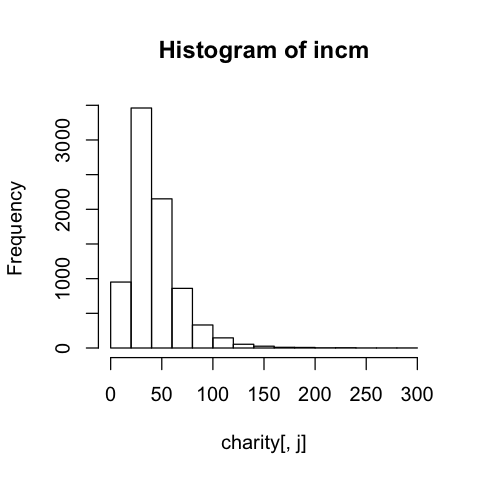

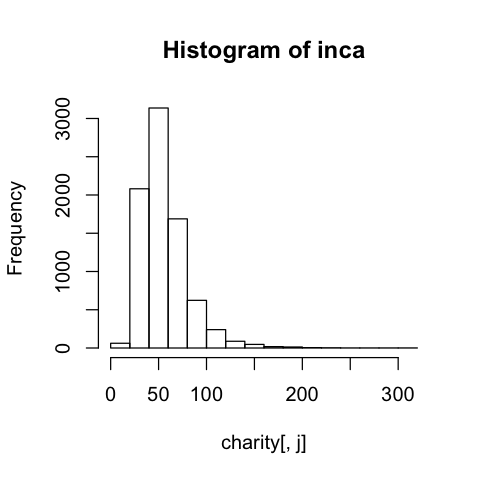

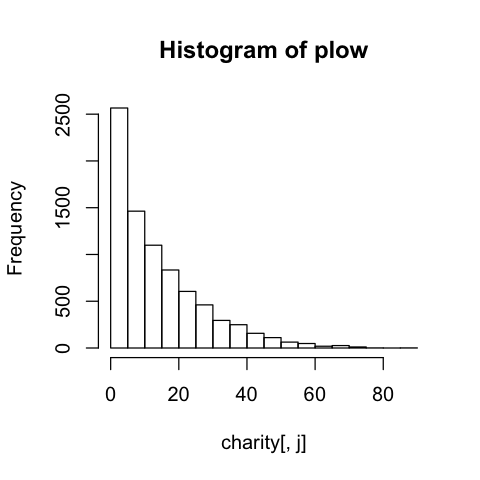

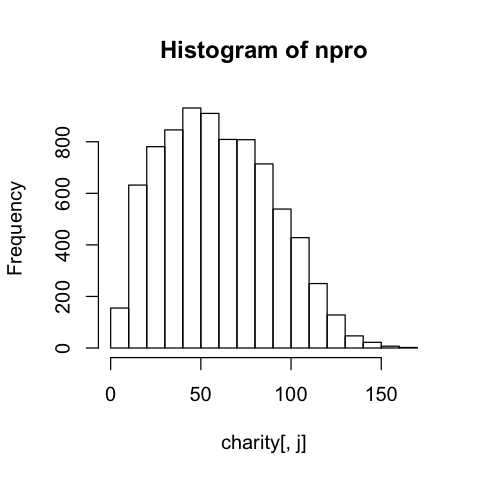

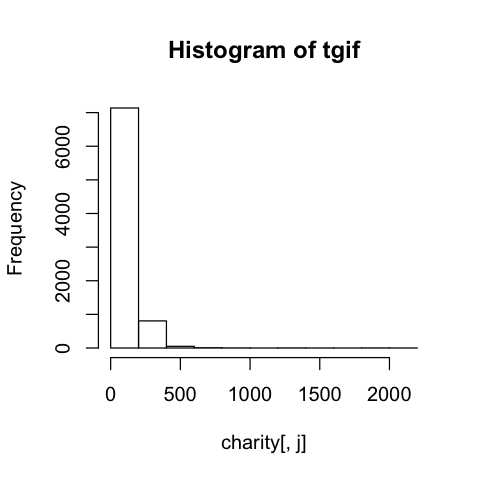

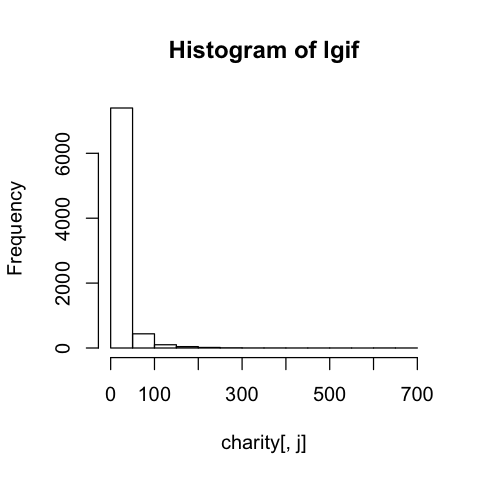

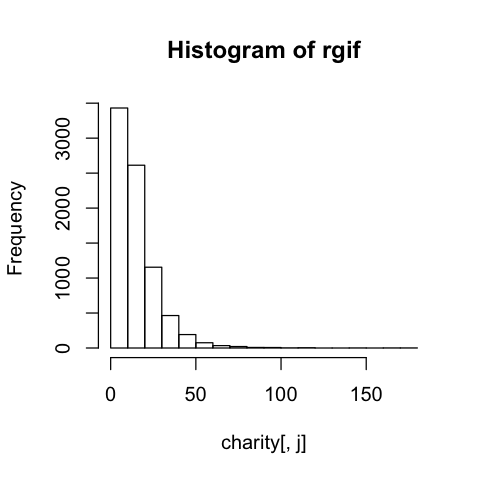

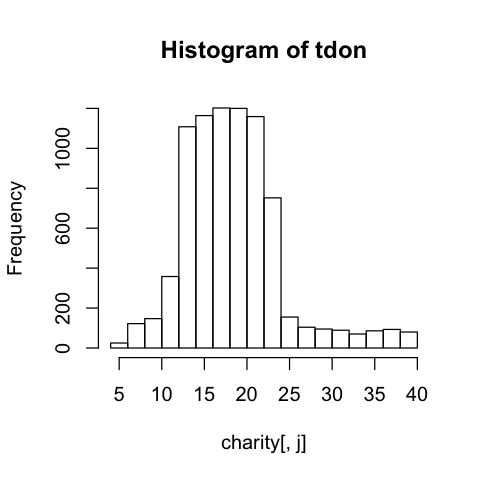

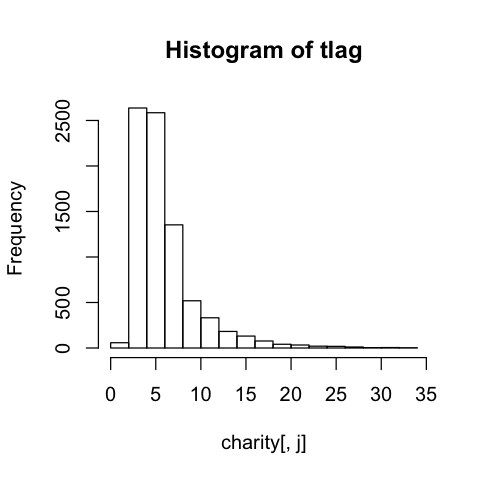

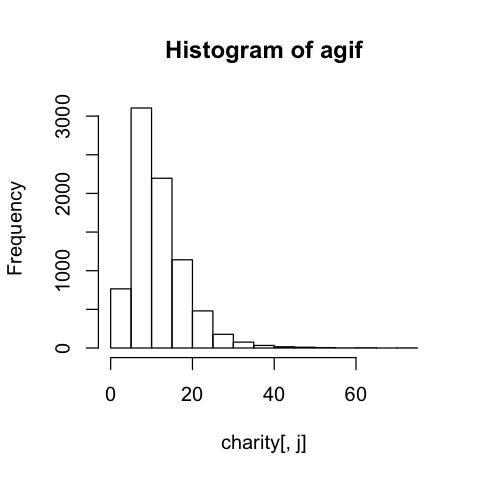

ERROR: Error in hist.default(charity[, j], main = paste("Histogram of", attributes(charity)$names[j])): 'x' must be numeric


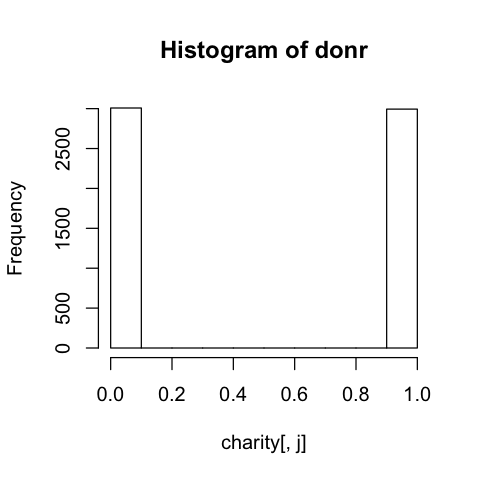

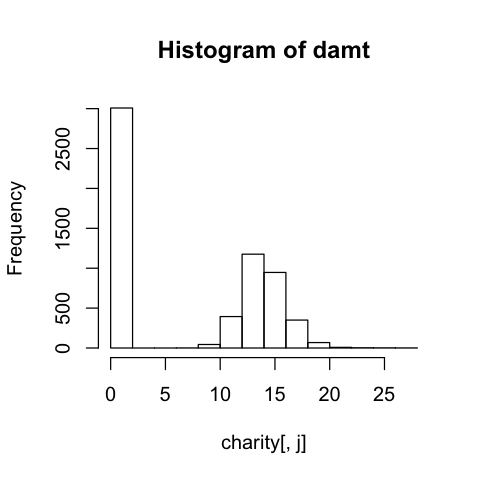

In [191]:
for (j in 1:dim(charity)[2]) {
    hist(charity[,j], main = paste("Histogram of" , attributes(charity)$names[j]))
}

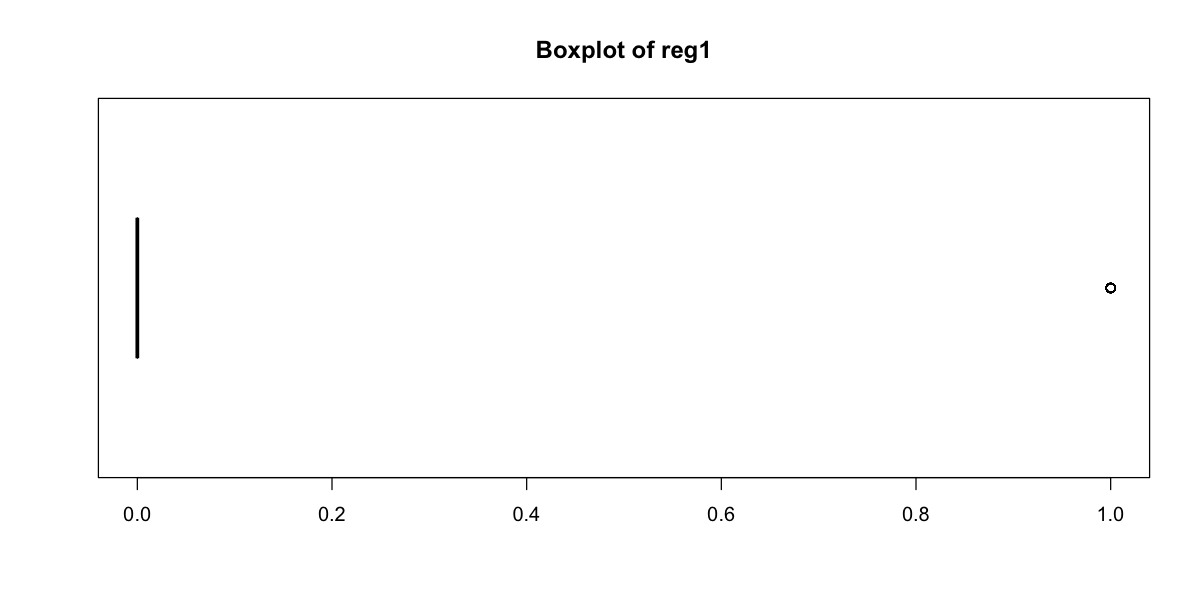

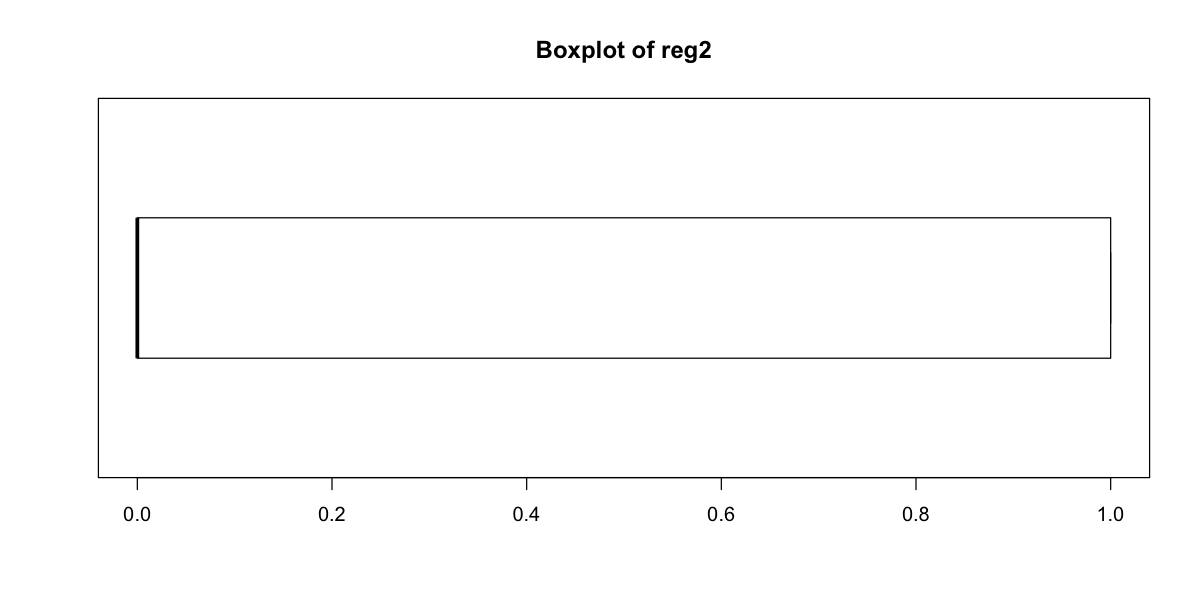

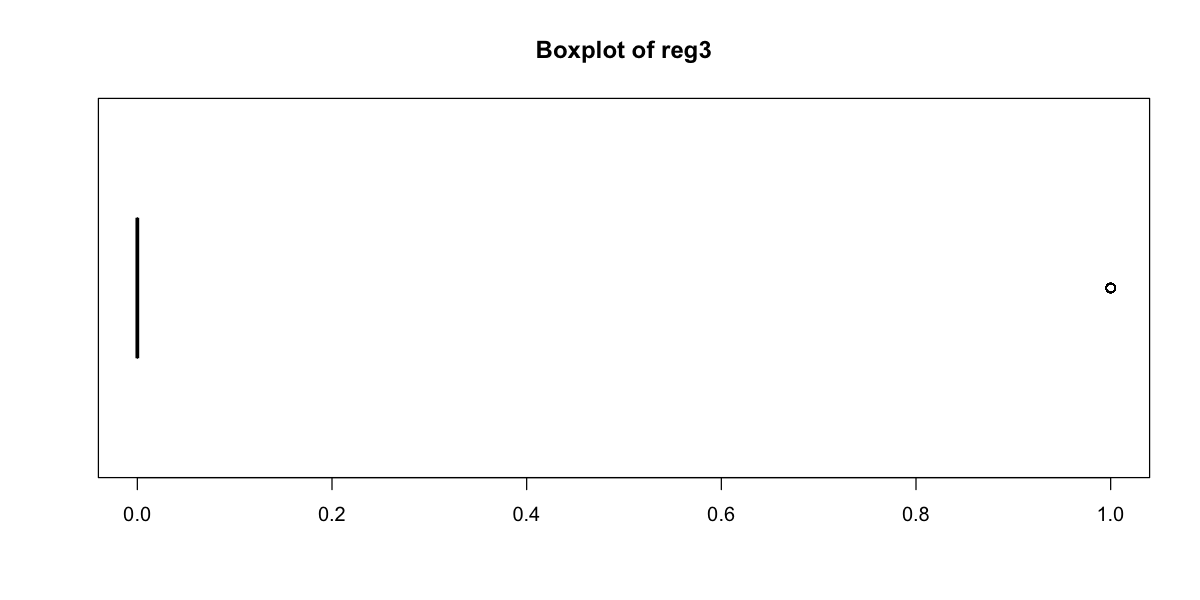

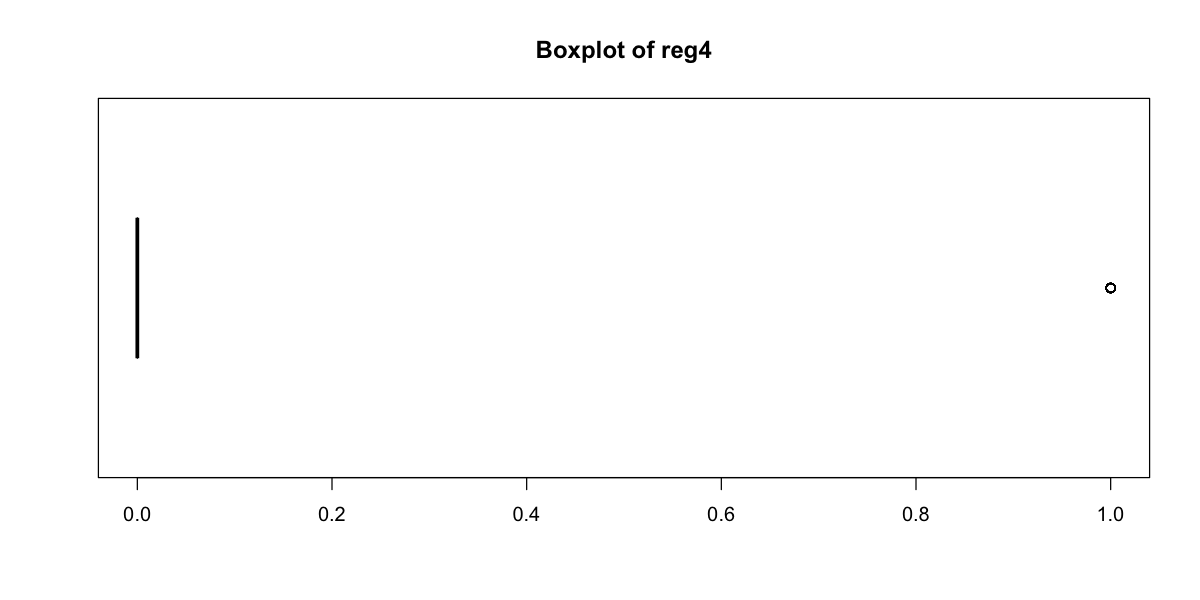

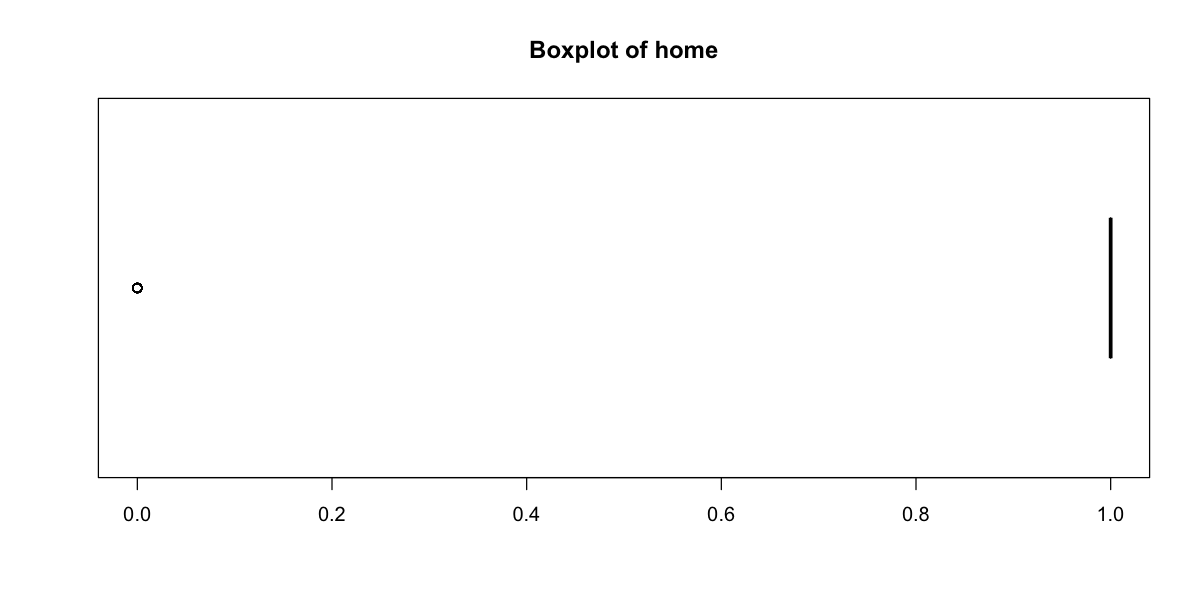

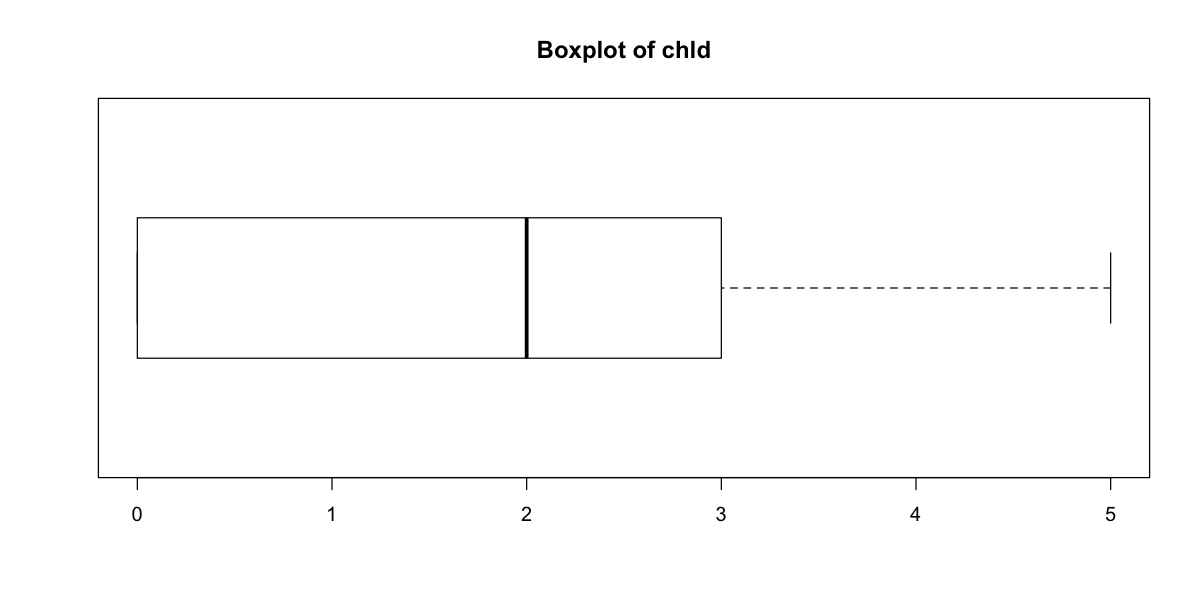

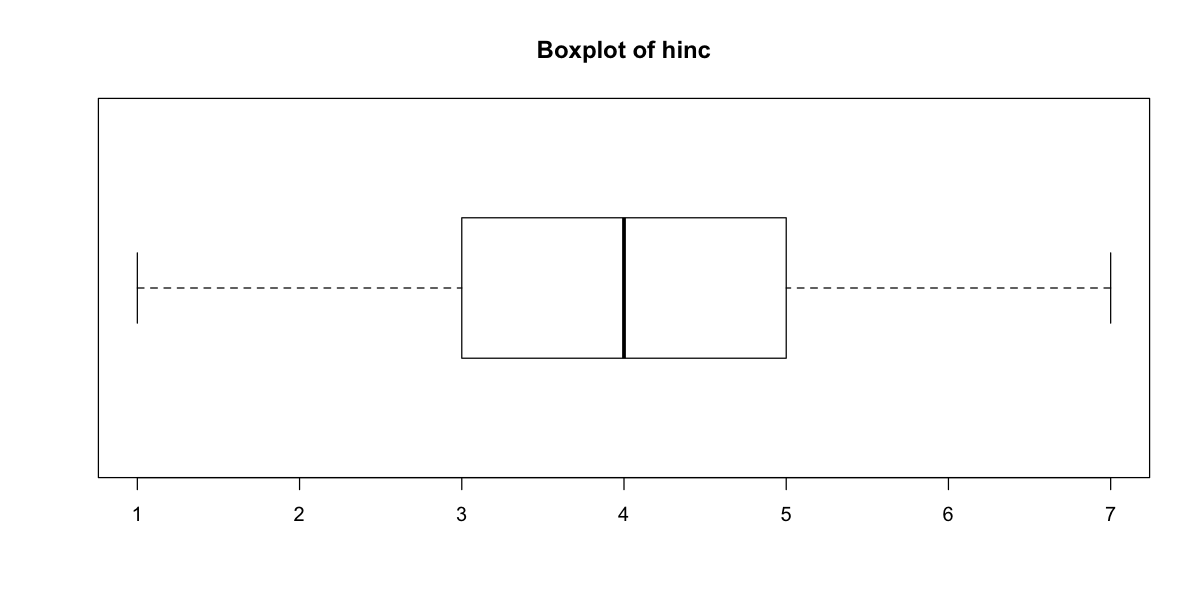

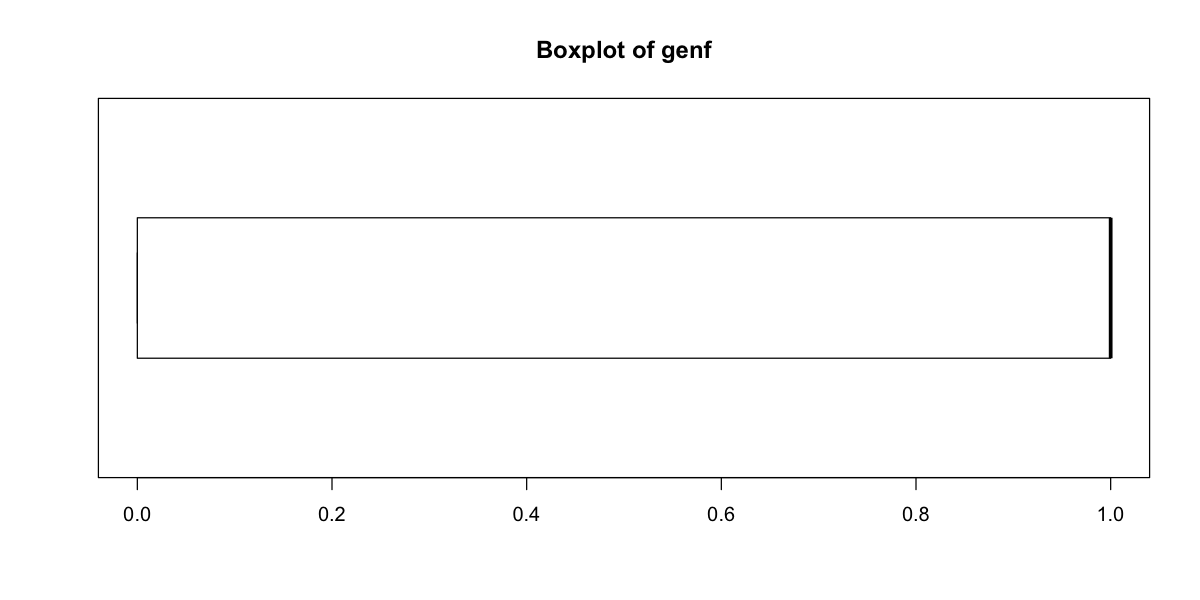

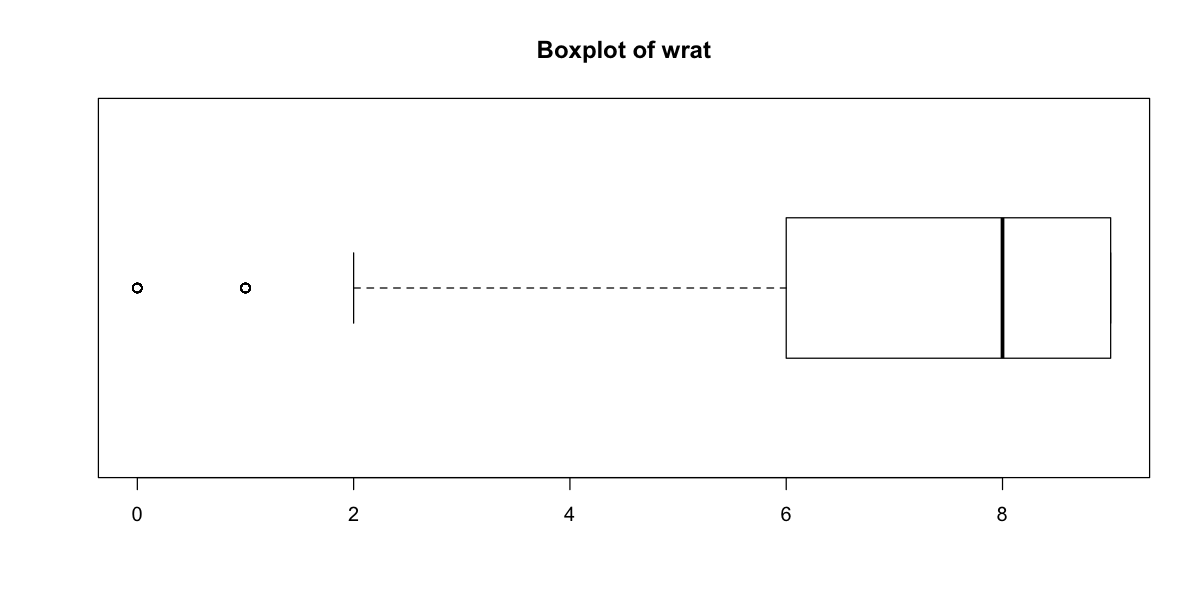

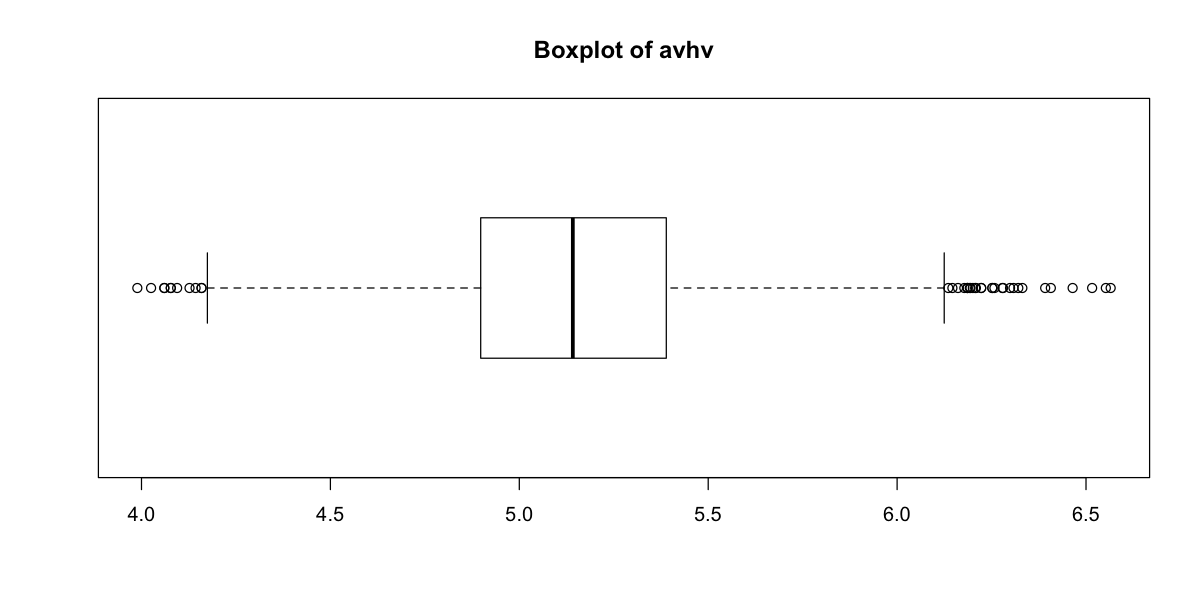

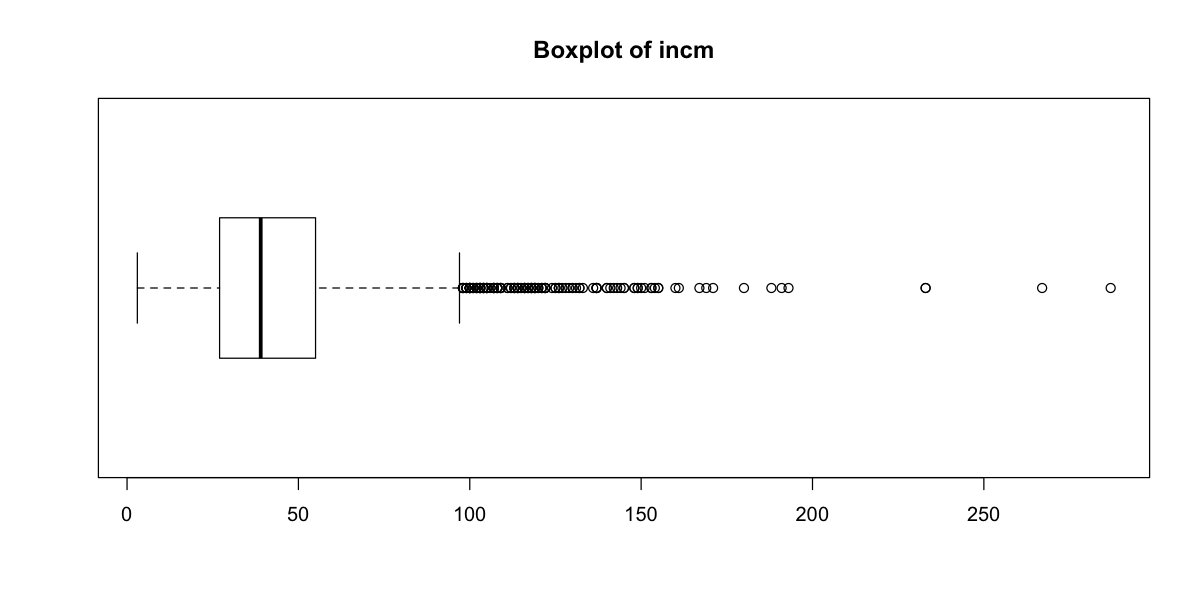

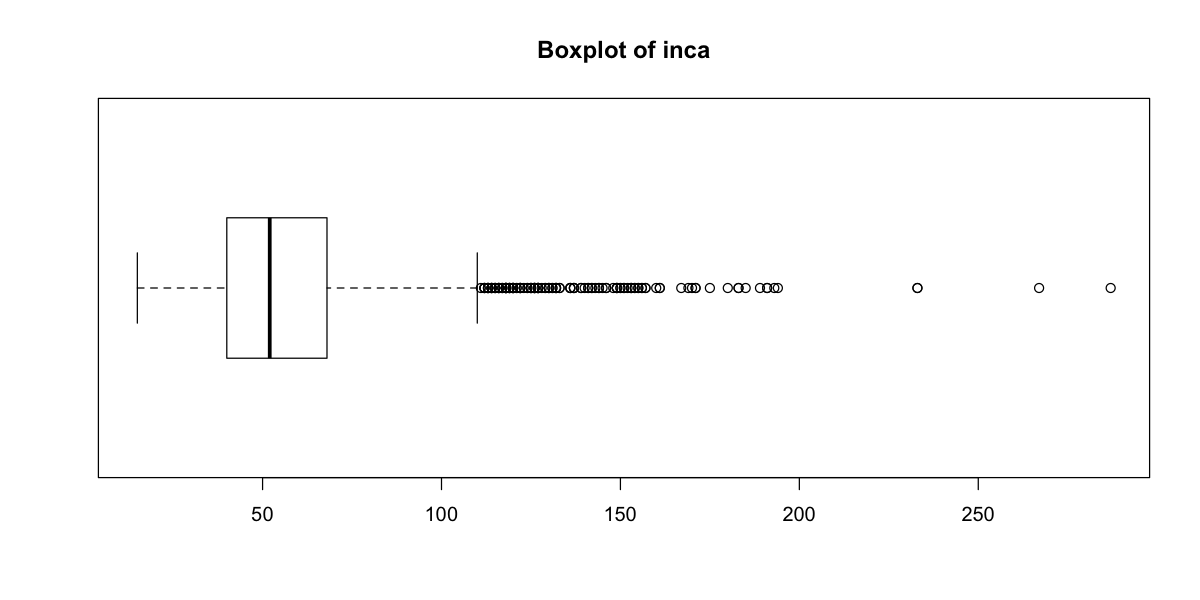

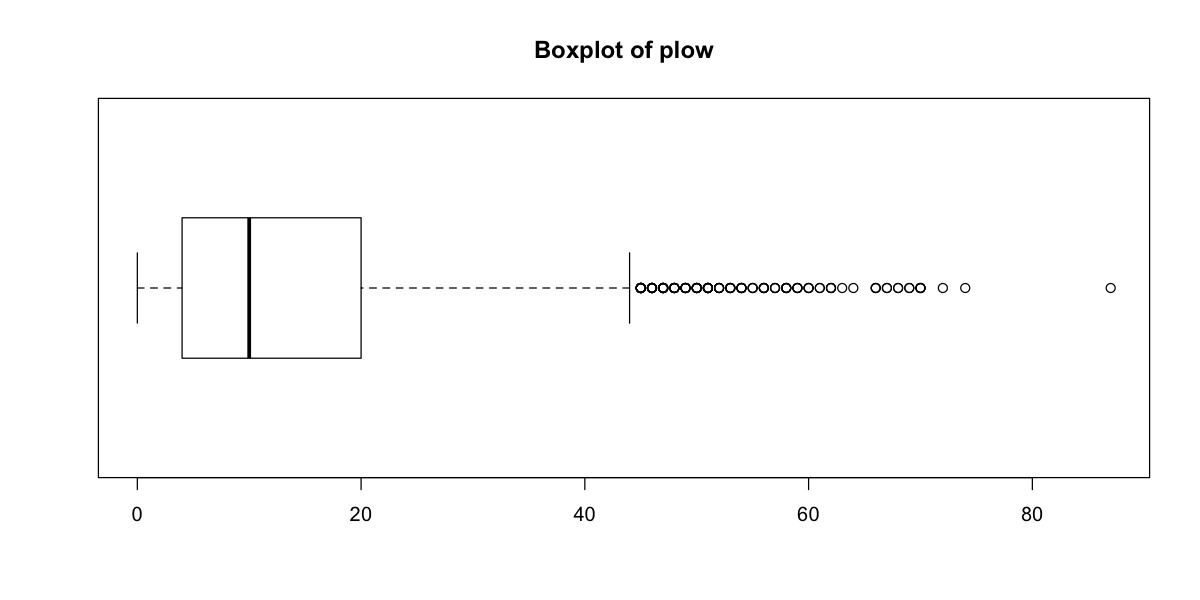

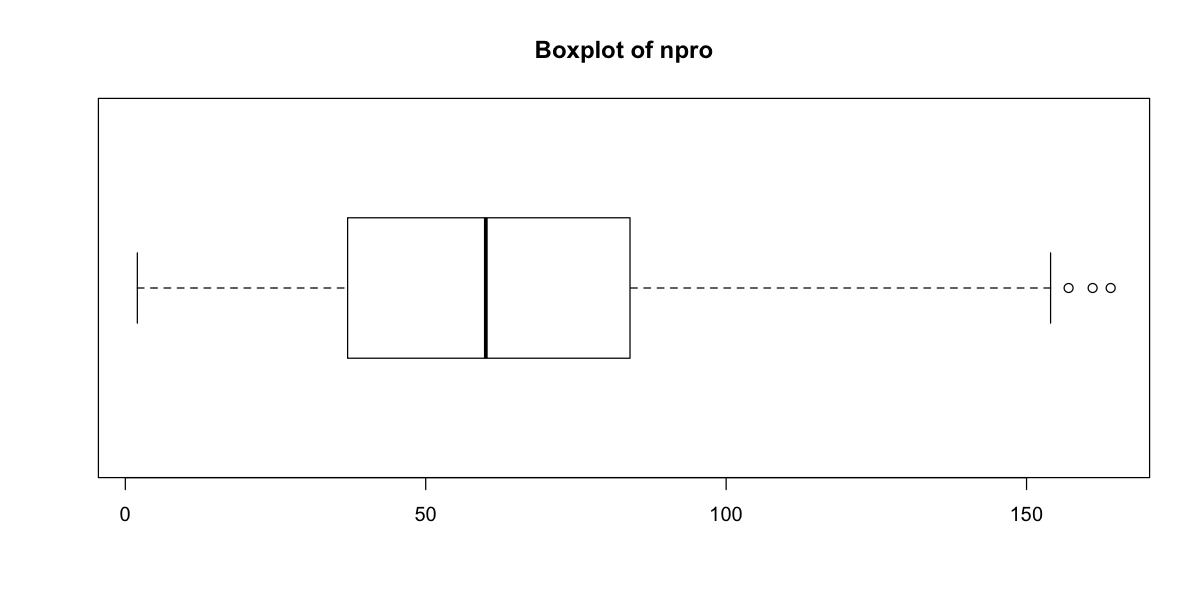

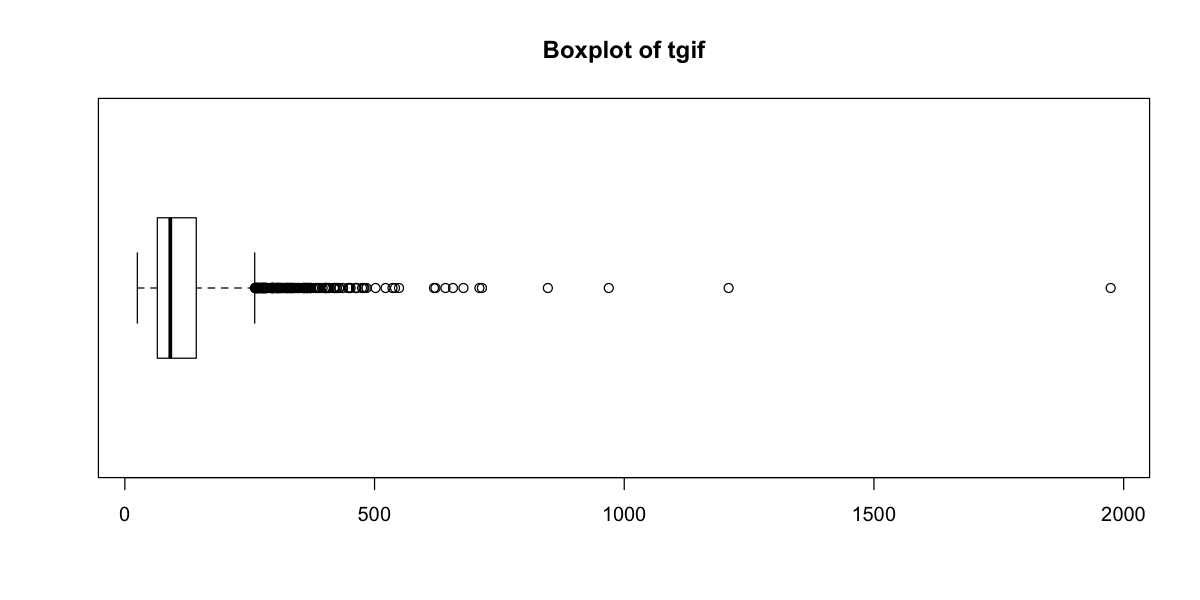

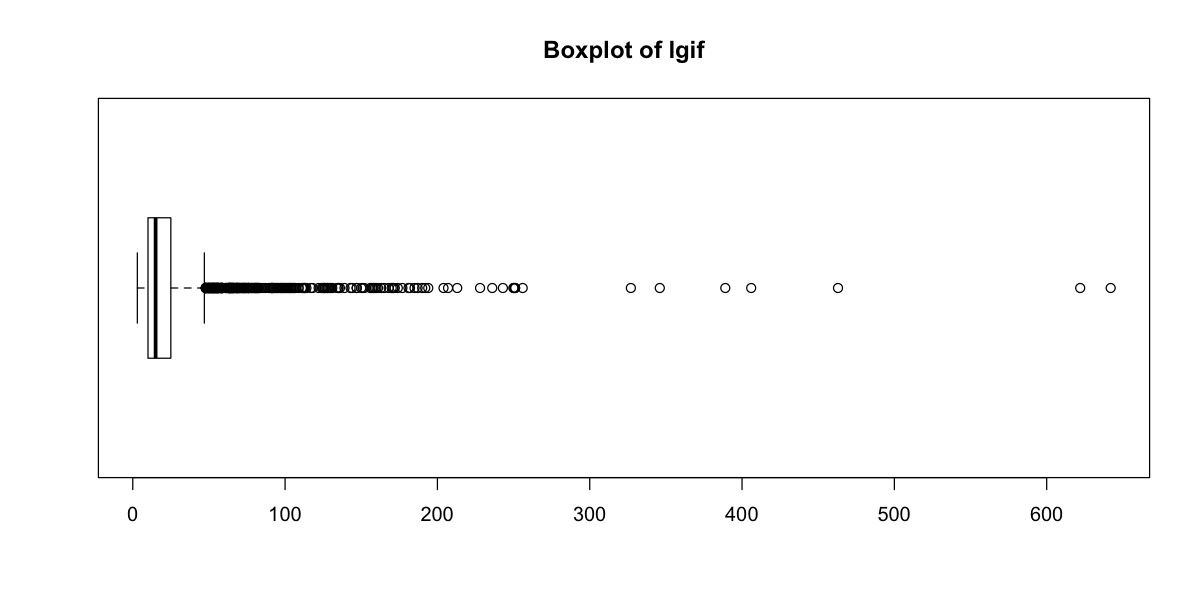

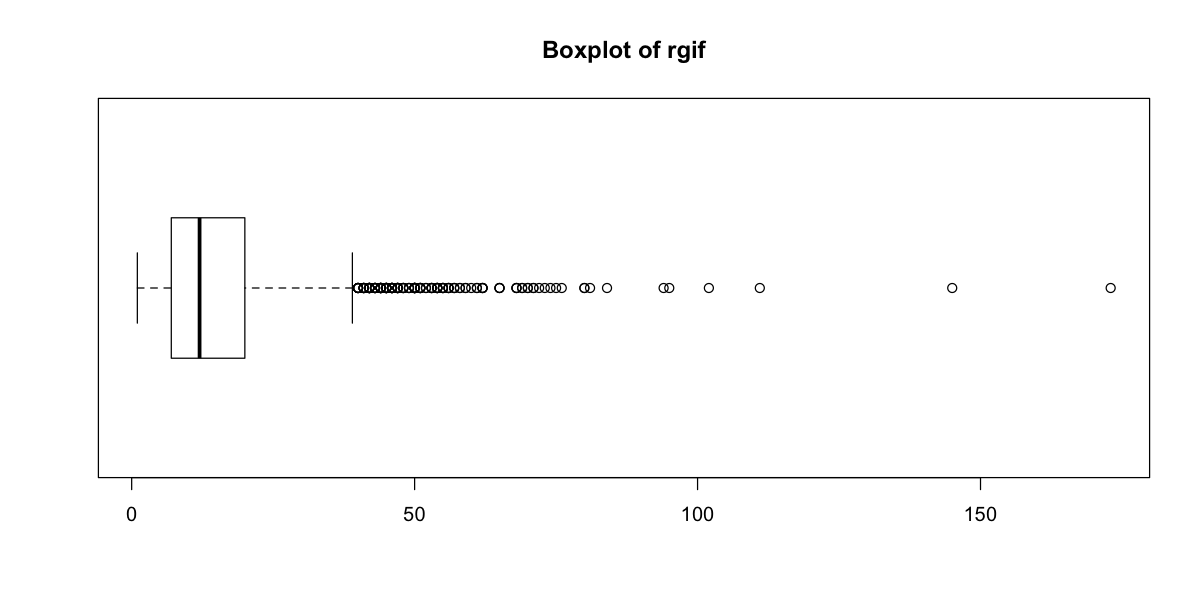

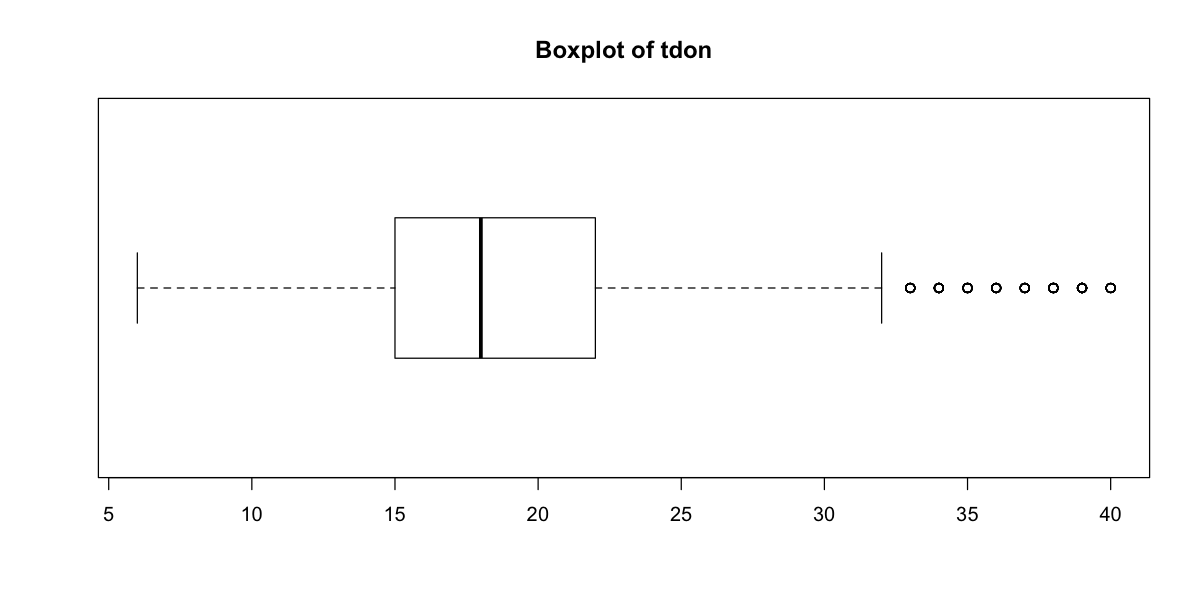

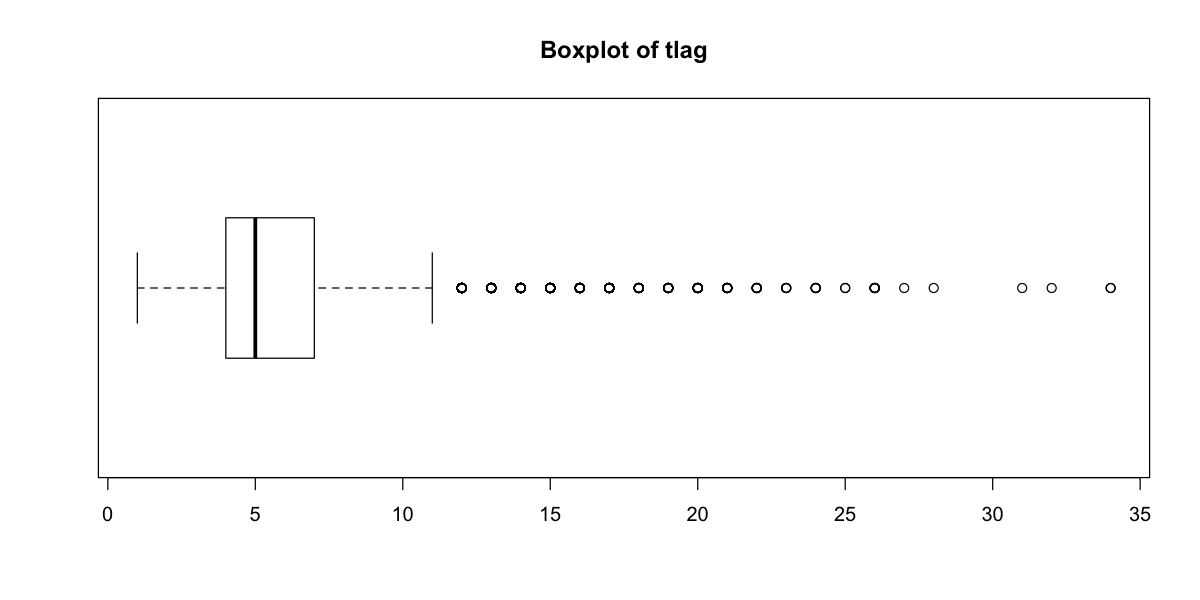

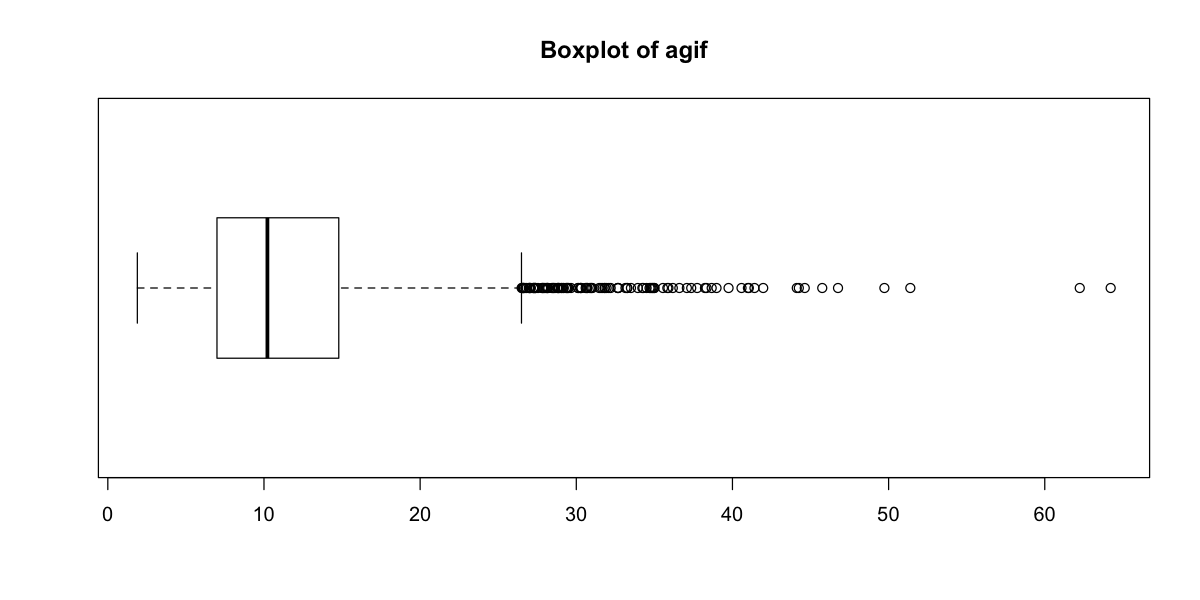

In [984]:
for (j in 1:dim(x.train)[2]) {
    boxplot(x.train[,j], horizontal=TRUE, 
    main = paste("Boxplot of" , attributes(x.train)$names[j]))
}

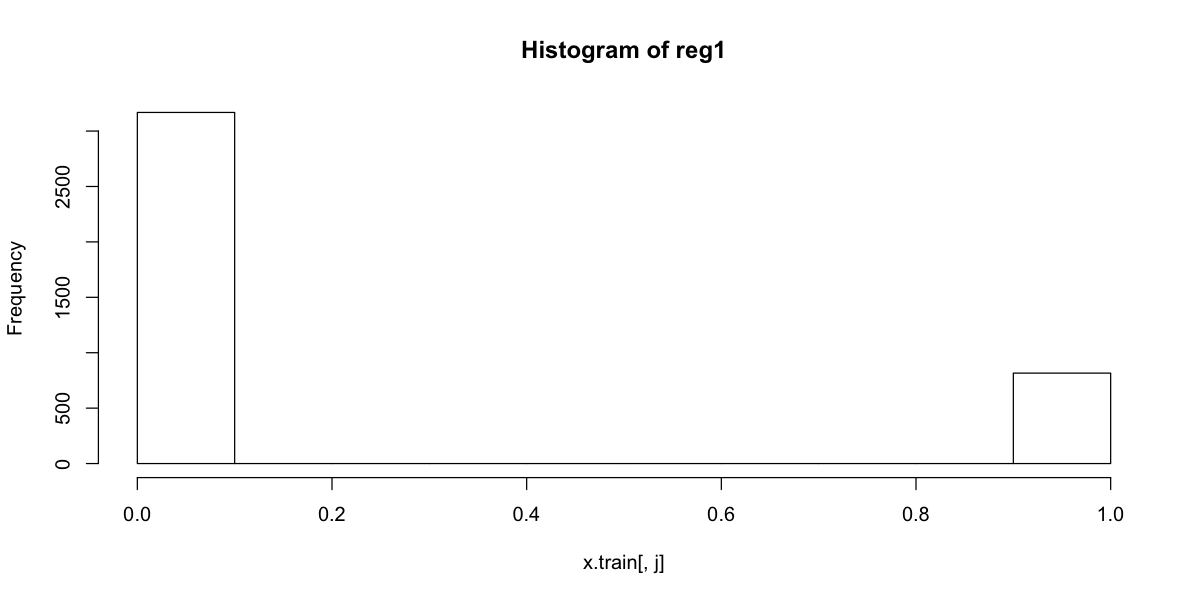

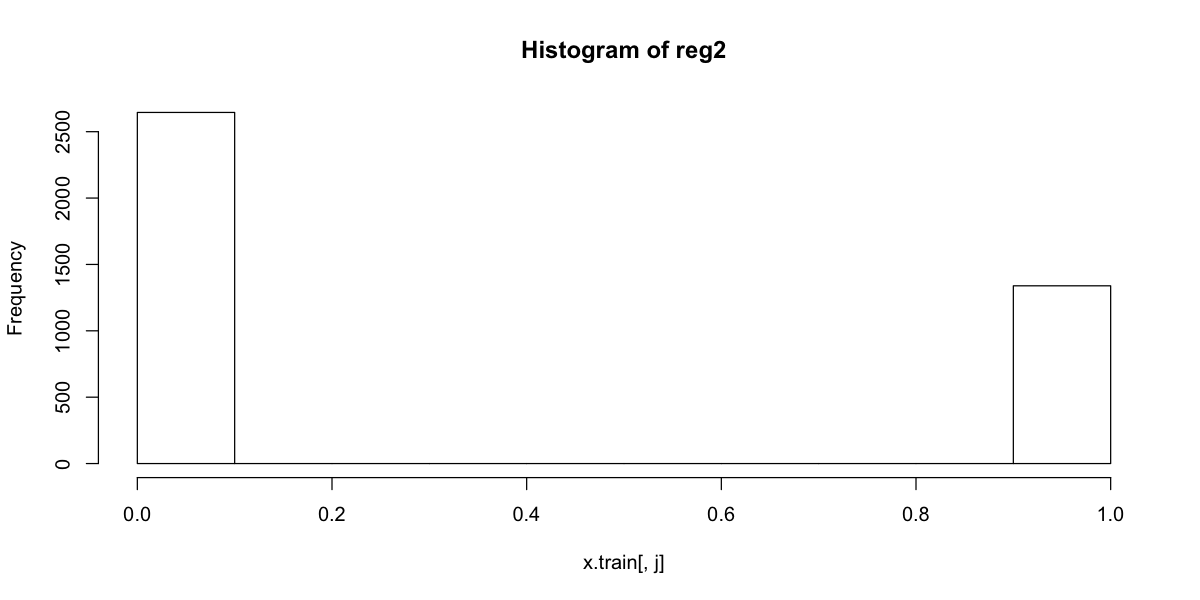

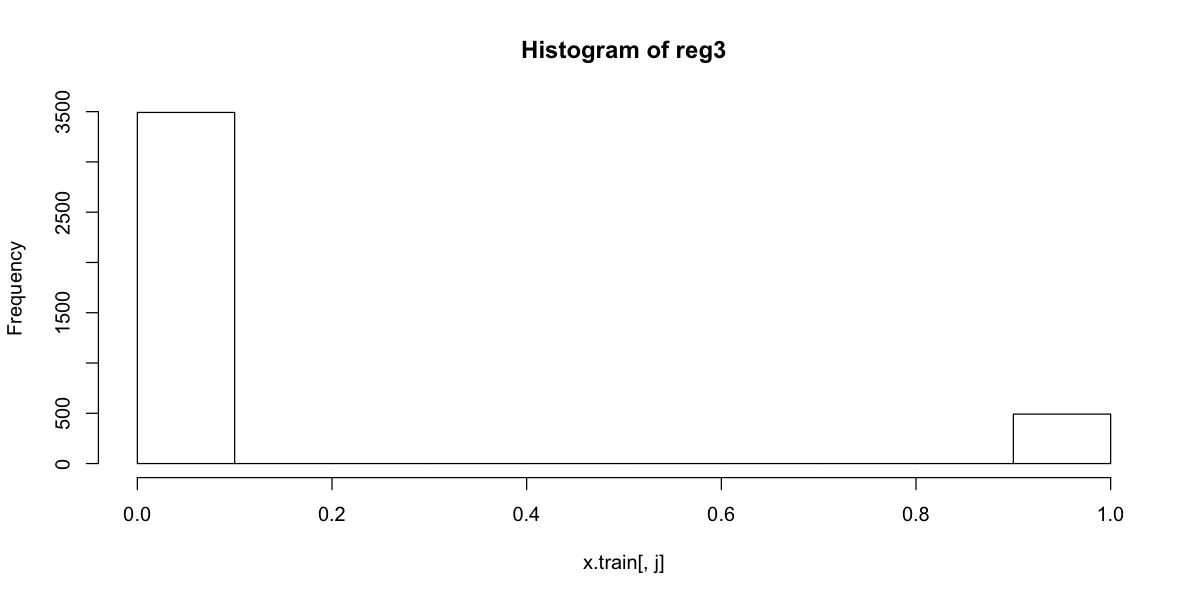

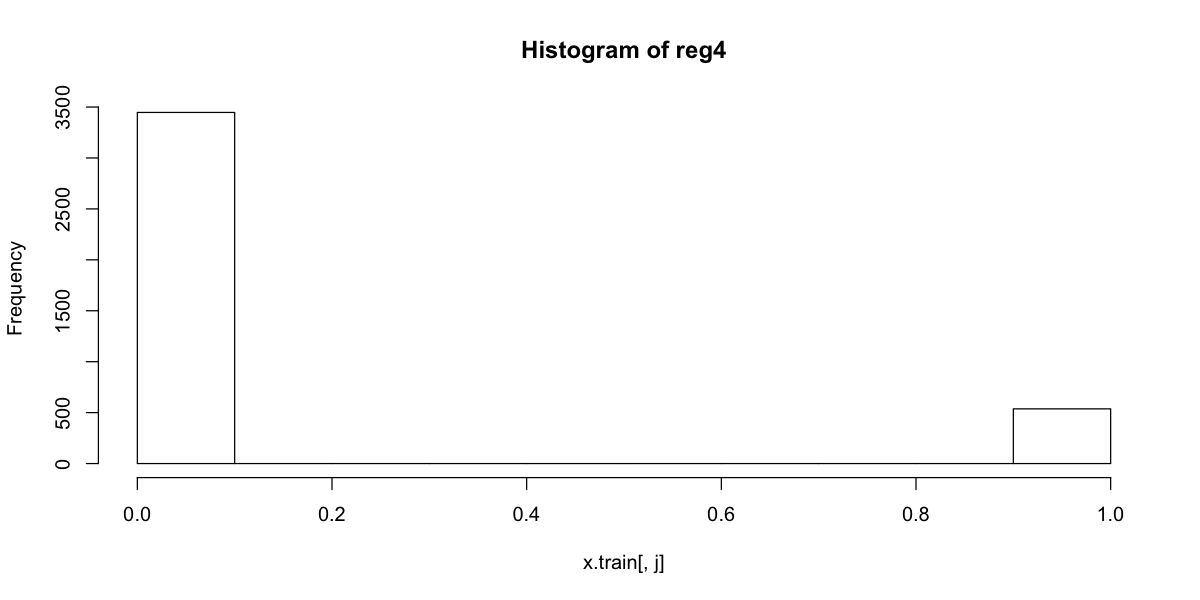

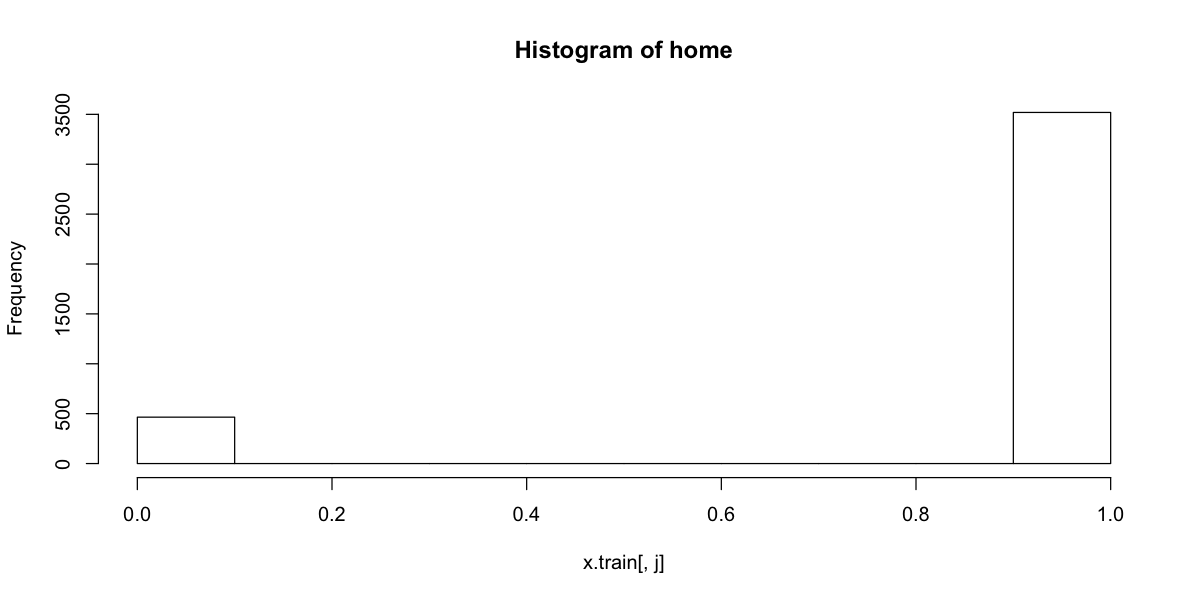

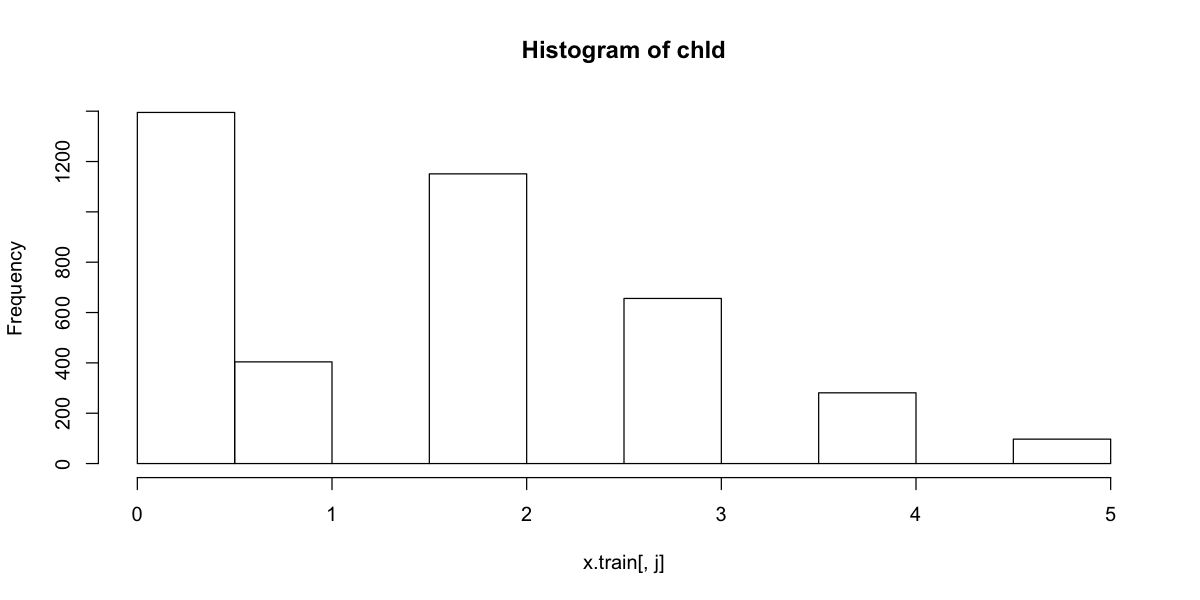

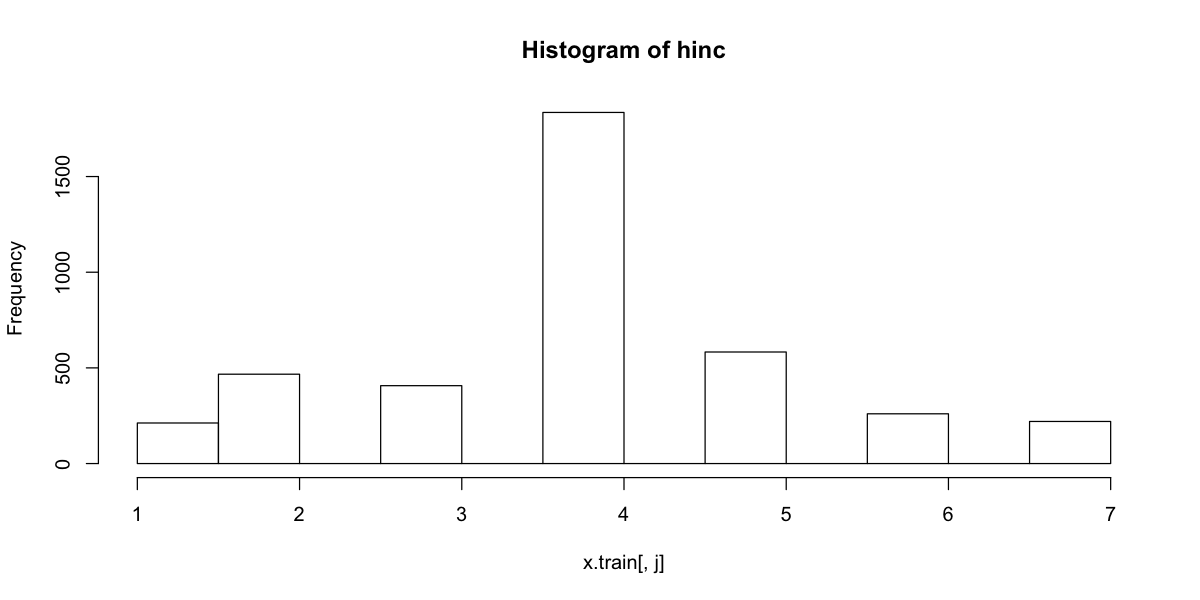

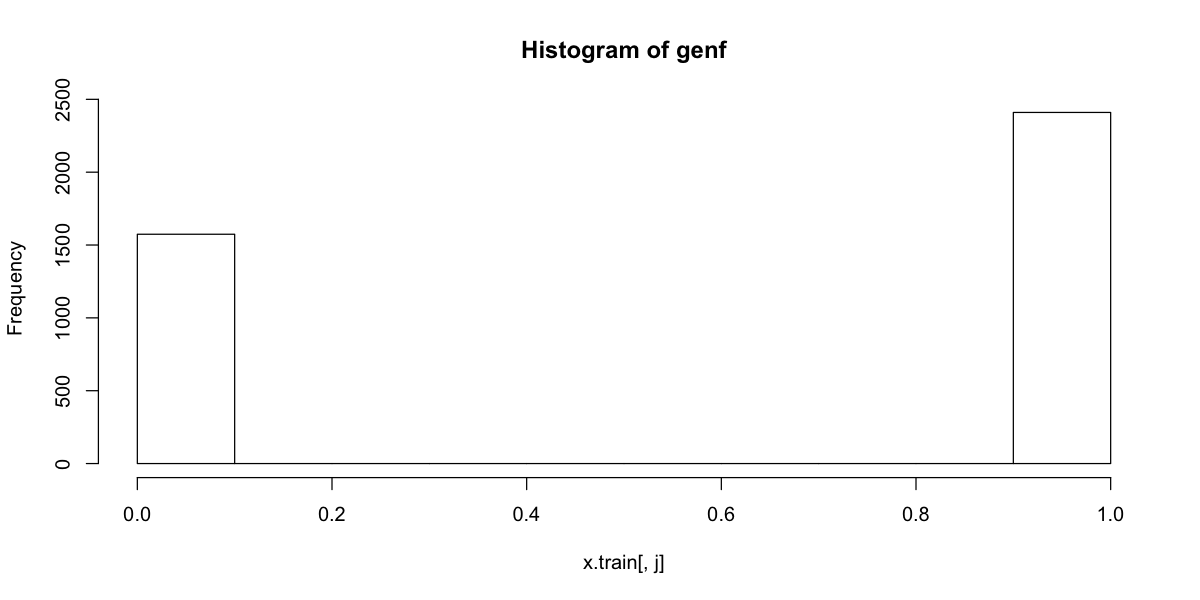

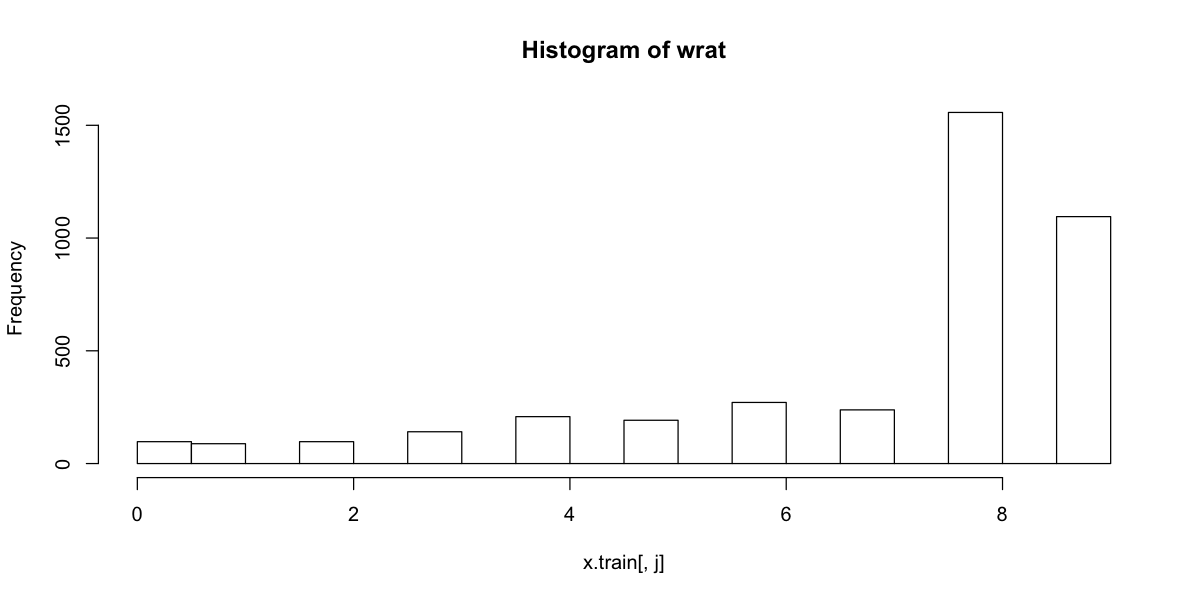

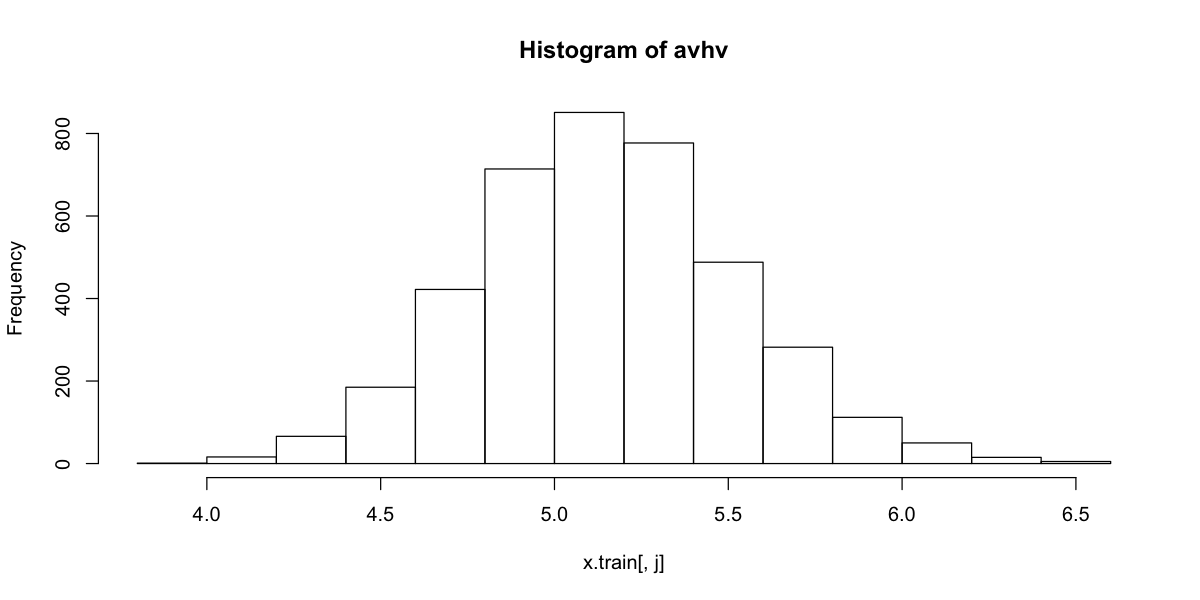

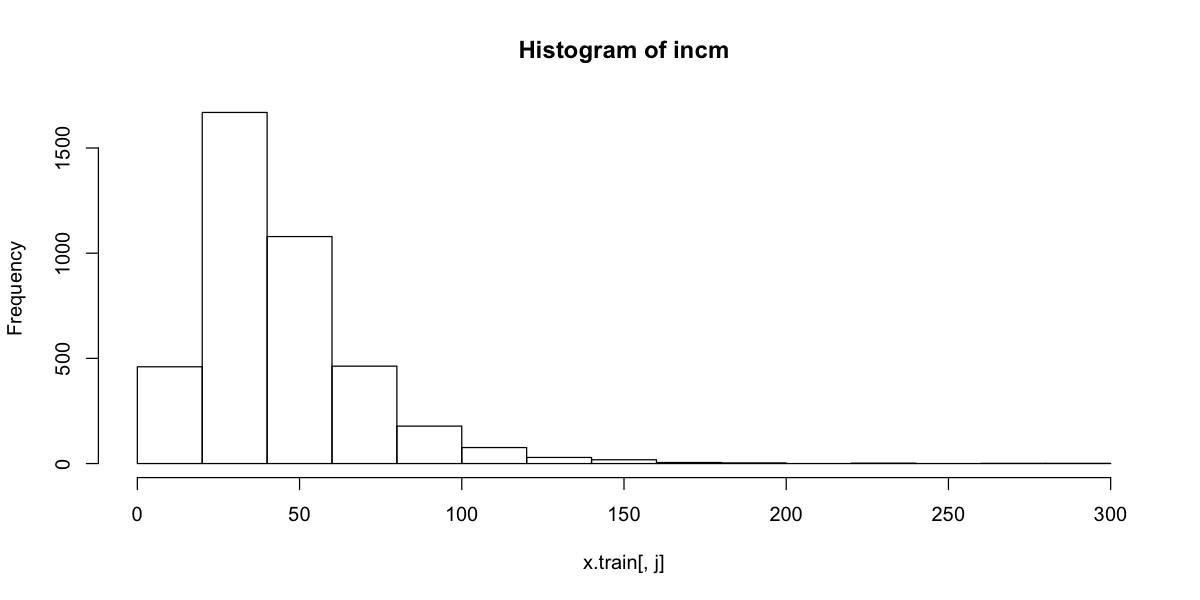

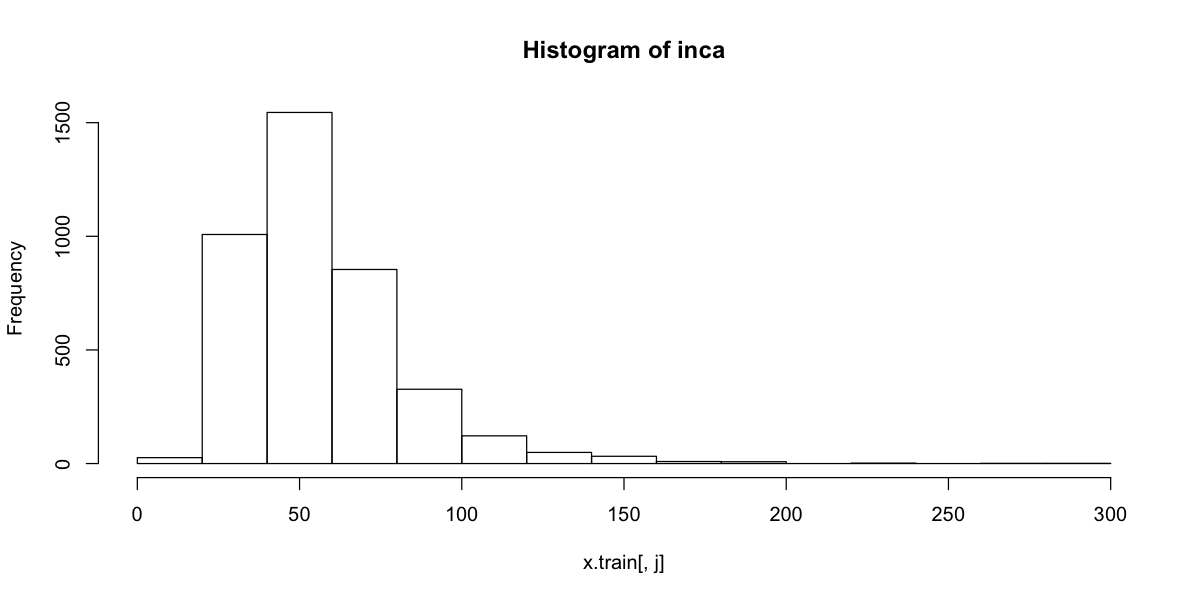

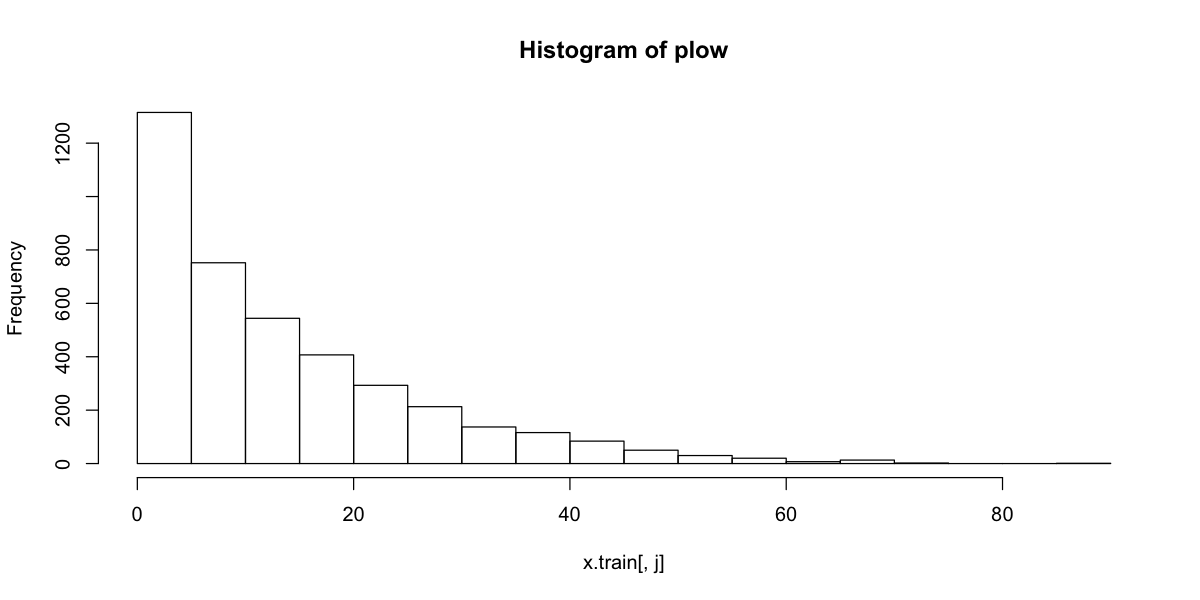

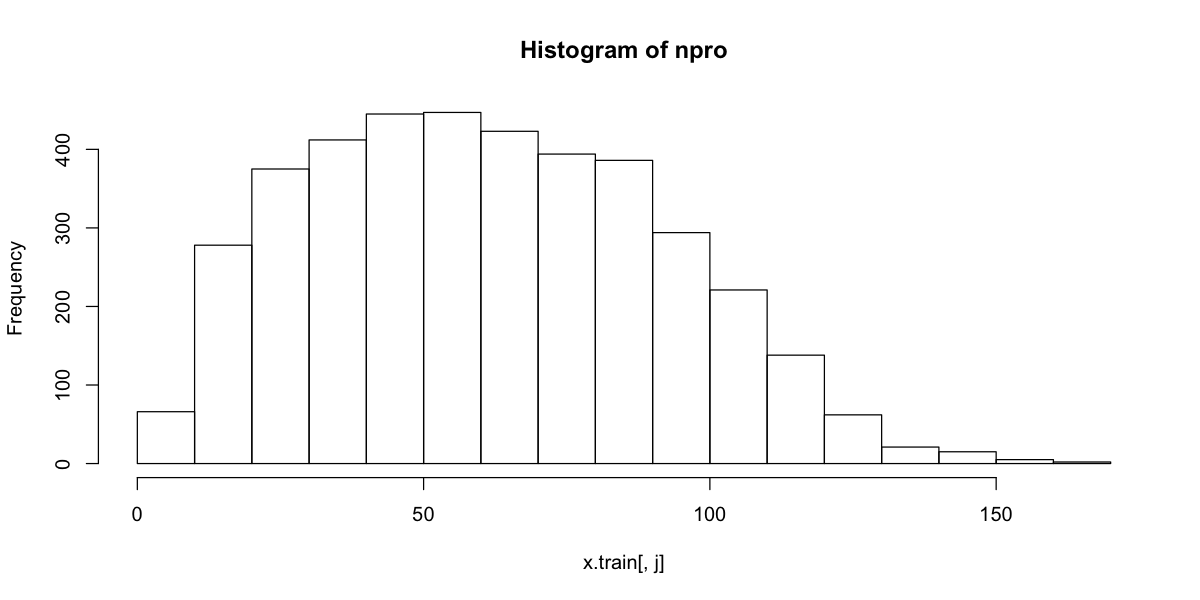

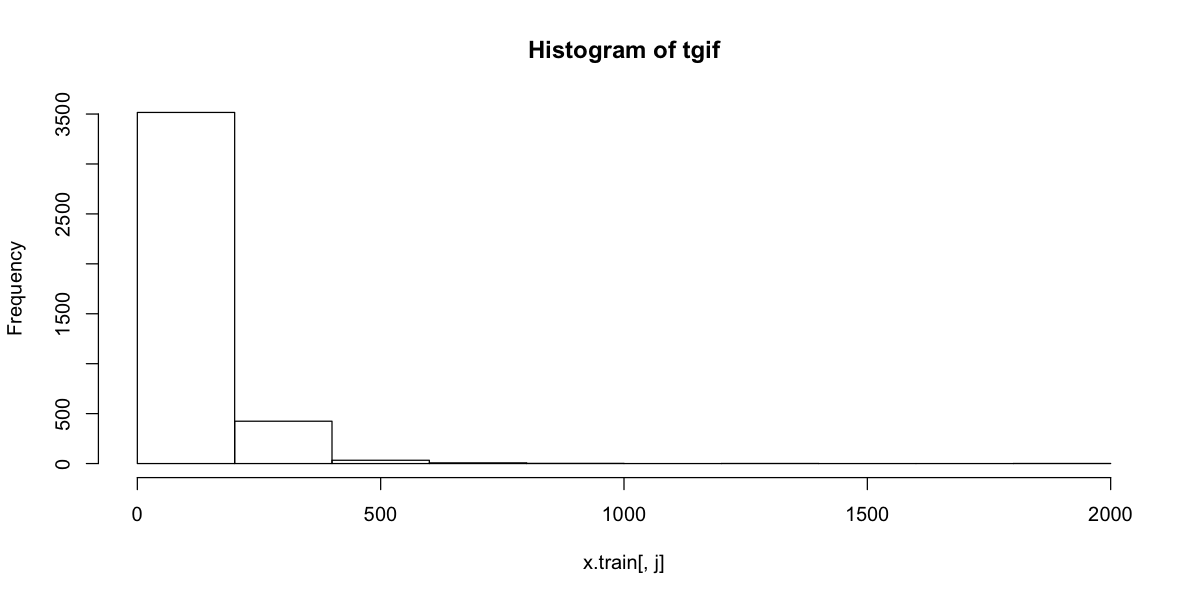

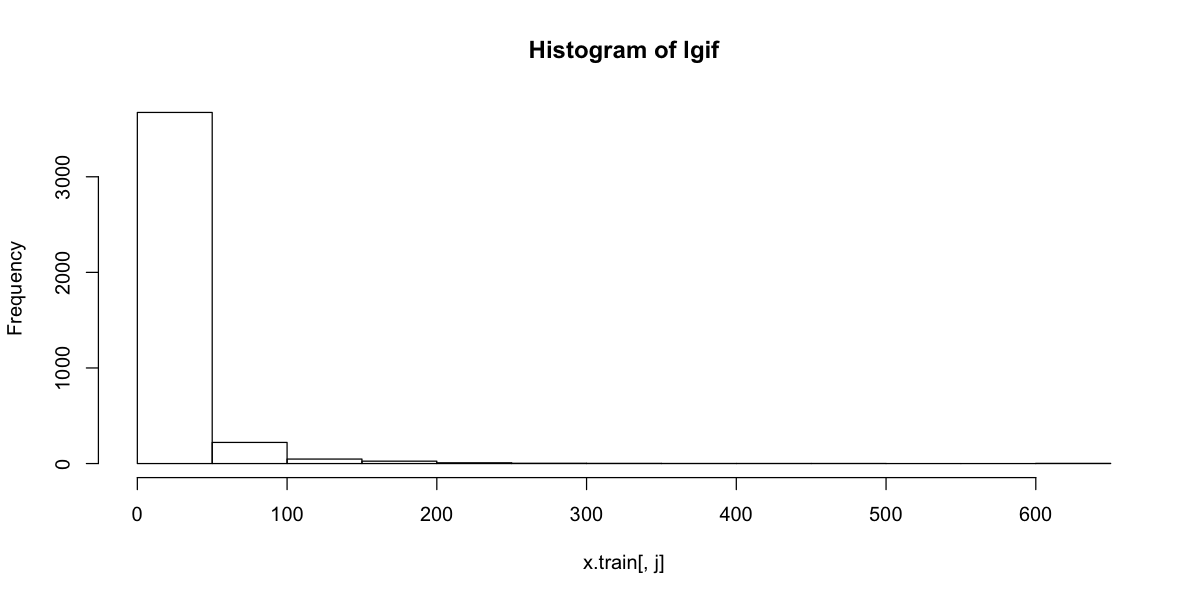

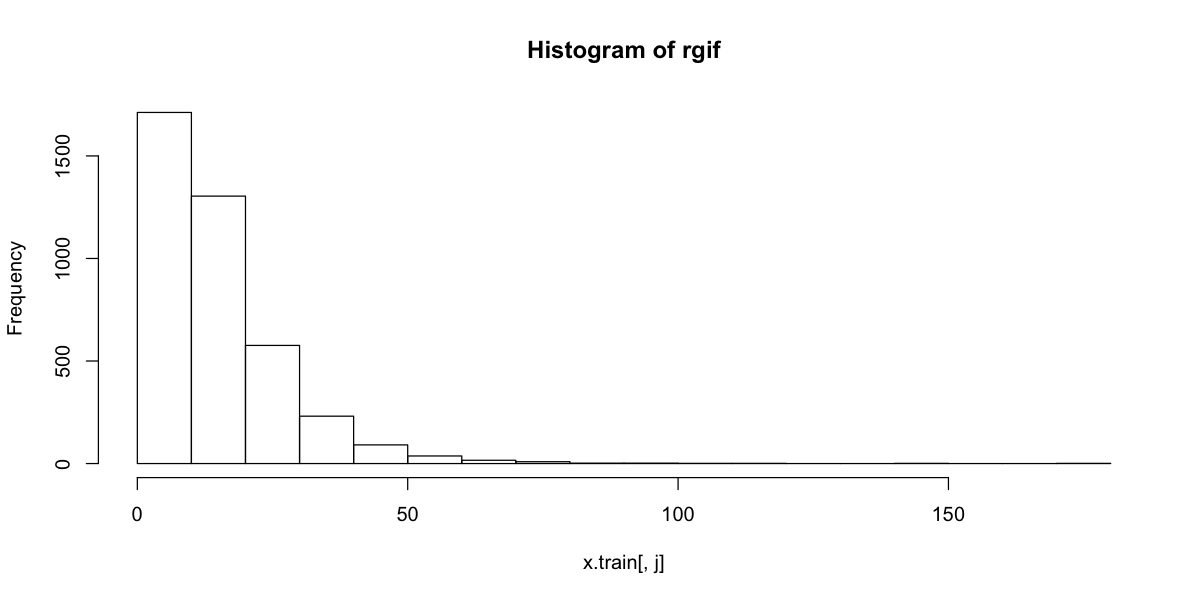

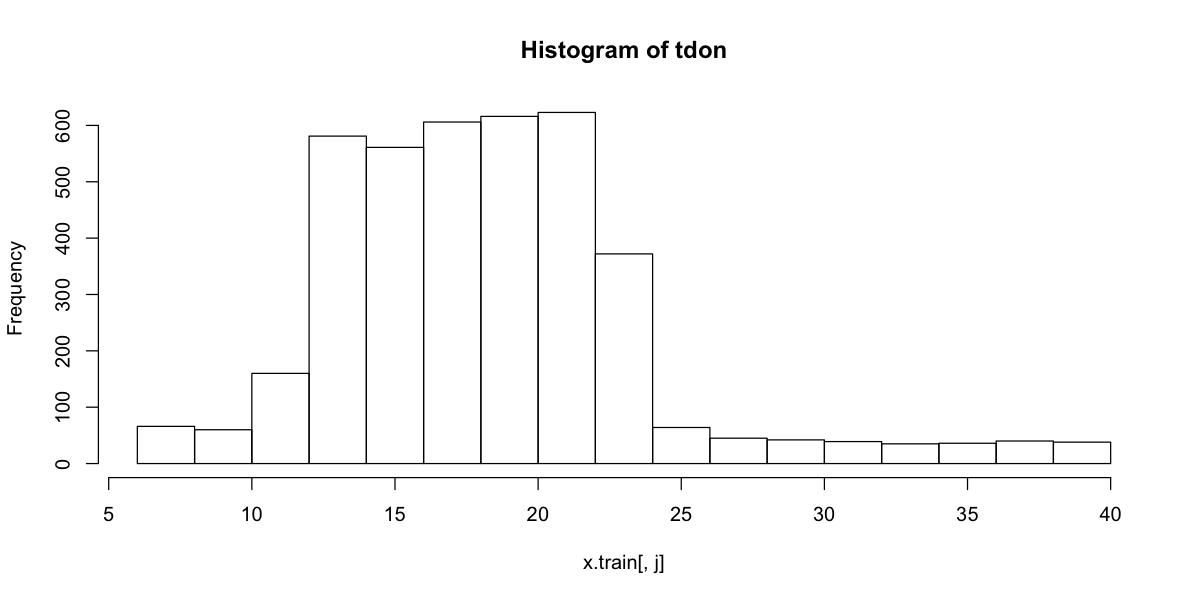

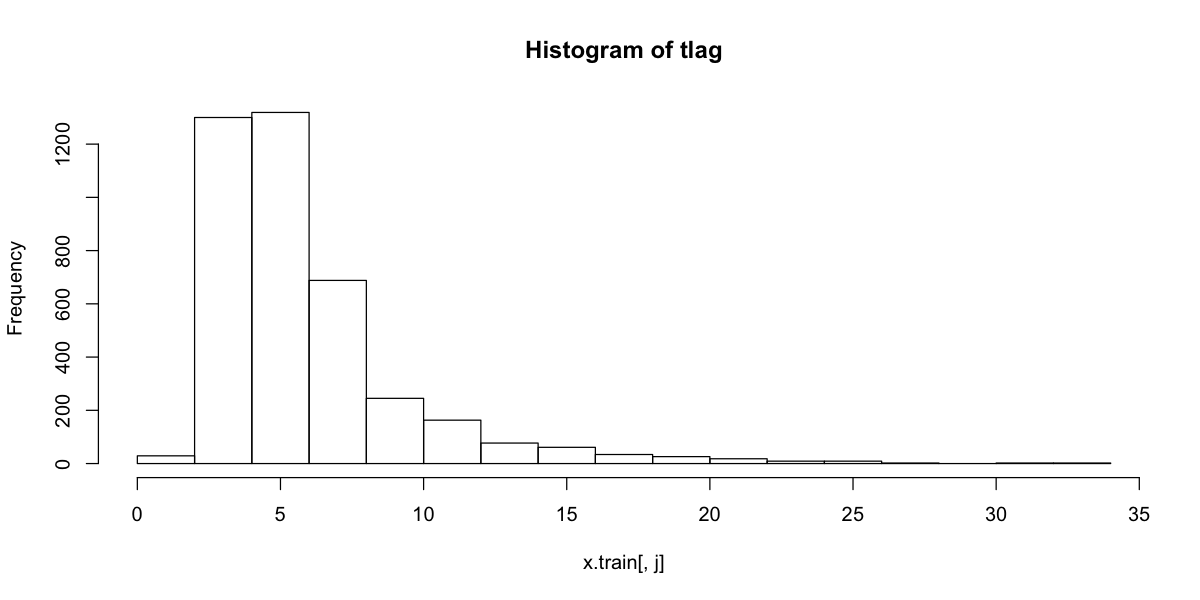

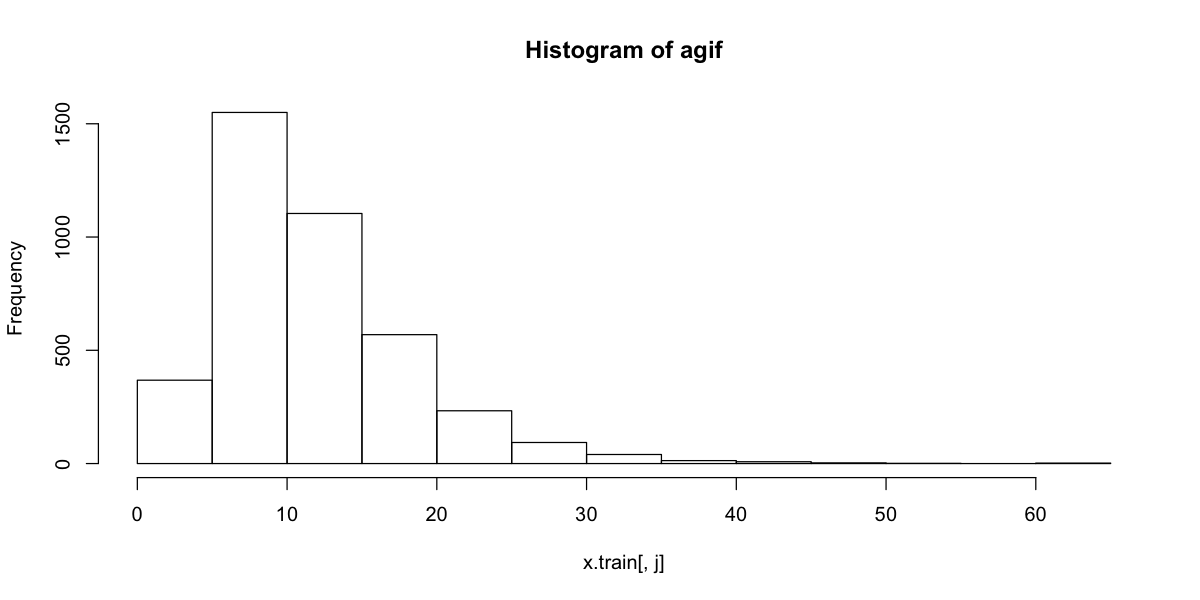

In [988]:
for (j in 1:dim(x.train)[2]) {
    hist(x.train[,j], main = paste("Histogram of" , attributes(x.train)$names[j]))
}

# Log Transform numeric variables with skewed distributions

I will run each model with log transformed variables.  Each has a skewed distribution: <br>
chld, tgif, lgif, wrat, incm,inca,plow,rgif,tlag,agif. (avhv has already been logged)

In [9]:
# make x.train.log df with just the above variables logged
log_vars=c('chld', 'tgif', 'lgif', 'wrat', 'incm','inca','plow', 'rgif','tlag','agif')
x.train.log<-data.frame('index'=1:dim(x.train)[1])
for (j in attributes(x.train)$names){
    if (any(log_vars==j)) {
           x.train.log[j]<-log(x.train[j]+1) #log(0) is undefined, so translate by small amt
    } else{
            x.train.log[j]<-x.train[j]
      }
}
x.train.log<-x.train.log[-1]

In [10]:
# make data.valid.log df with just the above variables logged
data.valid.log<-data.frame('index'=1:dim(data.valid)[1])
for (j in attributes(data.valid)$names){
    if (any(log_vars==j)) {
           data.valid.log[j]<-log(data.valid[j]+1) 
    } else{
           data.valid.log[j]<-data.valid[j]
      }
}
data.valid.log<-data.valid.log[-1]

In [11]:
# make x.valid.log df with just the above variables logged
x.valid.log<-data.frame('index'=1:dim(x.valid)[1])
for (j in attributes(x.valid)$names){
    if (any(log_vars==j)) {
           x.valid.log[j]<-log(x.valid[j]+1) 
    } else{
           x.valid.log[j]<-x.valid[j]
      }
}
x.valid.log<-x.valid.log[-1]

In [12]:
#create log transformed x_test
x.test.log<-data.frame('index'=1:dim(x.test)[1])
for (j in attributes(x.test)$names){
    if (any(log_vars==j)) {
           x.test.log[j]<-log(x.test[j]+1) 
    } else{
           x.test.log[j]<-x.test[j]
      }
}
x.test.log<-x.test.log[-1]

In [13]:
#create log transformed x.train.don
x.train.don.log<-data.frame('index'=1:dim(x.train.don)[1])
for (j in colnames(x.train.don)){
    if (any(log_vars==j)) {
           x.train.don.log[j]<-log(x.train.don[j]+1) 
    } else{
           x.train.don.log[j]<-x.train.don[j]
      }
}
x.train.don.log<-x.train.don.log[-1]

In [14]:
#create log transformed x.valid.don
x.valid.don.log<-data.frame('index'=1:dim(x.valid.don)[1])
for (j in colnames(x.valid.don)){
    if (any(log_vars==j)) {
           x.valid.don.log[j]<-log(x.valid.don[j]+1) 
    } else{
           x.valid.don.log[j]<-x.valid.don[j]
      }
}
x.valid.don.log<-x.valid.don.log[-1]

# Create standardized DFs including logged variables

In [15]:
#standardize train data => x.train.std
x.train.log.mean <- apply(x.train.log, 2, mean) #2 indicates apply the function over columns
x.train.log.sd <- apply(x.train.log, 2, sd)
x.train.log.std <- t((t(x.train.log)-x.train.log.mean)/x.train.log.sd) 
           
apply(x.train.log.std, 2, mean) # check zero mean
apply(x.train.log.std, 2, sd) # check unit sd

#standardize train data 
data.train.log.std.c <- data.frame(x.train.log.std, donr=c.train) 
data.train.log.std.y <- data.frame(x.train.log.std[c.train==1,], damt=y.train) 


#standardize validation data
x.valid.log.std <- t((t(x.valid.log)-x.train.log.mean)/x.train.log.sd)
data.valid.log.std.c <- data.frame(x.valid.log.std, donr=c.valid)
data.valid.log.std.y <- data.frame(x.valid.log.std[c.valid==1,], damt=y.valid) 

#standardize test data
x.test.log.std <- t((t(x.test.log)-x.train.log.mean)/x.train.log.sd) 
data.test.log.std <- data.frame(x.test.log.std)


#turn donr into a categorical variable, so certain methods can read it correctly
data.train.log.std.c.cat<- data.frame(x.train.log.std, donr=as.factor(c.train))
data.valid.log.std.c.cat <- data.frame(x.valid.log.std, donr=as.factor(c.valid))

x.train.log.donors<-model.matrix(damt~., data.train.log.std.y)[,-1]
x.valid.log.donors<- model.matrix(damt~., data.valid.log.std.y)[,-1]

reg1          reg2          reg3          reg4          home 
 2.151811e-17 -2.526099e-17  3.693258e-17 -6.017778e-17 -9.663428e-18 
         chld          hinc          genf          wrat          avhv 
 9.943658e-17 -1.463197e-17  4.465563e-17 -2.327465e-16 -3.616154e-16 
         incm          inca          plow          npro          tgif 
 3.490337e-16  8.008972e-17  7.596556e-17 -6.655491e-17 -5.496778e-16 
         lgif          rgif          tdon          tlag          agif 
 6.094419e-17 -1.020007e-16 -1.835154e-16  1.796526e-16  2.098619e-16

reg1 reg2 reg3 reg4 home chld hinc genf wrat avhv incm inca plow npro tgif lgif 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
rgif tdon tlag agif 
   1    1    1    1

# Inspect Variable Distributions AFTER log-transforming.

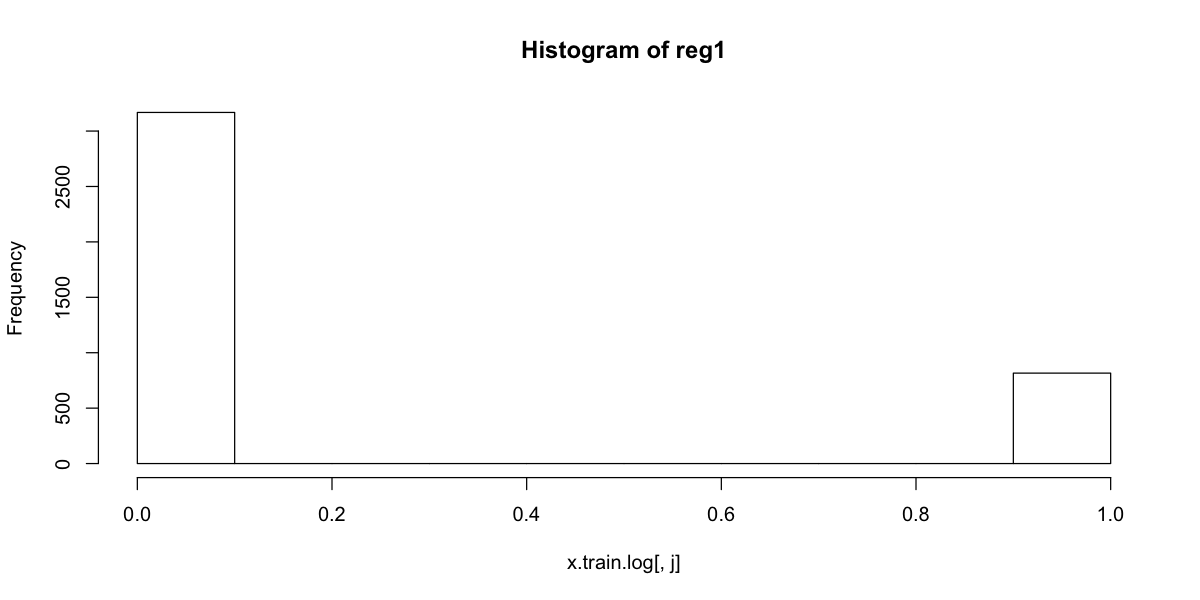

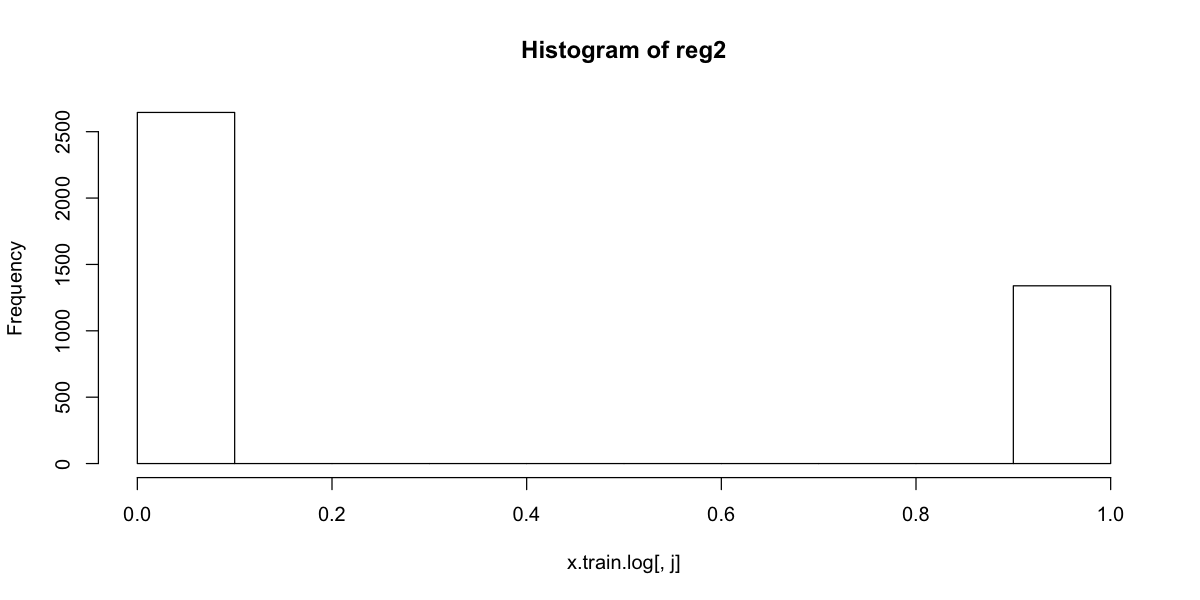

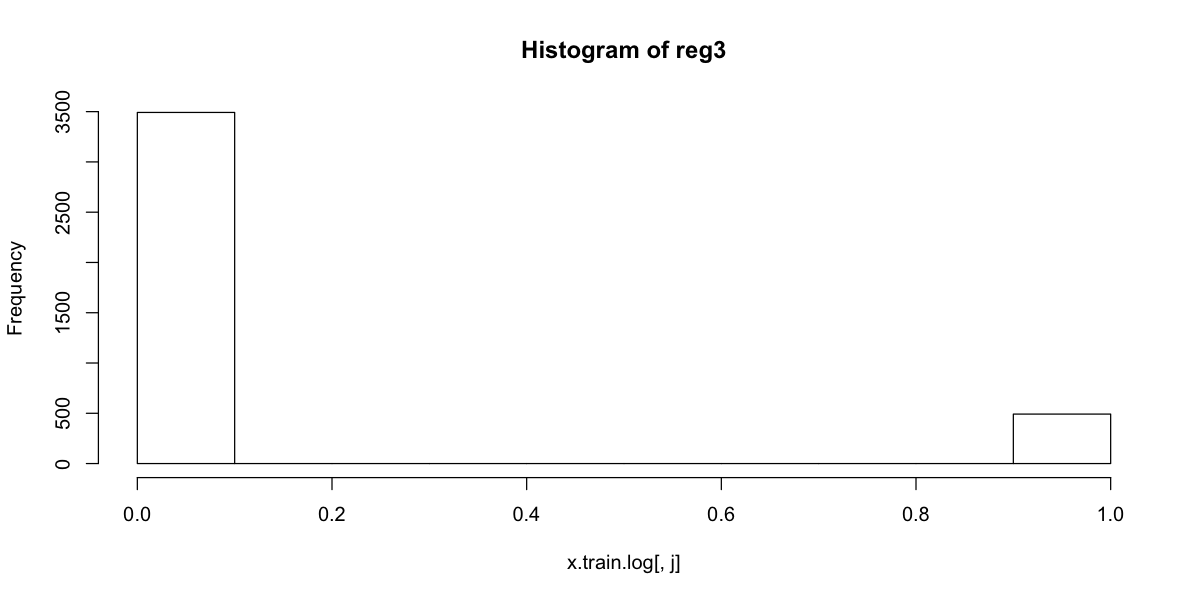

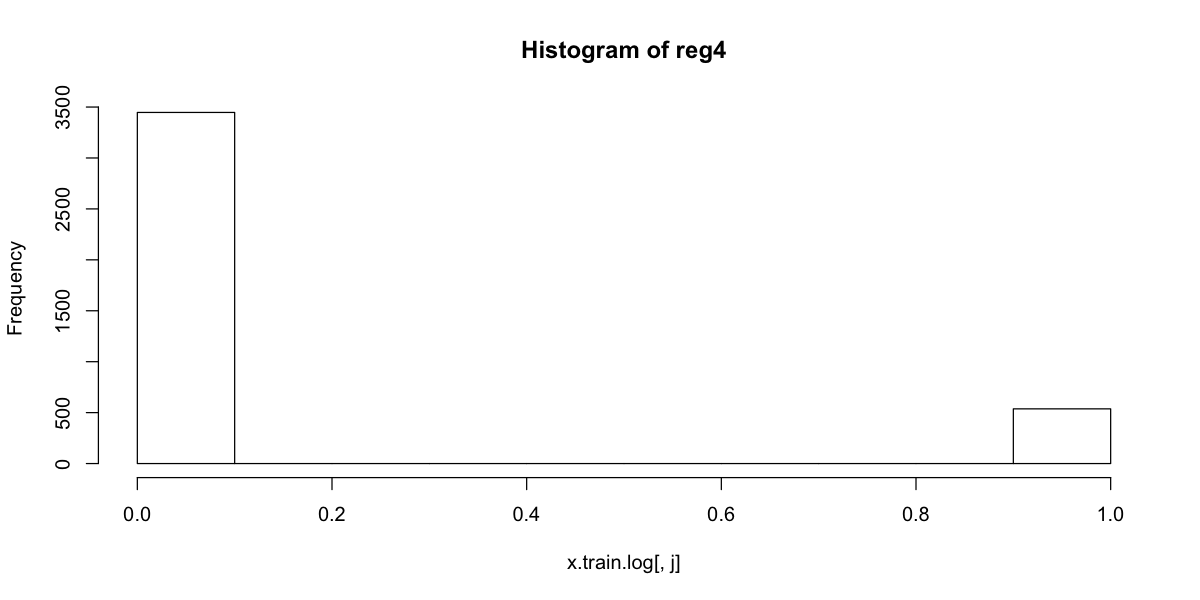

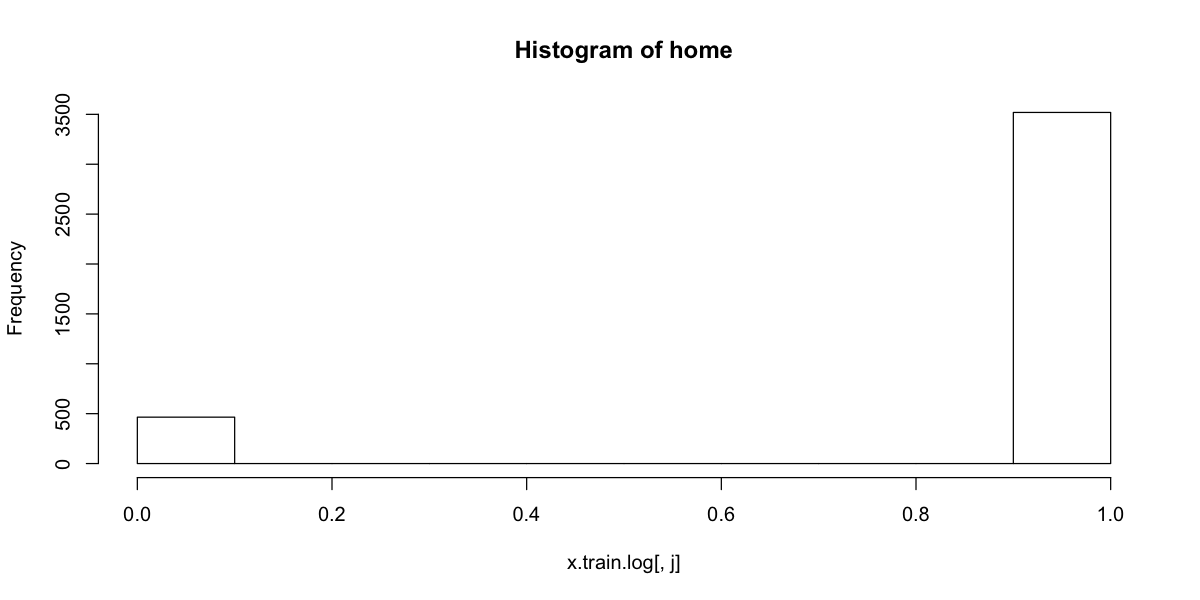

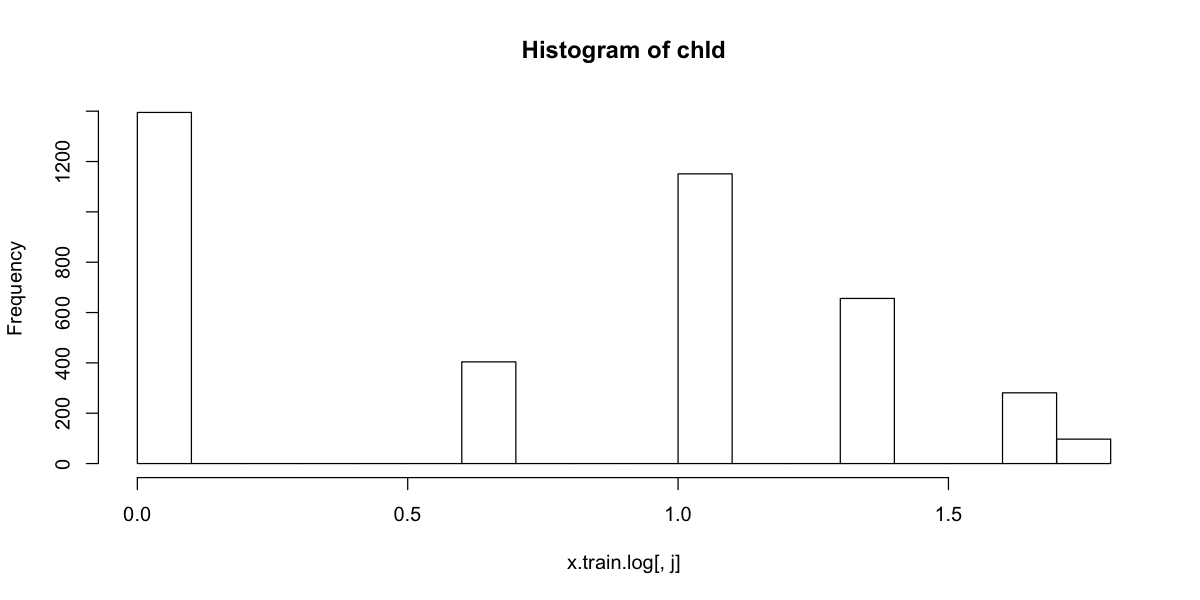

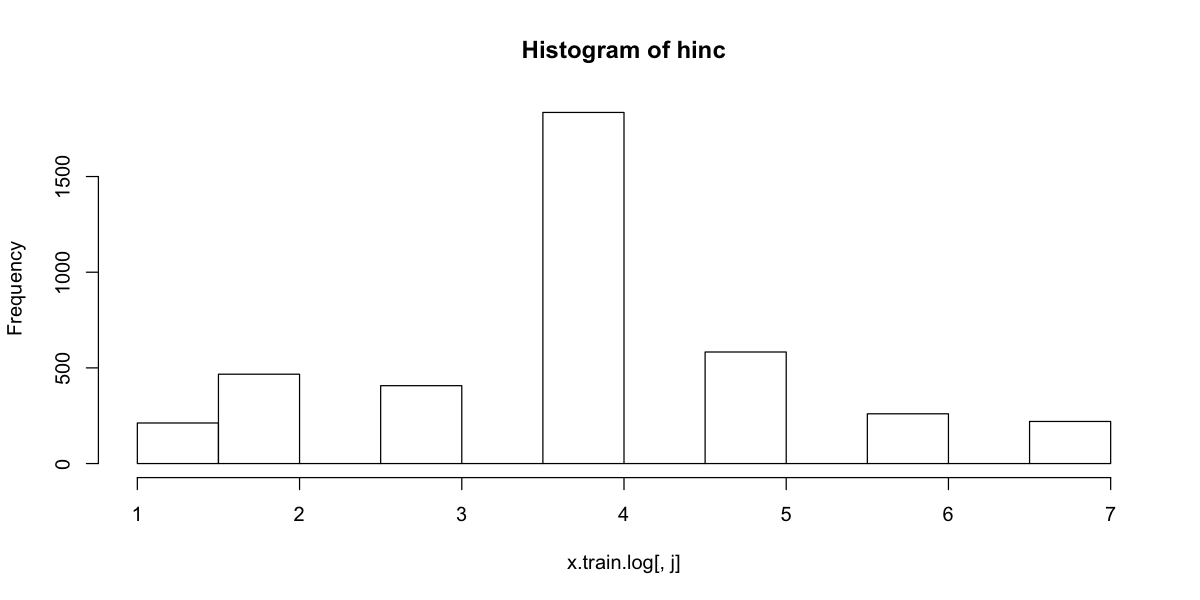

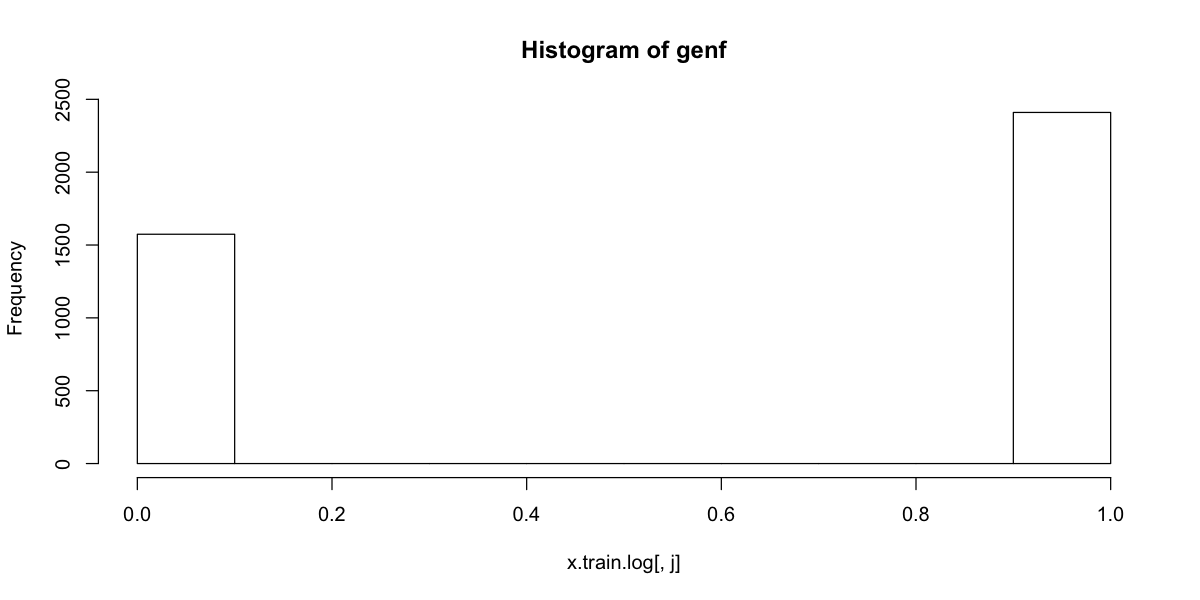

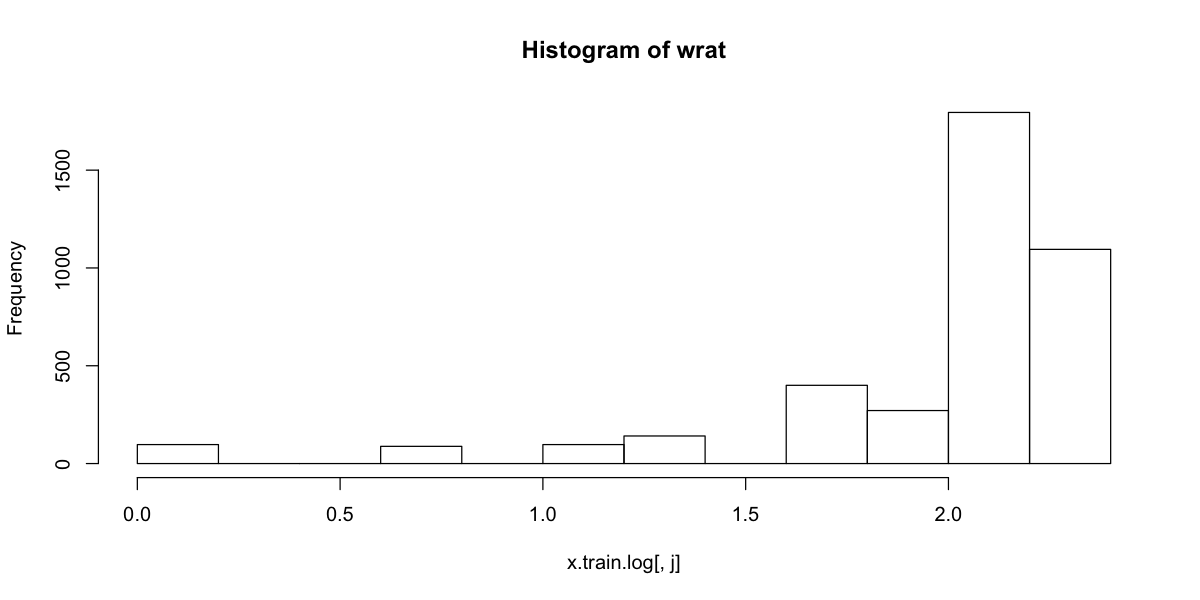

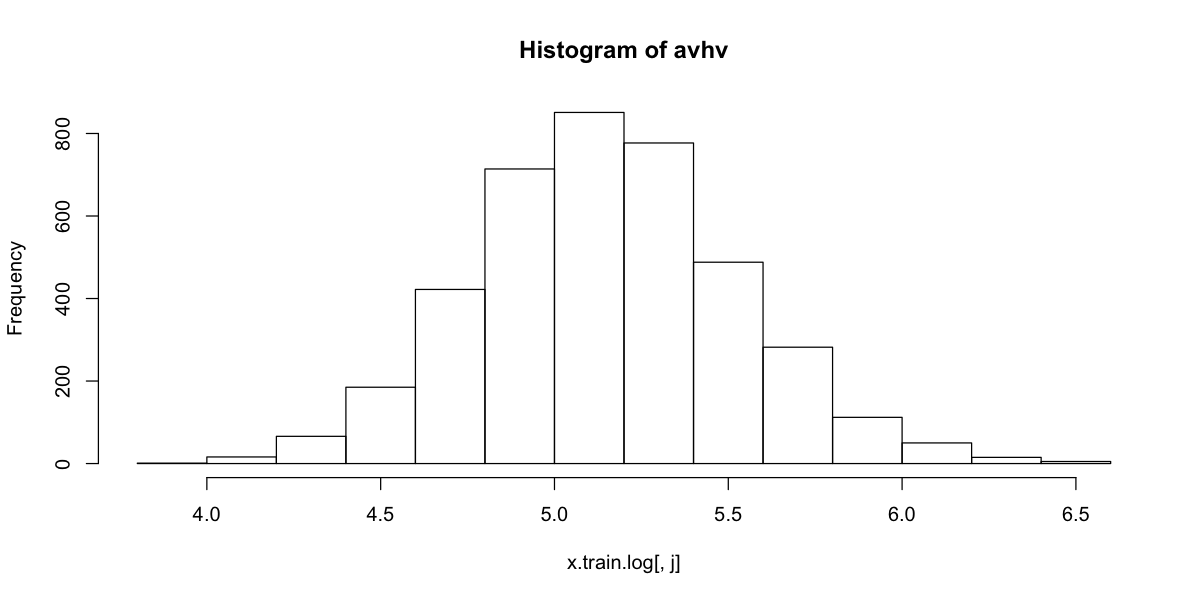

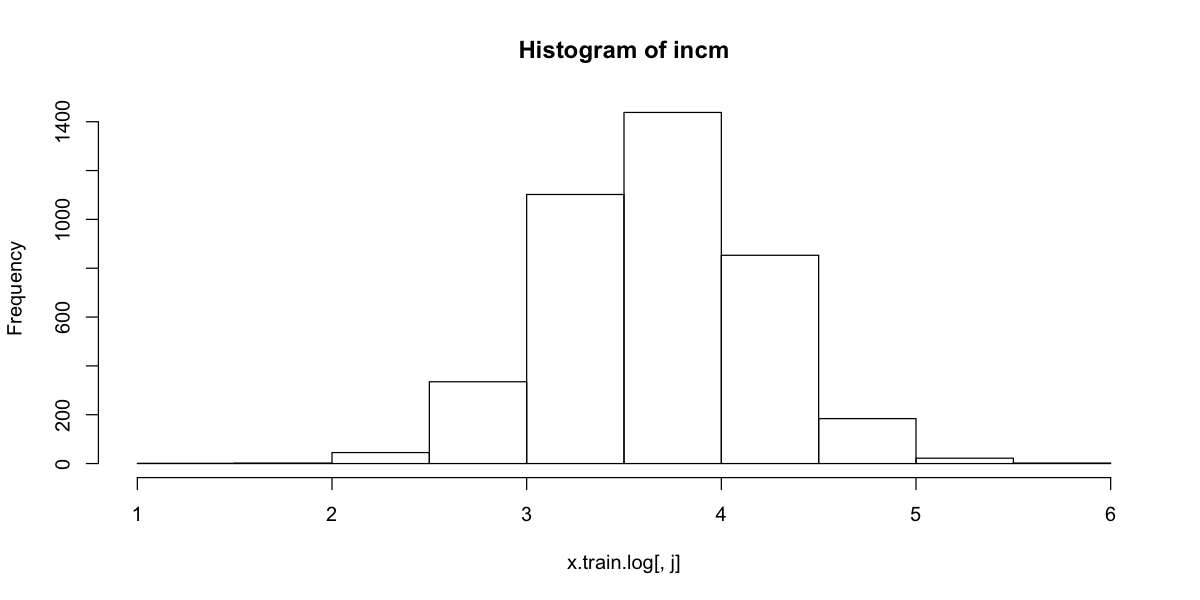

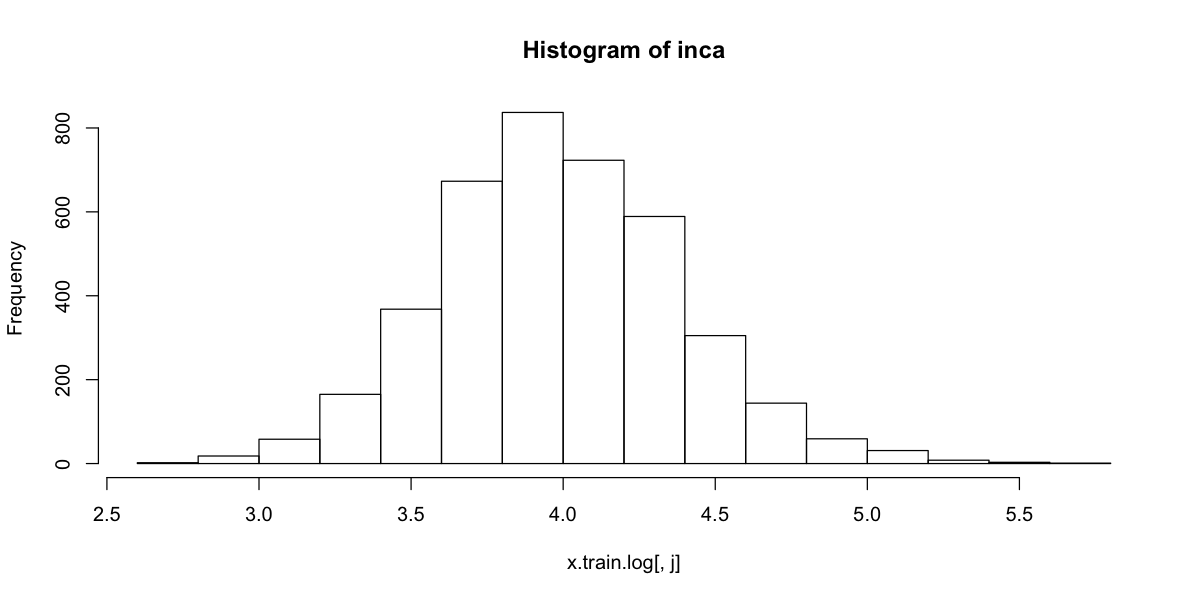

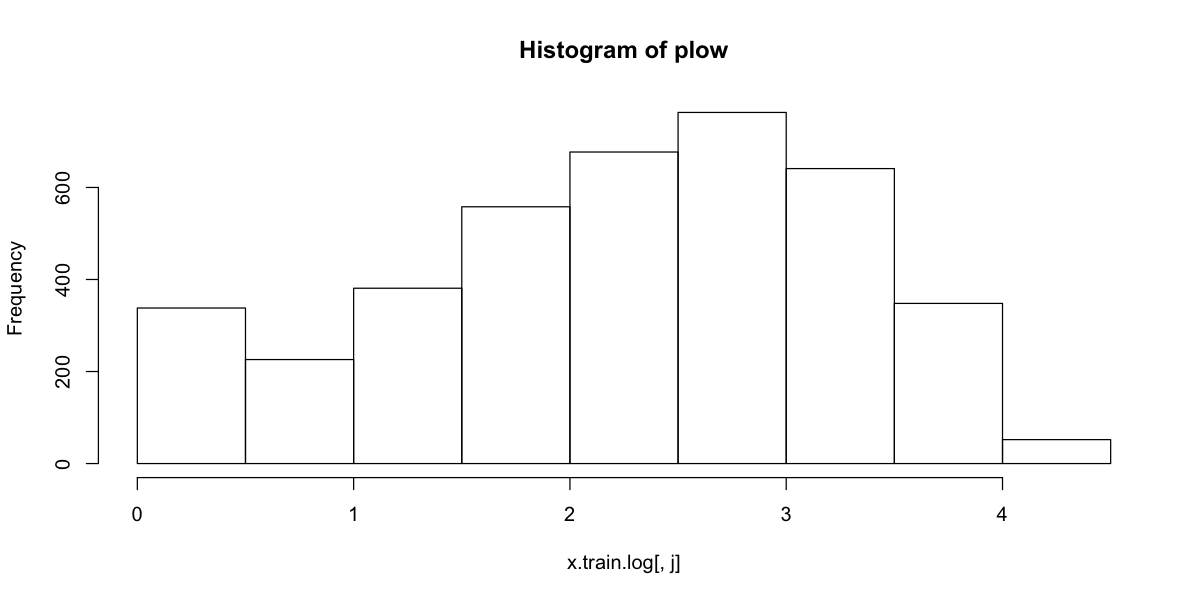

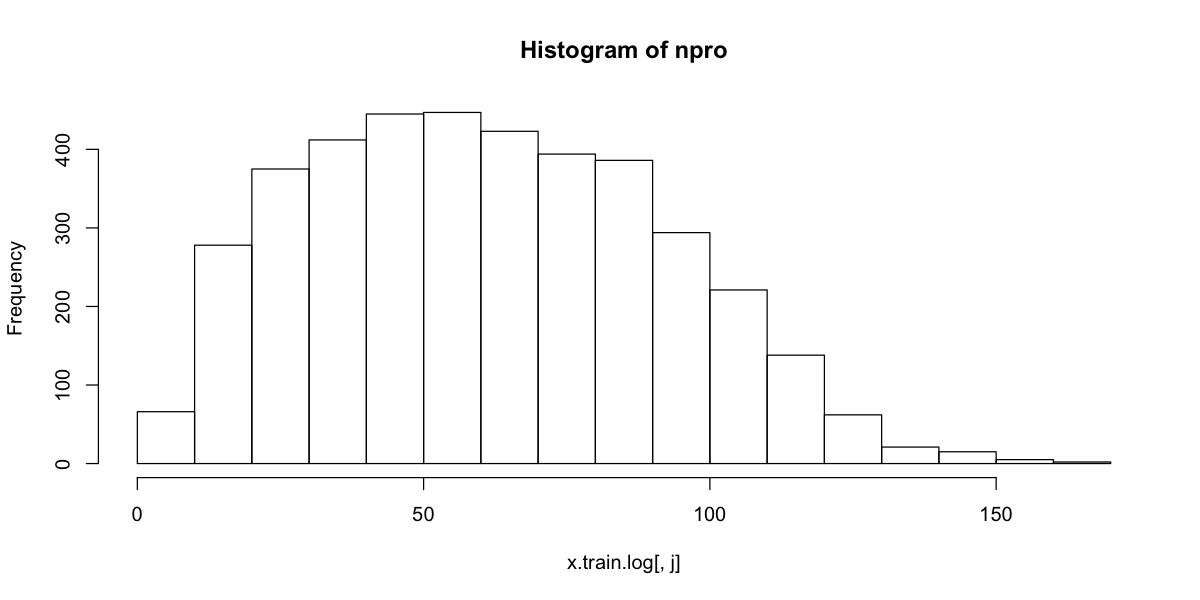

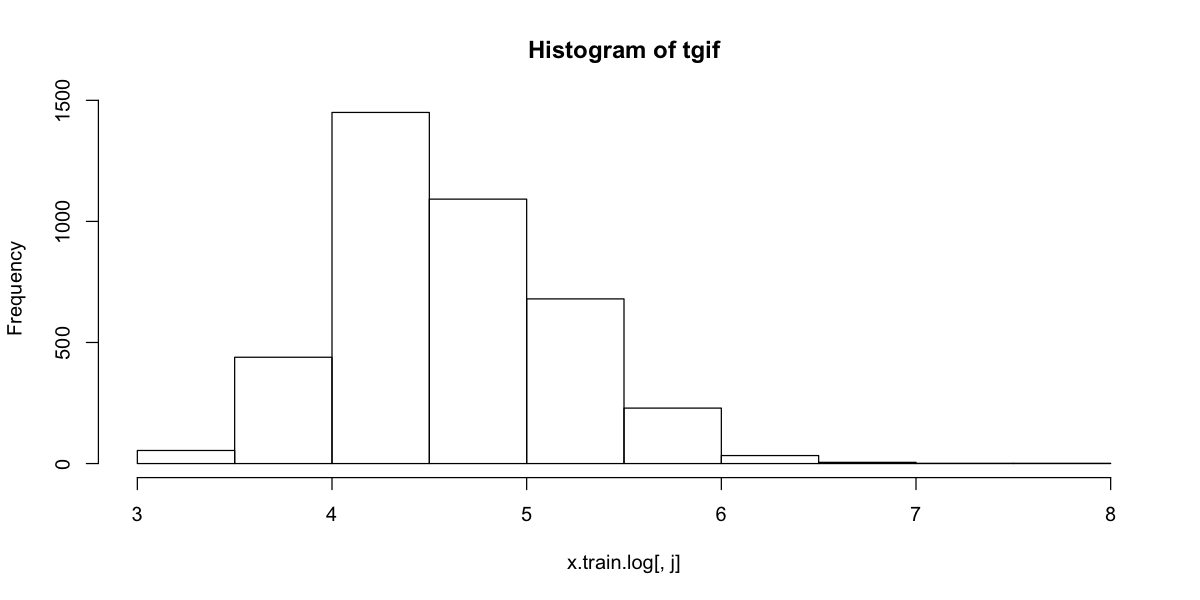

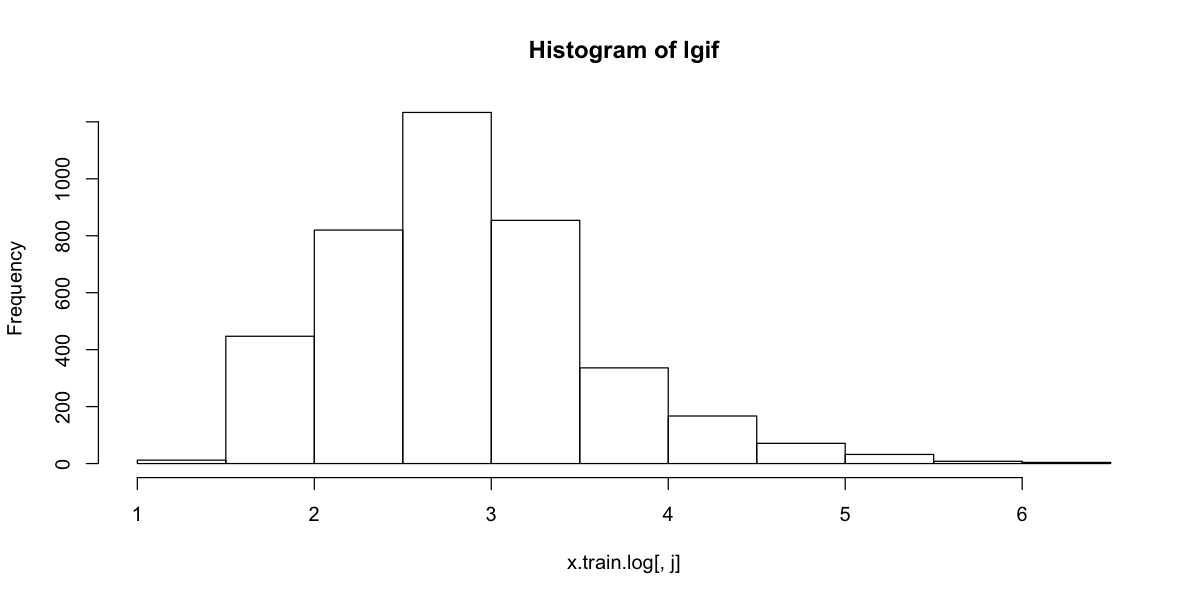

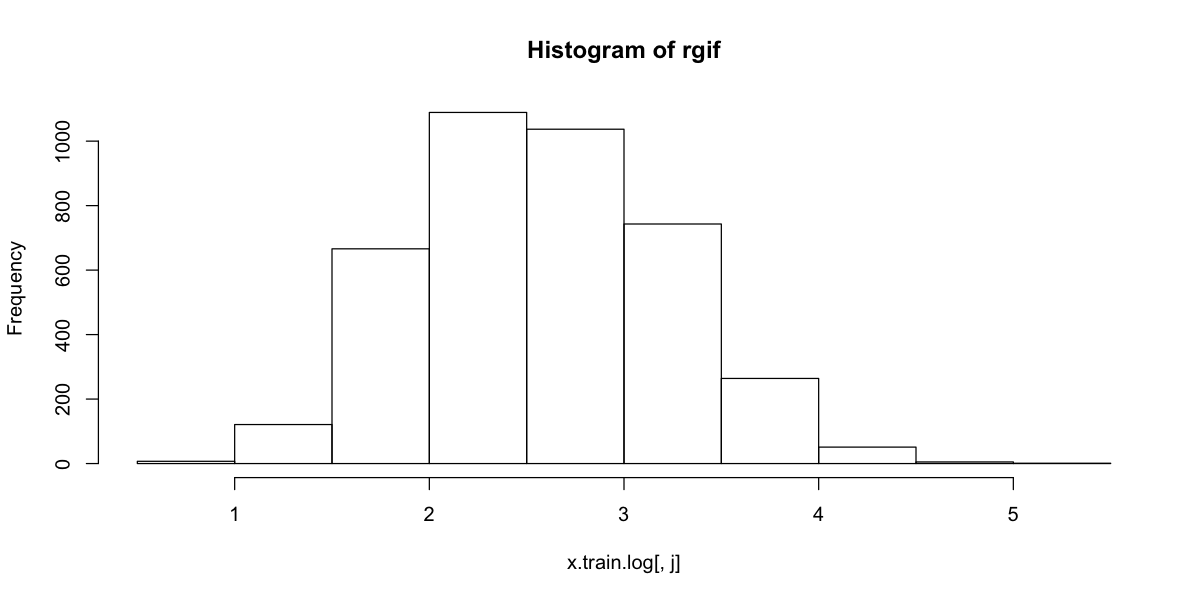

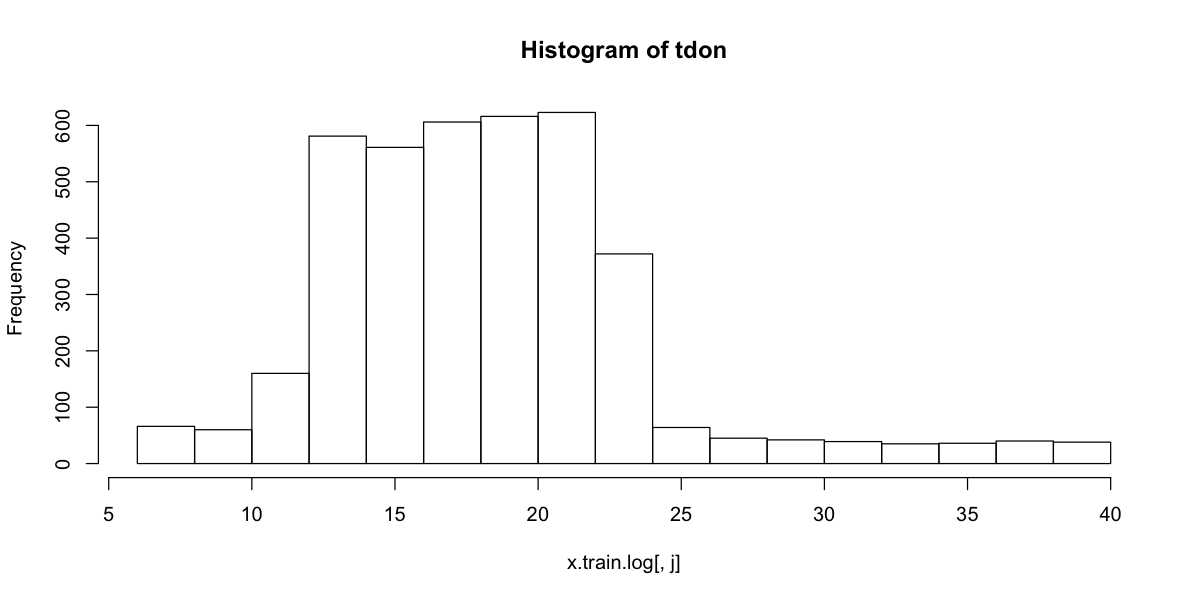

ERROR: Error in `[.data.frame`(x.train.log, , j): undefined columns selected


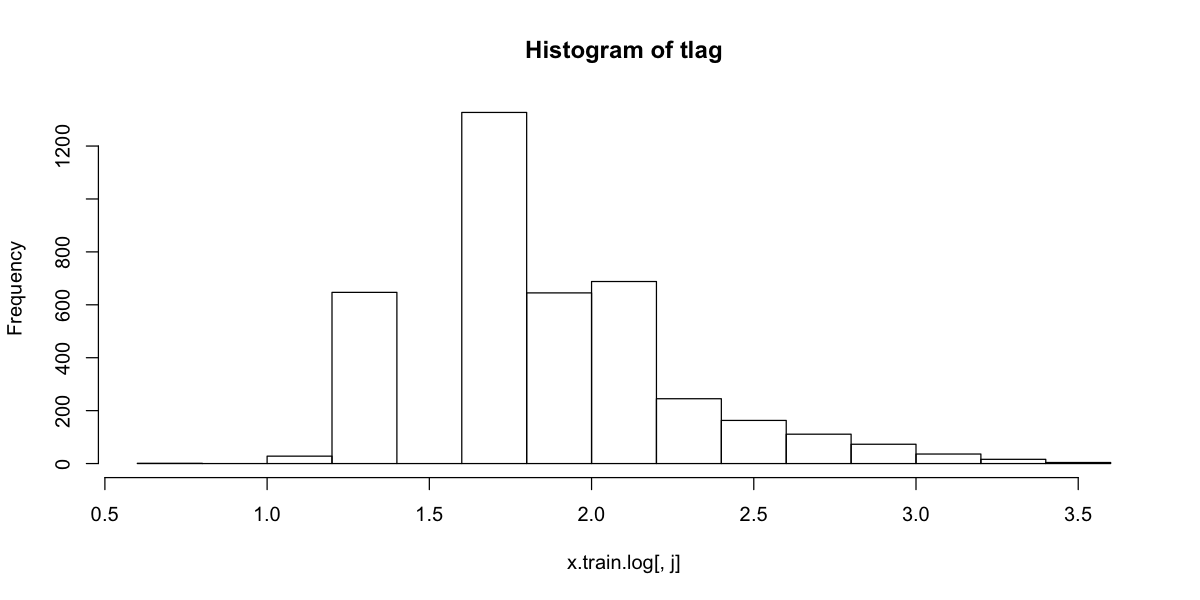

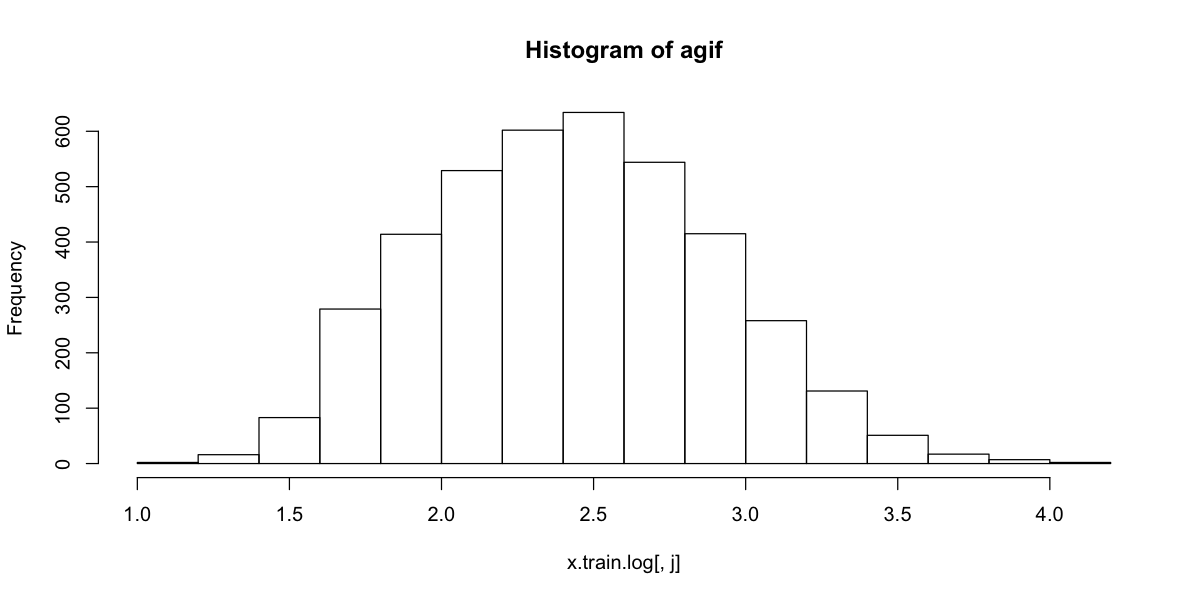

In [243]:
for (j in 1:dim(charity)[2]) {
    hist(x.train.log[,j], main = paste("Histogram of" , attributes(x.train.log)$names[j]))
}

# Log Transformed data with certain variables removed for classification models

In [69]:
x.train.log.rem   <-x.train.log[-c(3,4,8)]
data.valid.log.rem<-data.valid.log[-c(3,4,8)]
x.valid.log.rem   <-x.valid.log[-c(3,4,8)]
x.test.log.rem<-x.test.log[-c(3,4,8)]
x.train.log.std.rem   <-x.train.log.std[,-c(3,4,8)]
data.train.log.std.c.rem   <-data.train.log.std.c[-c(3,4,8)]
data.train.log.std.y.rem   <-data.train.log.std.y[-c(3,4,8)]
x.valid.log.std.rem   <-x.valid.log.std [,-c(3,4,8)]
data.valid.log.std.c.rem   <-data.valid.log.std.c[-c(3,4,8)]
data.valid.log.std.y.rem   <-data.valid.log.std.y[-c(3,4,8)]
x.test.log.std.rem   <-x.test.log.std[,-c(3,4,8)]
data.test.log.std.rem <-data.test.log.std[-c(3,4,8)]
data.train.log.std.c.cat.rem  <-data.train.log.std.c.cat[-c(3,4,8)]
data.valid.log.std.c.cat.rem   <-data.valid.log.std.c.cat[-c(3,4,8)]
x.train.log.donors.rem <-x.train.log.donors[,-c(3,4,8)]
x.valid.log.donors.rem <-x.valid.log.donors[,-c(3,4,8)]

# Log Transformed data with certain variables removed for regression models

In [166]:
x.train.log.rem2   <-x.train.log[-c(1,5,8)]
data.valid.log.rem2<-data.valid.log[-c(1,5,8)]
x.valid.log.rem2   <-x.valid.log[-c(1,5,8)]
x.test.log.rem2<-x.test.log[-c(1,5,8)]
x.train.log.std.rem2  <-x.train.log.std[,-c(1,5,8)]
data.train.log.std.c.rem2   <-data.train.log.std.c[-c(1,5,8)]
data.train.log.std.y.rem2   <-data.train.log.std.y[-c(1,5,8)]
x.valid.log.std.rem2   <-x.valid.log.std [,-c(1,5,8)]
data.valid.log.std.c.rem2   <-data.valid.log.std.c[-c(1,5,8)]
data.valid.log.std.y.rem2   <-data.valid.log.std.y[-c(1,5,8)]
x.test.log.std.rem2   <-x.test.log.std[,-c(1,5,8)]
data.test.log.std.rem2 <-data.test.log.std[-c(1,5,8)]
data.train.log.std.c.cat.rem2  <-data.train.log.std.c.cat[-c(1,5,8)]
data.valid.log.std.c.cat.rem2   <-data.valid.log.std.c.cat[-c(1,5,8)]
x.train.log.donors.rem2 <-x.train.log.donors[,-c(1,5,8)]
x.valid.log.donors.rem2 <-x.valid.log.donors[,-c(1,5,8)]

# Assessing Variable importance using Random Forests for classification problem

In [12]:
library(randomForest)
set.seed(1)
rf.charity=randomForest(donr~.,data=data.train.std.c.cat,importance =TRUE)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [899]:
importance(rf.charity)

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
reg1,-3.8222517,26.4067316,18.4056882,24.61461
reg2,38.9265349,68.5210094,69.5602123,118.06825
reg3,0.3911794,8.2309688,7.6662981,10.95921
reg4,-0.9134654,6.9294318,5.2425683,11.14661
home,56.5112729,80.4046387,81.8899736,121.74417
chld,133.8997418,141.2710960,154.4072975,535.35623
hinc,48.6463163,60.5184977,65.9546559,181.91981
genf,-1.3255079,0.4522305,-0.5263467,12.10974
wrat,35.3048011,57.4857879,60.8544426,129.06952
avhv,13.0910061,9.6824755,17.6130253,78.21778


Both variable importane metrics suggest that the following variables don't contribute much: <br>
reg3, reg4, genf

In [902]:
importance(rf.charity)[,'MeanDecreaseAccuracy'][order(importance(rf.charity)
[,'MeanDecreaseAccuracy'],decreasing=FALSE)]

genf        reg4        reg3        rgif        agif        lgif 
 -0.5263467   5.2425683   7.6662981   7.9432399  10.5087199  13.9810010 
       avhv        reg1        npro        plow        tlag        inca 
 17.6130253  18.4056882  19.2928072  21.4314805  21.8829208  23.0059518 
       tgif        incm        tdon        wrat        hinc        reg2 
 27.8731366  29.1511402  30.0741809  60.8544426  65.9546559  69.5602123 
       home        chld 
 81.8899736 154.4072975

In [901]:
importance(rf.charity)[,'MeanDecreaseGini'][order(importance(rf.charity)
[,'MeanDecreaseGini'],decreasing=FALSE)]

reg3      reg4      genf      reg1      rgif      lgif      plow      agif 
 10.95921  11.14661  12.10974  24.61461  57.48638  57.85942  67.18006  69.65995 
     inca      tlag      avhv      npro      incm      tdon      tgif      reg2 
 73.20171  73.86335  78.21778  84.11104  87.50937  95.03236  98.46919 118.06825 
     home      wrat      hinc      chld 
121.74417 129.06952 181.91981 535.35623

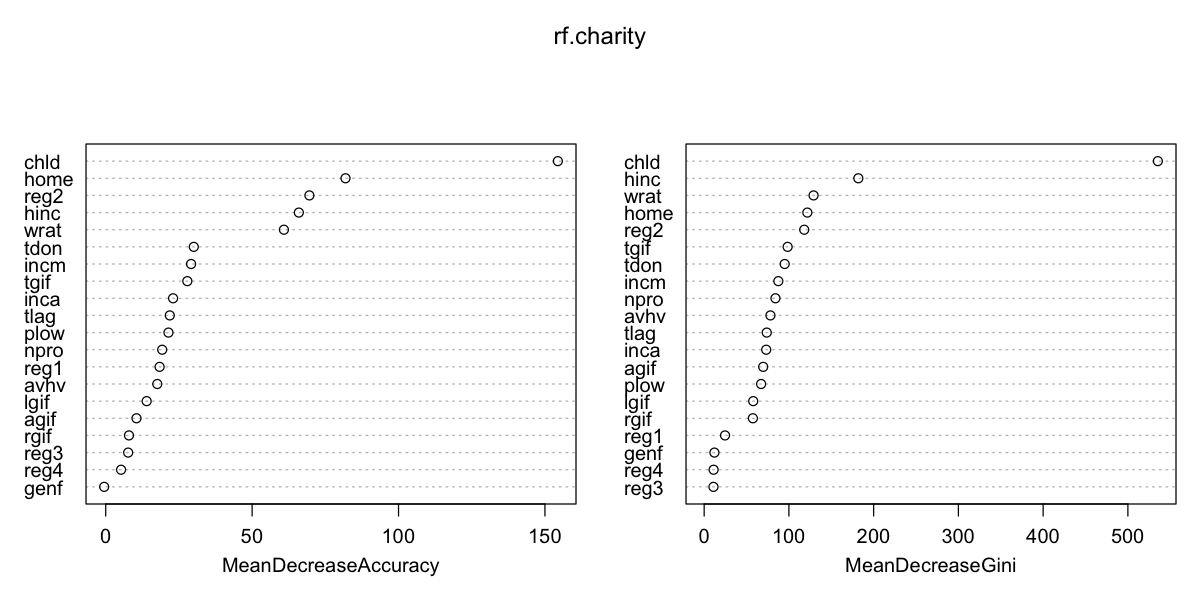

In [903]:
options(repr.plot.width=10, repr.plot.height=5) #resize plots
varImpPlot(rf.charity)

# Assessing variable importances using Random Forests for regression problem 

In [157]:
library(randomForest)
set.seed(1)
model.rf.y=randomForest(damt~.,data=data.train.std.y,importance =TRUE)
rf.y.pred = predict(model.rf.y,newdata=x.valid.donors)
mean((rf.y.pred - y.valid)^2)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


[1] 1.672363

In [240]:
importance(model.rf.y)

,%IncMSE,IncNodePurity
reg1,7.2856660,44.45009
reg2,16.5064235,132.51364
reg3,24.1826750,132.44441
reg4,53.5115025,552.30862
home,-2.2069010,32.05791
chld,41.9812599,446.91936
hinc,26.1652141,253.25895
genf,1.4920111,35.56429
wrat,15.4753742,236.81797
avhv,10.4952717,245.01113


In [160]:
importance(model.rf.y)[,'%IncMSE'][order(importance(model.rf.y)
[,'%IncMSE'],decreasing=FALSE)]

home       tlag       genf       tdon       reg1       npro       avhv 
-2.2069010  0.4885803  1.4920111  2.3313946  7.2856660  7.5846859 10.4952717 
      tgif       inca       plow       wrat       reg2       incm       reg3 
11.2829809 13.3336769 15.4131646 15.4753742 16.5064235 16.5659336 24.1826750 
      hinc       agif       lgif       rgif       chld       reg4 
26.1652141 29.5247469 32.2896837 32.3308541 41.9812599 53.5115025

In [162]:
importance(model.rf.y)[,'IncNodePurity'][order(importance(model.rf.y)
[,'IncNodePurity'],decreasing=FALSE)]

home       genf       reg1       reg3       reg2       tlag       tdon 
  32.05791   35.56429   44.45009  132.44441  132.51364  154.32186  188.94821 
      plow       inca       incm       wrat       avhv       hinc       npro 
 218.55115  231.96122  232.84778  236.81797  245.01113  253.25895  254.77054 
      tgif       chld       reg4       agif       rgif       lgif 
 287.17436  446.91936  552.30862 1091.17330 1196.17365 1230.03658

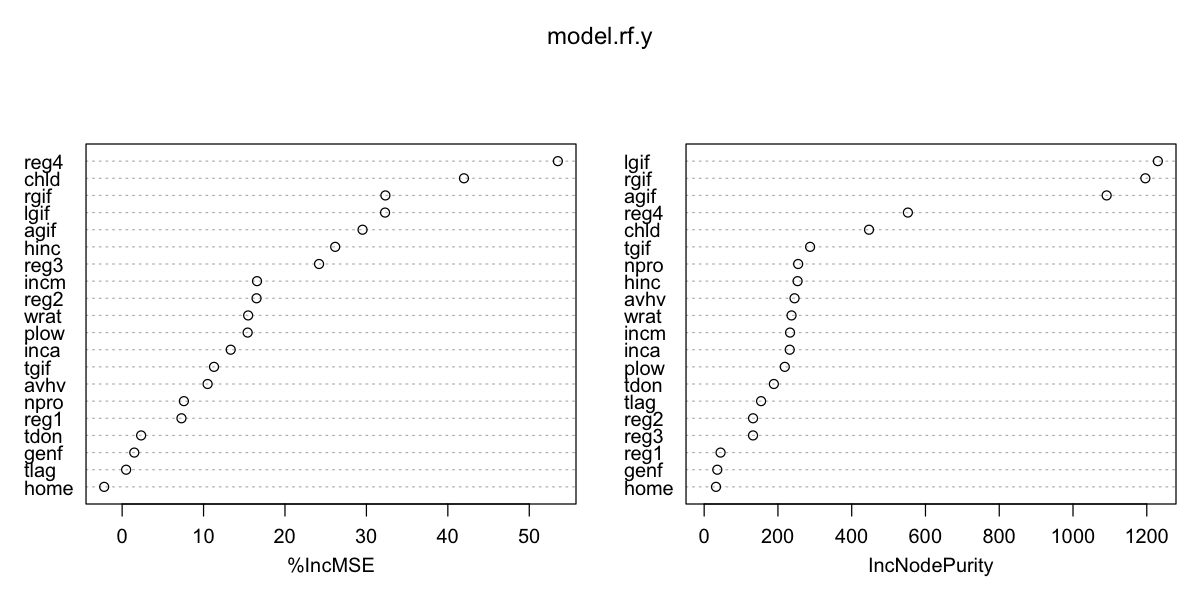

In [242]:
options(repr.plot.width=10, repr.plot.height=5) #resize plots
varImpPlot(model.rf.y)

remove home, genf, reg1 from top classification models and observe

1. Determine probability of response
2. Calculate cumulative profit in the order of most likely responders
3. Find maximize cumulative profit and the probability of last responder included in this
4. Only mail to responders with prob greater cutoff prob (those included in cumsum)

# CLASSIFICATION MODELING #

# Decision Trees

In [248]:
set.seed(1)
library(tree)
tree.charity=tree(donr~., data.train.std.c.cat)
tree.pred=predict(tree.charity,data.valid.std.c.cat,type="class")
table(tree.pred,c.valid)

         c.valid
tree.pred   0   1
        0 783  70
        1 236 929

In [169]:
14.5*929-2*(236+929) #expected profit
round(mean(tree.pred==c.valid),3) #accuracy


[1] 11140.5

[1] 0.848

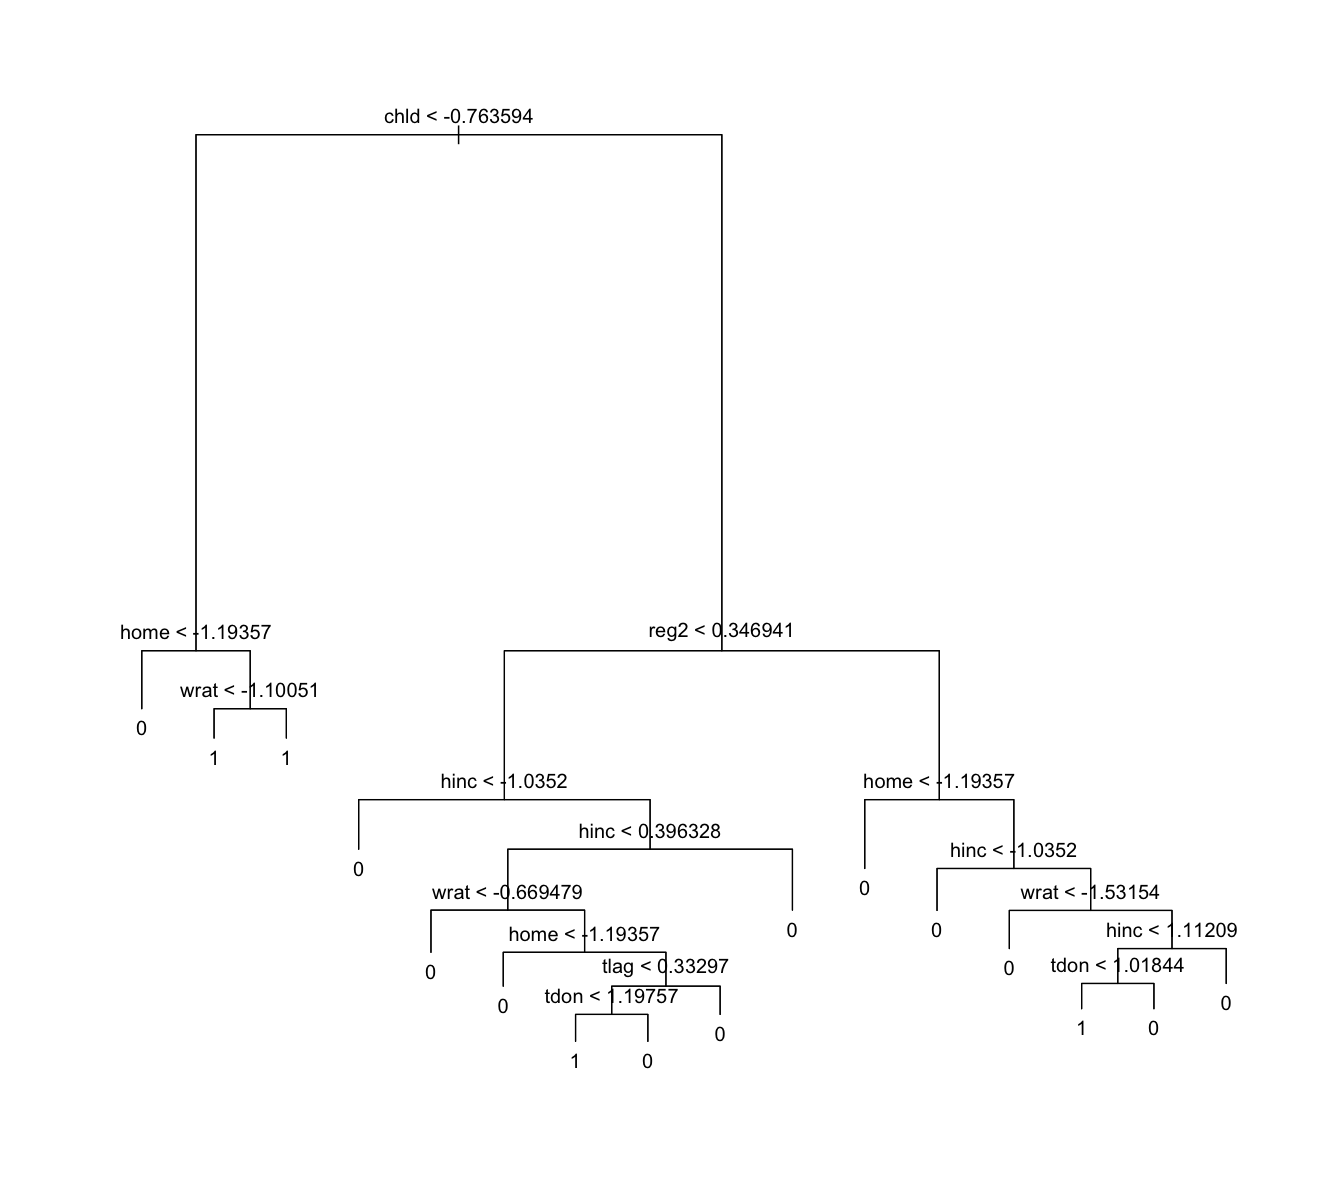

In [265]:
options(repr.plot.width=11, repr.plot.height=10) #resize plots
plot(tree.charity)
text(tree.charity,pretty=0)

As k (or alpha), the tuning parameter, increases, it is more costly to the calculated error to have more nodes.  Since the tree is created so as to minimize the calculated error, the greater k is, the greater the penalty for more nodes, and so the tree will be made less complex (less nodes and therefore splits), so as to better minimize error.

## Decision Tree with Pruning

In [249]:
set.seed(1)
cv.charity =cv.tree(tree.charity ,FUN=prune.misclass )
names(cv.charity )
cv.charity

[1] "size"   "dev"    "k"      "method"

$size
 [1] 16 15  9  8  7  6  5  4  2  1

$dev
 [1]  593  593  650  667  673  725  734  844  988 2059

$k
 [1] -Inf    0   10   18   21   36   39   72   87 1001

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

In [262]:
cv.charity$dev

[1]  593  593  650  667  673  725  734  844  988 2059

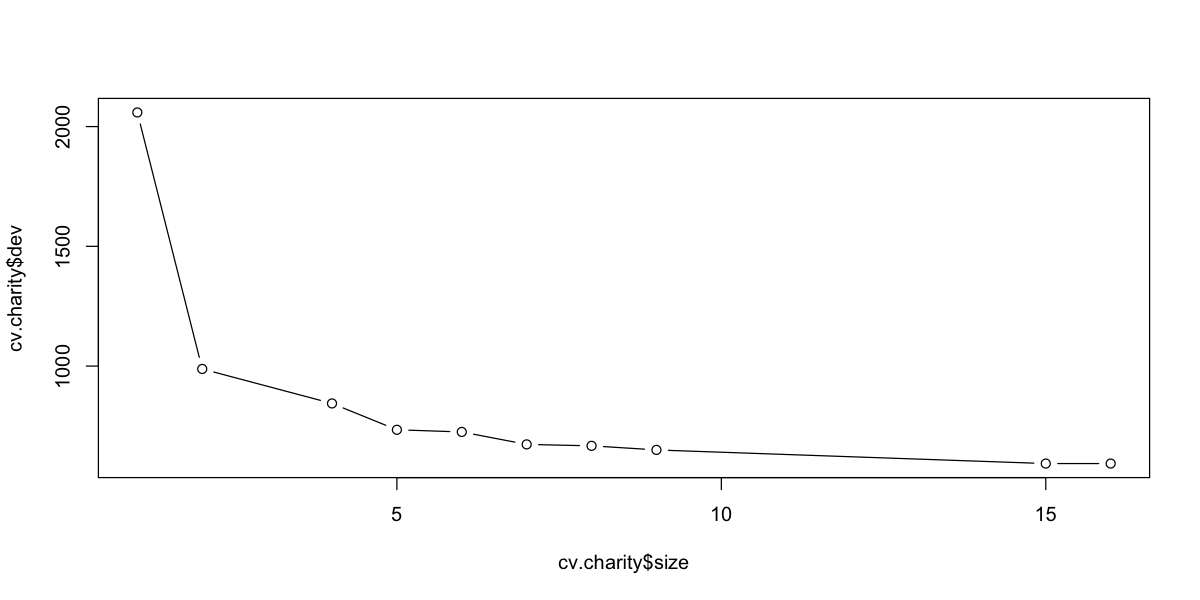

In [251]:
plot(cv.charity$size ,cv.charity$dev ,type='b')

In [265]:
?cv.tree

In [ ]:
set.seed(1)
cv.charity =cv.tree(tree.charity ,FUN=prune.misclass )
names(cv.charity )
cv.charity

There does not appear to be a benefit from pruning.

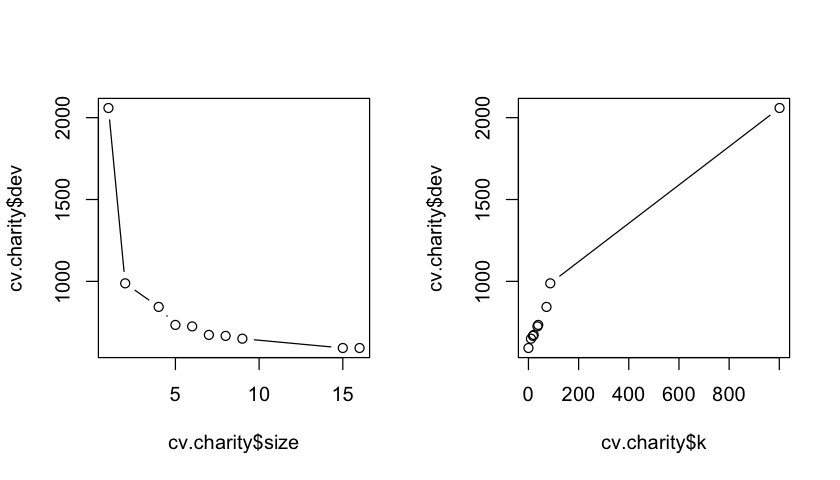

In [162]:
options(repr.plot.width=7, repr.plot.height=4) #resize plots
par(mfrow=c(1,2))
plot(cv.charity$size ,cv.charity$dev ,type="b")
plot(cv.charity$k ,cv.charity$dev ,type="b")

## Decision Tree with log transformed data

In [1169]:
set.seed(1)
library(tree)
tree.log=tree(donr~., data.train.log.std.c.cat)
tree.log.pred=predict(tree.charity,data.valid.log.std.c.cat,type="class")
table(tree.pred,c.valid)
round(mean(tree.pred==c.valid),3) #accuracy 
#.848 --> no change!!!!

         c.valid
tree.pred   0   1
        0 783  70
        1 236 929

[1] 0.848

# Boosting

In [366]:
library(gbm)
set.seed(1)
boost.charity=gbm(donr~.,data=data.train.std.c,distribution=
                 "bernoulli",n.trees=5000, interaction.depth=4)

In [275]:
boost.charity$shrinkage

[1] 0.001

In [367]:
boost.pred = predict(boost.charity,newdata=data.valid.std.c,n.trees=5000,type='response')

In [279]:
?gbm

,var,rel.inf
chld,chld,43.224866783
hinc,hinc,15.015709501
reg2,reg2,10.749437615
home,home,9.999693848
wrat,wrat,8.272388602
tdon,tdon,2.640436559
incm,incm,2.543524921
tgif,tgif,2.209650649
tlag,tlag,2.209133916
reg1,reg1,1.710386735


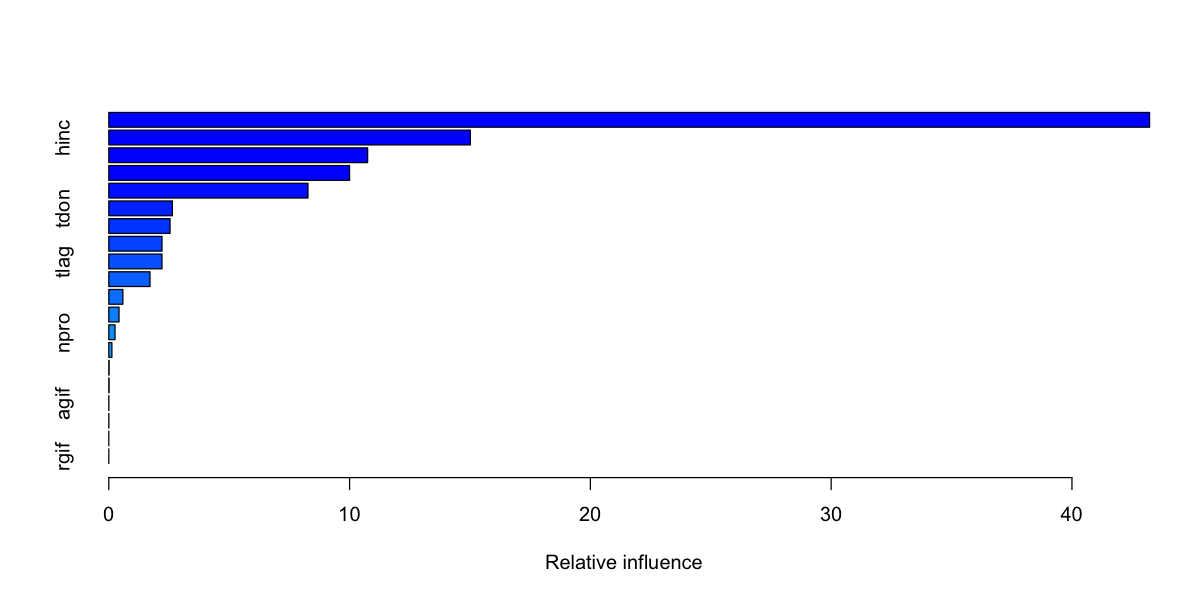

In [278]:
summary(boost.charity)

[1]  1274 11836

                c.valid
chat.valid.boost   0   1
               0 737   7
               1 282 992

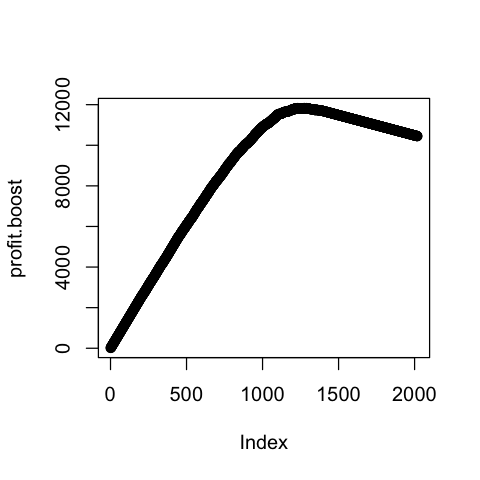

In [368]:
# calculate ordered profit function using average donation = $14.50 and mailing cost = $2
profit.boost <- cumsum(14.5*c.valid[order(boost.pred, decreasing=T)]-2)
options(repr.plot.width=4, repr.plot.height=4) #resize plots
plot(profit.boost) # see how profits change as more mailings are made
n.mail.valid <- which.max(profit.boost) # number of mailings that maximizes profits
c(n.mail.valid, max(profit.boost)) # report number of mailings and maximum profit


cutoff.boost <- sort(boost.pred, decreasing=T)[n.mail.valid+1] # set cutoff based on n.mail.valid
chat.valid.boost <- ifelse(boost.pred>cutoff.boost, 1, 0) # mail to everyone above the cutoff
table(chat.valid.boost, c.valid) # classification table

In [176]:
#max profit is 11836
992*14.5-2*(992+282)

[1] 11836

In [369]:
round(mean(chat.valid.boost==c.valid),3) #accuracy

[1] 0.857

## Boosting with log transformed variables

[1]  1274 11836

                c.valid
chat.valid.boost   0   1
               0 737   7
               1 282 992

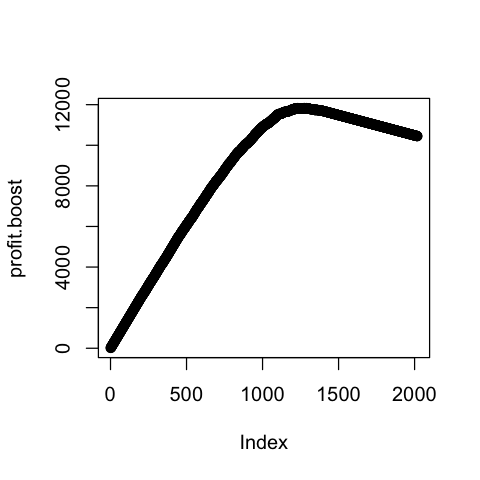

In [132]:
set.seed(1)
boost.log=gbm(donr~.,data=data.train.log.std.c,distribution=
                 "bernoulli",n.trees=5000, interaction.depth=4)
boost.log.pred = predict(boost.log,newdata=data.valid.log.std.c,n.trees=5000,type='response')

# calculate ordered profit function using average donation = $14.50 and mailing cost = $2
profit.boost <- cumsum(14.5*c.valid[order(boost.log.pred, decreasing=T)]-2)
options(repr.plot.width=4, repr.plot.height=4) #resize plots
plot(profit.boost) # see how profits change as more mailings are made
n.mail.valid <- which.max(profit.boost) # number of mailings that maximizes profits
c(n.mail.valid, max(profit.boost)) # report number of mailings and maximum profit
# 1329.0 11624.5

cutoff.boost <- sort(boost.log.pred, decreasing=T)[n.mail.valid+1] # set cutoff based on n.mail.valid
chat.valid.boost <- ifelse(boost.log.pred>cutoff.boost, 1, 0) # mail to everyone above the cutoff
table(chat.valid.boost, c.valid) # classification table

In [133]:
round(mean(chat.valid.boost==c.valid),3) #accuracy

[1] 0.857

# Boosting with log transformed vars and some vars removed

[1]  1231 11835

                c.valid
chat.valid.boost   0   1
               0 774  13
               1 245 986

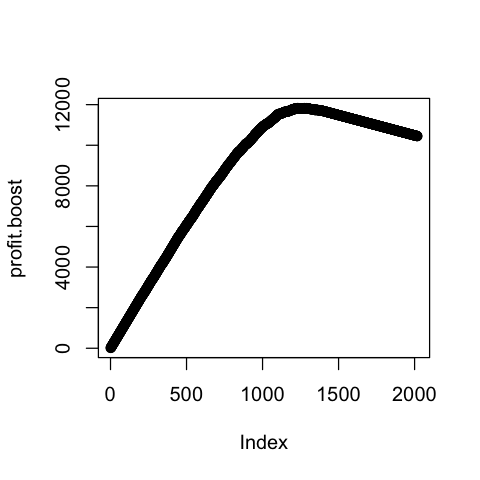

In [76]:
set.seed(1)
boost.log=gbm(donr~.,data=data.train.log.std.c.rem,distribution=
                 "bernoulli",n.trees=5000, interaction.depth=4)
boost.log.pred = predict(boost.log,newdata=data.valid.log.std.c.rem,n.trees=5000,type='response')

# calculate ordered profit function using average donation = $14.50 and mailing cost = $2
profit.boost <- cumsum(14.5*c.valid[order(boost.log.pred, decreasing=T)]-2)
options(repr.plot.width=4, repr.plot.height=4) #resize plots
plot(profit.boost) # see how profits change as more mailings are made
n.mail.valid <- which.max(profit.boost) # number of mailings that maximizes profits
c(n.mail.valid, max(profit.boost)) # report number of mailings and maximum profit
# 1329.0 11624.5

cutoff.boost <- sort(boost.log.pred, decreasing=T)[n.mail.valid+1] # set cutoff based on n.mail.valid
chat.valid.boost <- ifelse(boost.log.pred>cutoff.boost, 1, 0) # mail to everyone above the cutoff
table(chat.valid.boost, c.valid) # classification table

In [127]:
round(mean(chat.valid.boost==c.valid),3) #accuracy
#774  13
#1 245 986
round(986/(245+986),3)

[1] 0.872

[1] 0.801

# Bagging

Bagging is a special case of random forests where all predictors are considered at each split, instead of a subset.

In [180]:
library(randomForest)
set.seed(1)
bag.charity=randomForest(donr~.,data=data.train.std.c.cat,importance =TRUE,
                         mtry=dim(x.train.std)[2]) #number of predictors is 20
bag.charity
bag.pred = predict(bag.charity,newdata=data.valid.std.c.cat)
table(bag.pred,c.valid)
round(mean(bag.pred==c.valid),3) #accuracy ()


Call:
 randomForest(formula = donr ~ ., data = data.train.std.c.cat,      importance = TRUE, mtry = dim(x.train.std)[2]) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 20

        OOB estimate of  error rate: 11.65%
Confusion matrix:
     0    1 class.error
0 1752  237   0.1191554
1  227 1768   0.1137845

        c.valid
bag.pred   0   1
       0 888  93
       1 131 906

[1] 0.889

In [181]:
14.5*906-2*(906+131)
round(mean(bag.pred==c.valid),3) #accuracy ()

[1] 11063

[1] 0.889

## Bagging with log transformed variables

In [1172]:
library(randomForest)
set.seed(1)
bag.log=randomForest(donr~.,data=data.train.log.std.c.cat,importance =TRUE,
                         mtry=dim(x.train.log.std)[2]) #number of predictors is 20
bag.log.pred = predict(bag.log,newdata=data.valid.log.std.c.cat)
table(bag.log.pred,c.valid)
round(mean(bag.log.pred==c.valid),3) #accuracy

            c.valid
bag.log.pred   0   1
           0 896  92
           1 123 907

[1] 0.893

In [131]:
907*14.5-2*(907+123) #profit
round(907/(907+123),3) #precision
14.5*907-2*(907+123)

[1] 11091.5

[1] 0.881

[1] 11091.5

# Random Forests

In [281]:
?randomForest

In [284]:
library(randomForest)
set.seed(1)
rf.charity=randomForest(donr~.,data=data.train.std.c.cat,importance =TRUE)
rf.charity
rf.pred = predict(rf.charity,newdata=data.valid.std.c.cat)
table(rf.pred,c.valid)


Call:
 randomForest(formula = donr ~ ., data = data.train.std.c.cat,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 10.89%
Confusion matrix:
     0    1 class.error
0 1750  239  0.12016088
1  195 1800  0.09774436

       c.valid
rf.pred   0   1
      0 881  84
      1 138 915

In [285]:
round((881+915)/(2018),3) #accuracy
round(mean(rf.pred==c.valid),3)

[1] 0.89

[1] 0.89

In [183]:
915*14.5-2*(915+138) #profit

[1] 11161.5

## Random Forest with logged variables

In [1176]:
library(randomForest)
set.seed(1)
rf.log=randomForest(donr~.,data=data.train.log.std.c.cat,importance =TRUE)
rf.log.pred = predict(rf.charity,newdata=data.valid.log.std.c.cat)
table(rf.log.pred,c.valid)

           c.valid
rf.log.pred   0   1
          0 876 101
          1 143 898

[1] 0.879

In [1177]:
round(mean(rf.log.pred==c.valid),3)

[1] 0.879

In [184]:
14.5*898-2*(898+143) #profit

[1] 10939

# K-Nearest Neighbors

knn.pred=knn(x_train,x_test,y_train,k=#)

In [283]:
?knn

In [149]:
library(class)

set.seed (1)

knn.pred=knn(x.train.std,x.valid.std,c.train,k=3)
mean(knn.pred==c.valid)

knn.pred=knn(x.train.std,x.valid.std,c.train,k=4)
mean(knn.pred==c.valid)

knn.pred=knn(x.train.std,x.valid.std,c.train,k=6)
mean(knn.pred==c.valid)

knn.pred=knn(x.train.std,x.valid.std,c.train,k=5)
mean(knn.pred==c.valid)
table(knn.pred,c.valid)

[1] 0.8102081

[1] 0.8037661

[1] 0.8097126

[1] 0.8181368

        c.valid
knn.pred   0   1
       0 725  73
       1 294 926

In [189]:
set.seed(1)
knn.pred=knn(x.train.std,x.valid.std,c.train,k=5)
round(mean(knn.pred==c.valid),3) #accuracy

[1] 0.818

In [185]:
926*14.5-2*(926+294) #profit

[1] 10987

## KNN with logged variables

In [190]:
set.seed(1)
knn.log.pred=knn(x.train.log.std,x.valid.log.std,c.train,k=5)
round(mean(knn.log.pred==c.valid),3) #accuracy
table(knn.log.pred,c.valid)

[1] 0.823

            c.valid
knn.log.pred   0   1
           0 746  84
           1 273 915

In [191]:
14.5*915-2*(915+273) #profit

[1] 10891.5

# Support Vector Machines

In [194]:
set.seed(1)
library(e1071)
svmfit=svm(donr~., data=data.train.std.c.cat, kernel="radial", gamma=1, cost =1)
svm.pred=predict(svmfit, newdata=data.valid.std.c.cat)
table(true=c.valid, svm.pred)

    svm.pred
true   0   1
   0 964  55
   1 515 484

In [341]:
round(mean(svm.pred==c.valid),3) #accuracy

[1] 0.718

Tuning the parameters to improve the model:

In [342]:
tune.out=tune(svm, donr~., data=data.train.std.c.cat, kernel="radial",
    ranges=list(cost=c(0.1,1,10,100,1000),
    gamma=c(0.5,1,2,3,4)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.5

- best performance: 0.2075849 

- Detailed performance results:
    cost gamma     error dispersion
1  1e-01   0.5 0.4779002 0.07656941
2  1e+00   0.5 0.2100969 0.02482943
3  1e+01   0.5 0.2075849 0.02397927
4  1e+02   0.5 0.2075849 0.02397927
5  1e+03   0.5 0.2075849 0.02397927
6  1e-01   1.0 0.5255985 0.01254387
7  1e+00   1.0 0.2909365 0.04197987
8  1e+01   1.0 0.2723536 0.03732040
9  1e+02   1.0 0.2723536 0.03732040
10 1e+03   1.0 0.2723536 0.03732040
11 1e-01   2.0 0.5255985 0.01254387
12 1e+00   2.0 0.4005497 0.09060056
13 1e+01   2.0 0.3902665 0.08299786
14 1e+02   2.0 0.3902665 0.08299786
15 1e+03   2.0 0.3902665 0.08299786
16 1e-01   3.0 0.5255985 0.01254387
17 1e+00   3.0 0.5047606 0.02336039
18 1e+01   3.0 0.4939642 0.02945136
19 1e+02   3.0 0.4939642 0.02945136
20 1e+03   3.0 0.4939642 0.02945136
21 1e-01   4.0 0.5255985 0.01254387
22 1e+00   4.0 0.5205797 

In [345]:
svm.pred=predict(tune.out$best.model, newdata=data.valid.std.c.cat)
table(true=c.valid, pred=svm.pred)
round(mean(svm.pred==c.valid),3) #accuracy

    pred
true   0   1
   0 919 100
   1 283 716

[1] 0.81

In [288]:
?tune

In [192]:
14.5*716-2*(716+283)

[1] 8384

## Tuned SVM with log transformed variables

In [ ]:
tune.log.out=tune(svm, donr~., data=data.train.log.std.c.cat, kernel="radial",
    ranges=list(cost=c(0.1,1,10,100,1000),
    gamma=c(0.5,1,2,3,4)))
svm.log.pred=predict(tune.log.out$best.model, newdata=data.valid.log.std.c.cat)
table(true=c.valid, svm.log.pred)

In [ ]:
14.5*-2*(+)

# Linear Discriminant Analysis

In [378]:
library(MASS)
model.lda1 <- lda(donr ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + I(hinc^2) + genf + 
                   wrat + avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon +
                   tlag + agif,data.train.std.c) 
# include additional terms on the fly using I()
# Note: strictly speaking, LDA should not be used with qualitative predictors,
# but in practice it often is if the goal is simply to find a good predictive model
post.valid.lda1 <- predict(model.lda1, data.valid.std.c)$posterior[,2] # n.valid.c post probs
# calculate ordered profit function using average donation = $14.50 and mailing cost = $2

[1]  1329.0 11624.5

               c.valid
chat.valid.lda1   0   1
              0 675  14
              1 344 985

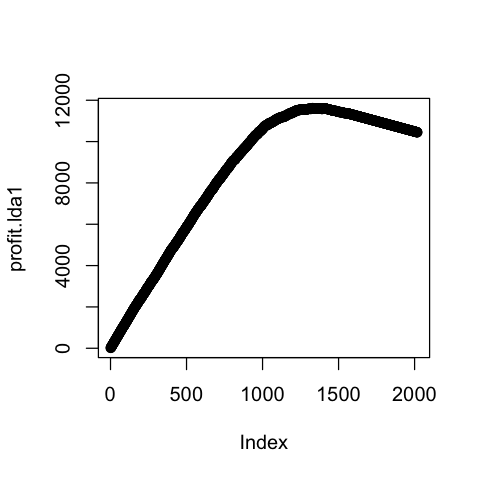

In [379]:
profit.lda1 <- cumsum(14.5*c.valid[order(post.valid.lda1, decreasing=T)]-2)
options(repr.plot.width=4, repr.plot.height=4) #resize plots
plot(profit.lda1) # see how profits change as more mailings are made
n.mail.valid <- which.max(profit.lda1) # number of mailings that maximizes profits
c(n.mail.valid, max(profit.lda1)) # report number of mailings and maximum profit

cutoff.lda1 <- sort(post.valid.lda1, decreasing=T)[n.mail.valid+1] # set cutoff based on n.mail.valid
chat.valid.lda1 <- ifelse(post.valid.lda1>cutoff.lda1, 1, 0) # mail to everyone above the cutoff
table(chat.valid.lda1, c.valid) # classification table

In [20]:
round(mean(chat.valid.lda1==c.valid),3) #accuracy
# check n.mail.valid = 344+985 = 1329
# check profit = 14.5*985-2*1329 = 11624.5

[1] 0.823

In [ ]:
# profit is 11624.5

## LDA with log transformed variables and some vars removed

[1]  1315 11725

               c.valid
chat.valid.lda1   0   1
              0 694   9
              1 325 990

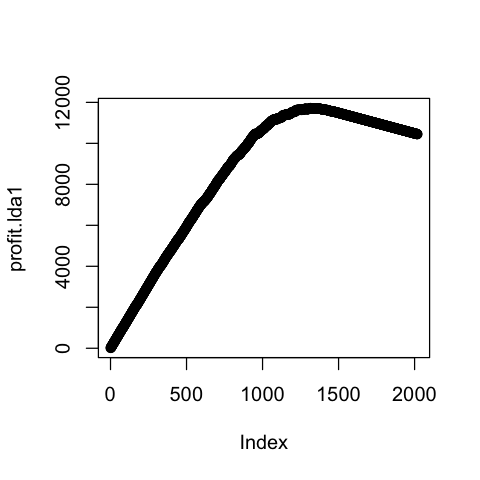

In [80]:
model.log.lda1 <- lda(donr ~ reg1 + reg2 + home + chld + hinc + I(hinc^2) 
                   + wrat + avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon +
                   tlag + agif,data.train.log.std.c.rem) 

post.valid.log.lda1 <- predict(model.log.lda1, data.valid.log.std.c.rem)$posterior[,2] 

profit.lda1 <- cumsum(14.5*c.valid[order(post.valid.log.lda1, decreasing=T)]-2)
options(repr.plot.width=4, repr.plot.height=4) #resize plots
plot(profit.lda1) # see how profits change as more mailings are made
n.mail.valid <- which.max(profit.lda1) # number of mailings that maximizes profits
c(n.mail.valid, max(profit.lda1)) # report number of mailings and maximum profit

cutoff.lda1 <- sort(post.valid.log.lda1, decreasing=T)[n.mail.valid+1] # set cutoff based on n.mail.valid
chat.valid.lda1 <- ifelse(post.valid.log.lda1>cutoff.lda1, 1, 0) # mail to everyone above the cutoff
table(chat.valid.lda1, c.valid) # classification table

In [81]:
round(mean(chat.valid.lda1==c.valid),3) #accuracy

[1] 0.834

In [ ]:
# profit is 11715

# LDA with logged vars

[1]  1320 11715

               c.valid
chat.valid.lda1   0   1
              0 689   9
              1 330 990

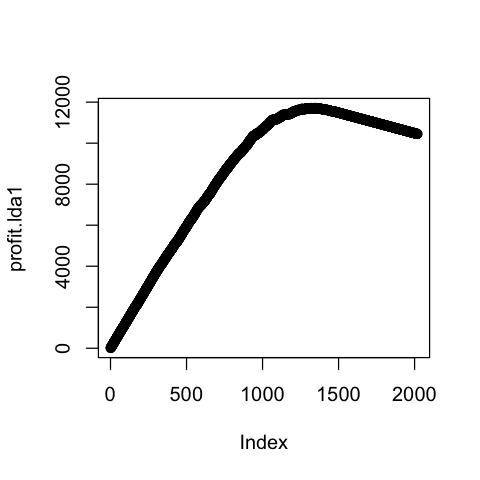

In [293]:
model.log.lda1 <- lda(donr ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + I(hinc^2) + genf
                   + wrat + avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon +
                   tlag + agif,data.train.log.std.c) 

post.valid.log.lda1 <- predict(model.log.lda1, data.valid.log.std.c)$posterior[,2] 

profit.lda1 <- cumsum(14.5*c.valid[order(post.valid.log.lda1, decreasing=T)]-2)
options(repr.plot.width=4, repr.plot.height=4) #resize plots
plot(profit.lda1) # see how profits change as more mailings are made
n.mail.valid <- which.max(profit.lda1) # number of mailings that maximizes profits
c(n.mail.valid, max(profit.lda1)) # report number of mailings and maximum profit

cutoff.lda1 <- sort(post.valid.log.lda1, decreasing=T)[n.mail.valid+1] # set cutoff based on n.mail.valid
chat.valid.lda1 <- ifelse(post.valid.log.lda1>cutoff.lda1, 1, 0) # mail to everyone above the cutoff
table(chat.valid.lda1, c.valid) # classification table

# Quadratic Discriminant Analysis

In [292]:
?qda

[1]  1372.0 11219.5

              c.valid
chat.valid.qda   0   1
             0 610  36
             1 409 963

[1] 0.779

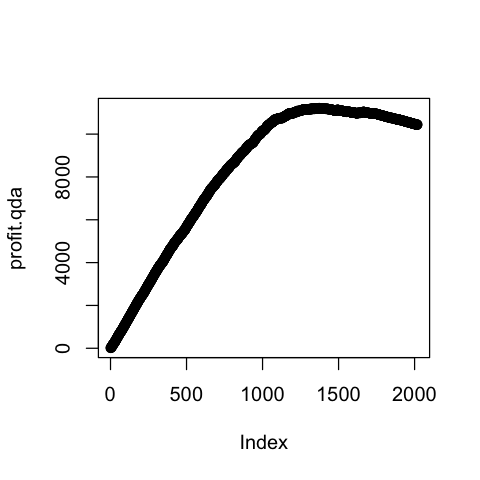

In [393]:
model.qda=qda(donr ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + I(hinc^2) + genf + 
                   wrat + avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon +
                   tlag + agif,data.train.std.c) 

post.valid.qda=predict(model.qda, data.valid.std.c)$posterior[,2]
qda.pred=predict(model.qda, data.valid.std.c)$class

profit.qda <- cumsum(14.5*c.valid[order(post.valid.qda, decreasing=T)]-2)
options(repr.plot.width=4, repr.plot.height=4) #resize plots
plot(profit.qda) # see how profits change as more mailings are made
n.mail.valid <- which.max(profit.qda) # number of mailings that maximizes profits
c(n.mail.valid, max(profit.qda)) # report number of mailings and maximum profit

cutoff.qda <- sort(post.valid.qda, decreasing=T)[n.mail.valid+1] 
chat.valid.qda <- ifelse(post.valid.qda>cutoff.qda, 1, 0) # mail to everyone above the cutoff
table(chat.valid.qda, c.valid) # classification table

In [413]:
round(mean(chat.valid.qda==c.valid),3) #accuracy

[1] 0.779

In [ ]:
# profit is 11219.5

## QDA log transformed variables

[1]  1240 11179

              c.valid
chat.valid.qda   0   1
             0 721  57
             1 298 942

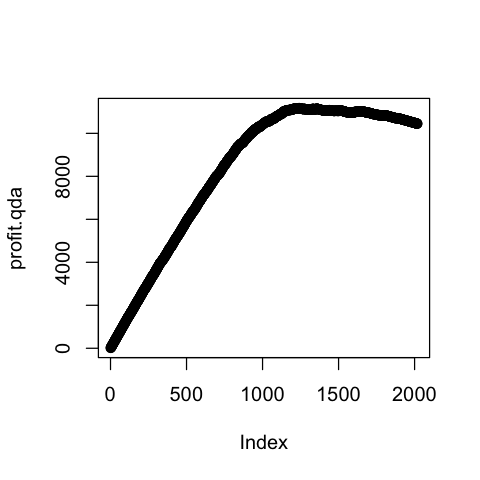

In [21]:
model.log.qda=qda(donr ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + I(hinc^2) + genf + 
                   wrat + avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon +
                   tlag + agif,data.train.log.std.c) 

post.valid.log.qda=predict(model.log.qda, data.valid.log.std.c)$posterior[,2]
qda.log.pred=predict(model.log.qda, data.valid.log.std.c)$class

profit.qda <- cumsum(14.5*c.valid[order(post.valid.log.qda, decreasing=T)]-2)
options(repr.plot.width=4, repr.plot.height=4) #resize plots
plot(profit.qda) # see how profits change as more mailings are made
n.mail.valid <- which.max(profit.qda) # number of mailings that maximizes profits
c(n.mail.valid, max(profit.qda)) # report number of mailings and maximum profit
# 1329.0 11624.5
cutoff.qda <- sort(post.valid.log.qda, decreasing=T)[n.mail.valid+1] 
chat.valid.qda <- ifelse(post.valid.log.qda>cutoff.qda, 1, 0) 
table(chat.valid.qda, c.valid) # classification table

In [22]:
round(mean(chat.valid.qda==c.valid),3) #accuracy

[1] 0.824

In [ ]:
# profit is 11179

# Logistic Regression

[1]  1291.0 11642.5

               c.valid
chat.valid.log1   0   1
              0 709  18
              1 310 981

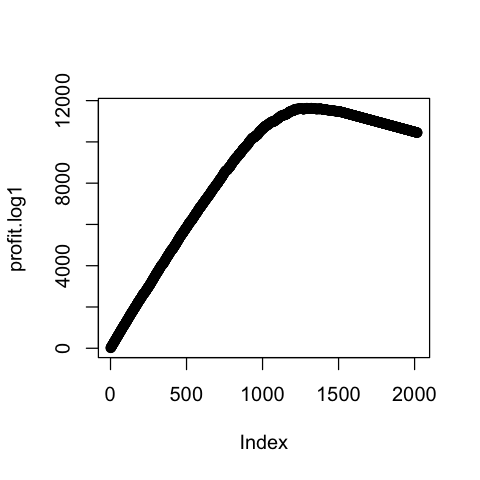

In [118]:
# logistic regression
model.log1 <- glm(donr ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + I(hinc^2) + genf 
                + wrat + avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon + tlag 
                  + agif, data.train.std.c, family=binomial("logit"))

post.valid.log1 <- predict(model.log1, data.valid.std.c, type="response") # n.valid post probs

# calculate ordered profit function using average donation = $14.50 and mailing cost = $2

profit.log1 <- cumsum(14.5*c.valid[order(post.valid.log1, decreasing=T)]-2)
plot(profit.log1) # see how profits change as more mailings are made
n.mail.valid <- which.max(profit.log1) #number of mailings that maximizes profits
c(n.mail.valid, max(profit.log1)) # report number of mailings and maximum profit
# 1291.0 11642.5

cutoff.log1 <- sort(post.valid.log1, decreasing=T)[n.mail.valid+1] 
# set cutoff based on n.mail.valid
chat.valid.log1 <- ifelse(post.valid.log1>cutoff.log1, 1, 0) 
# mail to everyone above the cutoff
table(chat.valid.log1, c.valid) # classification table

In [119]:
round(mean(chat.valid.log1==c.valid),3) #accuracy

[1] 0.837

In [ ]:
#profit = 14.5*981-2*1291 = 11642.5

In [ ]:
#               c.valid
#chat.valid.log1   0   1
#              0 709  18
#              1 310 981
# check n.mail.valid = 310+981 = 1291
# check profit = 14.5*981-2*1291 = 11642.5

## Logistic with log-transformed variables

[1]  1287.0 11708.5

               c.valid
chat.valid.log1   0   1
              0 717  14
              1 302 985

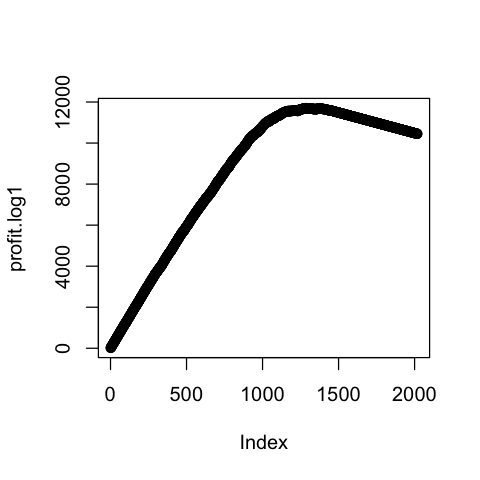

In [294]:
# logistic regression
model.log.log1 <- glm(donr ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + I(hinc^2) + genf 
                + wrat + avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon + tlag 
                  + agif, data.train.log.std.c, family=binomial("logit"))

post.valid.log.log1 <- predict(model.log.log1, data.valid.log.std.c, type="response") 
profit.log1 <- cumsum(14.5*c.valid[order(post.valid.log.log1, decreasing=T)]-2)
plot(profit.log1) 
n.mail.valid <- which.max(profit.log1) 
c(n.mail.valid, max(profit.log1))
# 1291.0 11642.5

cutoff.log1 <- sort(post.valid.log.log1, decreasing=T)[n.mail.valid+1] 
chat.valid.log1 <- ifelse(post.valid.log.log1>cutoff.log1, 1, 0) 
table(chat.valid.log1, c.valid) 

In [296]:
coef(model.log.log1)

(Intercept)        reg1        reg2        reg3        reg4        home 
 0.64407602  0.70568059  1.56399041 -0.01882569  0.00394426  1.55080603 
       chld        hinc   I(hinc^2)        genf        wrat        avhv 
-2.58128405  0.09063634 -1.21700237 -0.07556360  1.29550619  0.10111802 
       incm        inca        plow        npro        tgif        lgif 
 0.67056658  0.04874080  0.02969924  0.16079198  0.48484659 -0.13062466 
       rgif        tdon        tlag        agif 
-0.05895390 -0.32240123 -0.60435384  0.14685211

In [26]:
round(mean(chat.valid.log1==c.valid),3) #accuracy

[1] 0.843

In [ ]:
# profit is 11708.5

## Logistic with logged vars and some vars removed

[1]  1302.0 11707.5

               c.valid
chat.valid.log1   0   1
              0 704  12
              1 315 987

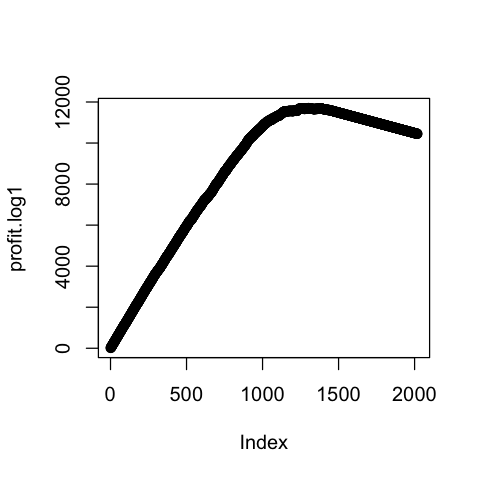

In [84]:
# logistic regression
model.log.log1 <- glm(donr ~ reg1 + reg2 + home + chld + hinc + I(hinc^2)
                + wrat + avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon + tlag 
                  + agif, data.train.log.std.c.rem, family=binomial("logit"))

post.valid.log.log1 <- predict(model.log.log1, data.valid.log.std.c.rem, type="response") 
profit.log1 <- cumsum(14.5*c.valid[order(post.valid.log.log1, decreasing=T)]-2)
plot(profit.log1) 
n.mail.valid <- which.max(profit.log1) 
c(n.mail.valid, max(profit.log1))
# 1291.0 11642.5

cutoff.log1 <- sort(post.valid.log.log1, decreasing=T)[n.mail.valid+1] 
chat.valid.log1 <- ifelse(post.valid.log.log1>cutoff.log1, 1, 0) 
table(chat.valid.log1, c.valid) 

In [85]:
round(mean(chat.valid.log1==c.valid),3) #accuracy

[1] 0.838

# Logistic GAM Regression

A cubic spline with k knots has 4+k degrees of freedom. <br>
ns(var,df=r) fits natural splines with r degrees of freedom.

In [27]:
model.log.log1 <- gam(donr ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + I(hinc^2) + genf 
                + wrat + avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon + tlag 
                  + agif, data.train.std.c, family=binomial("logit"))




anova(model.log1,model.gam1,test="Chisq")
anova(model.log1,model.gam2,test='Chisq')
anova(model.log1,model.gam3,test='Chisq')
anova(model.log1,model.gam4,test='Chisq')

ERROR: Error in anova(model.log1, model.gam1, test = "Chisq"): object 'model.log1' not found


In [28]:
post.valid.gam <- predict(model.gam3, data.valid.std.c, type="response") # n.valid post probs

profit.gam <- cumsum(14.5*c.valid[order(post.valid.gam, decreasing=T)]-2)
plot(profit.gam) 
n.mail.valid <- which.max(profit.gam) 
c(n.mail.valid, max(profit.gam)) 
cutoff.gam <- sort(post.valid.gam, decreasing=T)[n.mail.valid+1] 
chat.valid.gam <- ifelse(post.valid.gam>cutoff.gam, 1, 0) 
table(chat.valid.gam, c.valid) 

ERROR: Error in predict(model.gam3, data.valid.std.c, type = "response"): object 'model.gam3' not found


In [424]:
round(mean(chat.valid.gam==c.valid),3) #accuracy

[1] 0.859

In [425]:
summary(model.gam)


Call: gam(formula = donr ~ reg1 + reg2 + reg3 + reg4 + home + hinc + 
    I(hinc^2) + genf + plow + s(tlag, df = 5) + s(tdon, df = 5) + 
    s(chld, df = 5) + s(npro, df = 5) + s(tgif, df = 5) + s(lgif, 
    df = 5) + s(rgif, df = 5) + s(wrat, df = 5) + s(avhv, df = 5) + 
    s(incm, df = 5) + s(inca, df = 5) + agif, family = binomial("logit"), 
    data = data.train.std.c)
Deviance Residuals:
      Min        1Q    Median        3Q       Max 
-3.351022 -0.152355  0.002874  0.259030  2.793569 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 5522.988 on 3983 degrees of freedom
Residual Deviance: 1651.084 on 3918.001 degrees of freedom
AIC: 1783.081 

Number of Local Scoring Iterations: 10 

Anova for Parametric Effects
                  Df  Sum Sq Mean Sq  F value    Pr(>F)    
reg1               1    3.18    3.18   3.9498   0.04695 *  
reg2               1   49.00   49.00  60.9241 7.557e-15 ***
reg3               1    0.29    0.29   0.3583   0.54951    
r

# Results

In [375]:
# Results



post.test <- predict(boost.charity, data.test.std, type="response",n.trees=5000) # post probs for test data

# Oversampling adjustment for calculating number of mailings for test set

n.mail.valid <- which.max(profit.boost)
tr.rate <- .1 # typical response rate is .1
vr.rate <- .5 # whereas validation response rate is .5
adj.test.1 <- (n.mail.valid/n.valid.c)/(vr.rate/tr.rate) # adjustment for mail yes
adj.test.0 <- ((n.valid.c-n.mail.valid)/n.valid.c)/((1-vr.rate)/(1-tr.rate)) # adjustment for mail no
adj.test <- adj.test.1/(adj.test.1+adj.test.0) # scale into a proportion
n.mail.test <- round(n.test*adj.test, 0) # calculate number of mailings for test set

cutoff.test <- sort(post.test, decreasing=T)[n.mail.test+1] # set cutoff based on n.mail.test
chat.test <- ifelse(post.test>cutoff.test, 1, 0) # mail to everyone above the cutoff
table(chat.test)
#    0    1 
# 1676  331
# based on this model we'll mail to the 331 highest posterior probabilities

# See below for saving chat.test into a file for submission

chat.test
   0    1 
1686  321 

**Personal notes:** <br>
Issue with test set, so we have posterior probabilities of responding, how do we calculate profits and optimal number to mail to?
1) order probs from largest to smallest
2) calculate profit for each # of potential people to mail to based on actual response or not
   issue: we don't have actual responses for test set, so we need to estimate them:
   and actually, we just estimate optimal profit via optimal # of people to mail to
   via expected % of people that'll respond in test set
   estimate actual responses as:
  a) validation set % of obs to mail to that optimizes validation set profit
   adjusted by (% of test set obs that typically respond) / (% of val obs that respond)
  b)  to get the expected % of actual responders for test set
  c) Then we do a similar thing for % of nonresponders for test set, though observe that
  d) these 2 estimated values don't sum to 1, so we re-scale
       so we're assuming that the % of obs to mail to with the highest probs in the validation 
       set that maximize profit are similar to those in the test set, and that we can use an 
       adjusted version of this number as a proxy for the expected number of actual responses 
       in the test set. 
  e) We multiply expected test % of responders by # of obs in test to get # to mail to
    thus for test set
  f) We order test set by probs and select first (# to mail to) obs 
  g) thus, we'll mail to 331 test set obs
    
   
3) using estimated responses select # of mailings that maximizes profit

In the validation set, if we mail to the 1291 obs with the highest predicted probabilities, then we'll achieve maximum profit.  The percentage of obs that we'll mail to in the validation set is then 64% of obs.  Multiple this by (% of test obs that respond usually)/(% of validation obs that respond) to adjust the % of obs that we'll mail to in the validation set to be the % of obs that'll respond in the test set.  We adjust 64%, the % of obs we'll mail to, downwards to be 20% of its original value, which is 12.8%, for the test set, because we expect less of the test set to respond (we expect there to be an 80% decrease in responses, so we'll decrease the amt of responses for the test set downwards 80% from the validation set amt of **mailings**).  So we're going from the amt to mail to in the validation set, to the amt who we'll say are responders in the test set.  Weird.

In [61]:
n.mail.valid/n.valid.c
(.1/.5)
(.1/.5)*.64
(.1/.5)-1

[1] 0.6397423

[1] 0.2

[1] 0.128

[1] -0.8

# Prediction Modeling

# Least Squares Linear Regression

In [356]:
##### PREDICTION MODELING ######

# Least squares regression
model.ls1 <- lm(damt ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + genf + wrat + 
                  avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon + tlag + agif, 
                data.train.std.y)

pred.valid.ls1 <- predict(model.ls1, newdata = data.valid.std.y) # validation predictions
mean((y.valid - pred.valid.ls1)^2) # mean prediction error
# 1.867523
sd((y.valid - pred.valid.ls1)^2)/sqrt(n.valid.y) # std error
# 0.1696615

# drop wrat for illustrative purposes
model.ls2 <- lm(damt ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + genf + 
                  avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon + tlag + agif, 
                data.train.std.y)

pred.valid.ls2 <- predict(model.ls2, newdata = data.valid.std.y) # validation predictions
mean((y.valid - pred.valid.ls2)^2) # mean prediction error
# 1.867433
sd((y.valid - pred.valid.ls2)^2)/sqrt(n.valid.y) # std error
# 0.1696498

# Results

# MPE  Model
# 1.867523 LS1
# 1.867433 LS2

# select model.ls2 since it has minimum mean prediction error in the validation sample

yhat.test <- predict(model.ls2, newdata = data.test.std) # test predictions

[1] 1.867523

[1] 0.1696615

[1] 1.867433

[1] 0.1696498

In [358]:
summary(model.ls1)


Call:
lm(formula = damt ~ reg1 + reg2 + reg3 + reg4 + home + chld + 
    hinc + genf + wrat + avhv + incm + inca + plow + npro + tgif + 
    lgif + rgif + tdon + tlag + agif, data = data.train.std.y)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4493 -0.7970 -0.1534  0.6057  9.1106 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.189957   0.047363 299.601  < 2e-16 ***
reg1        -0.038804   0.039626  -0.979  0.32758    
reg2        -0.074053   0.042939  -1.725  0.08476 .  
reg3         0.327051   0.040405   8.094 9.96e-16 ***
reg4         0.635806   0.041596  15.285  < 2e-16 ***
home         0.238225   0.060728   3.923 9.05e-05 ***
chld        -0.604395   0.037950 -15.926  < 2e-16 ***
hinc         0.501934   0.039843  12.598  < 2e-16 ***
genf        -0.063174   0.028496  -2.217  0.02674 *  
wrat        -0.001583   0.041509  -0.038  0.96959    
avhv        -0.056103   0.054302  -1.033  0.30165    
incm         0.289597   0.059094   4.901 1

## Least Squares with log transformed variables

In [354]:
model.log.ls2 <- lm(damt ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + genf + 
                  avhv + incm + inca + plow + npro + tgif + lgif + rgif + tdon + tlag + agif, 
                 data.train.log.std.y)

pred.valid.log.ls2 <- predict(model.log.ls2, newdata = data.valid.log.std.y) # validation predictions
mean((y.valid - pred.valid.log.ls2)^2) # mean prediction error
# 1.867433

[1] 1.645233

In [355]:
summary(model.log.ls2)


Call:
lm(formula = damt ~ reg1 + reg2 + reg3 + reg4 + home + chld + 
    hinc + genf + avhv + incm + inca + plow + npro + tgif + lgif + 
    rgif + tdon + tlag + agif, data = data.train.log.std.y)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2657 -0.7771 -0.1858  0.5137  8.9229 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.20214    0.04194 338.639  < 2e-16 ***
reg1        -0.04536    0.03697  -1.227 0.220085    
reg2        -0.08791    0.04019  -2.187 0.028838 *  
reg3         0.31710    0.03785   8.378  < 2e-16 ***
reg4         0.63810    0.03888  16.413  < 2e-16 ***
home         0.24042    0.05694   4.222 2.53e-05 ***
chld        -0.52786    0.03181 -16.596  < 2e-16 ***
hinc         0.51001    0.03729  13.678  < 2e-16 ***
genf        -0.06512    0.02670  -2.439 0.014812 *  
avhv        -0.09065    0.05195  -1.745 0.081119 .  
incm         0.23209    0.05868   3.955 7.92e-05 ***
inca         0.01815    0.06475   0.280 0.779232    
plow

# Best Subset Selection

In [341]:
library(leaps)
set.seed(1)
train=sample(c(TRUE,FALSE), nrow(data.train.std.y),rep=TRUE)
test =(! train )

test.mat=model.matrix(damt~.,data=data.train.std.y[test,])  

In [342]:
#create predict function for regsubsets
predict.regsubsets =function (object ,newdata ,id ,...){
form=as.formula(object$call [[2]])
mat=model.matrix(form,newdata)
coefi=coef(object ,id=id)
xvars=names(coefi)
mat[,xvars]%*%coefi }


k=5
set.seed(1)
folds=sample(1:k,nrow(data.train.std.y),replace=TRUE)
cv.errors=matrix(NA,k,21, dimnames=list(NULL, paste(1:21)))

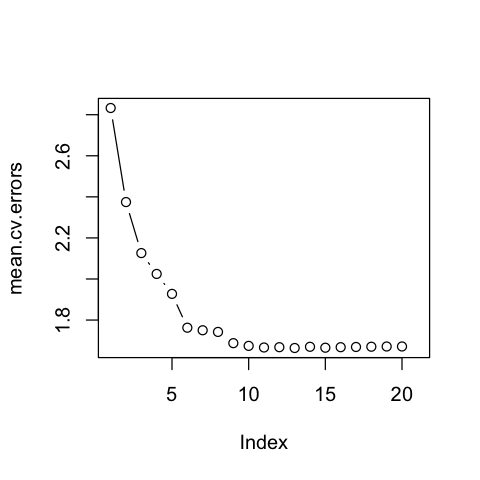

In [343]:
set.seed(1)
for(j in 1:k){
best.fit = regsubsets (damt~.,data =data.train.std.y[folds!= j,],nvmax=20)
    for (i in 1:20){
pred=predict(best.fit,data.train.std.y[folds==j,],id=i) 
cv.errors[j,i]=mean((y.train[folds==j]-pred)^2)
}}

mean.cv.errors=apply(cv.errors ,2,mean)
par(mfrow=c(1,1))
plot(mean.cv.errors ,type='b')

In [34]:
order(mean.cv.errors)[1]

[1] 13

In [744]:
model.best=regsubsets(damt~.,data=data.train.std.y,nvmax =21)
coef(model.best,13)

(Intercept)        reg2        reg3        reg4        home        chld 
14.17722363 -0.04565740  0.34558488  0.65452494  0.23976299 -0.60952031 
       hinc        genf        incm        plow        npro        rgif 
 0.50188476 -0.06330083  0.31246592  0.25900395  0.18196966  0.49109408 
       tdon        agif 
 0.07073946  0.65723853

**Perform linear regression with best subset model.**

In [730]:
model.bestsub <-  lm(damt ~ reg2 + reg3 + reg4 + home + chld + hinc + genf +
                  incm + plow + npro + rgif + tdon + agif, 
                  data.train.std.y)

bestsub.pred <- predict(model.bestsub, newdata = data.valid.std.y) 
mean((y.valid - bestsub.pred)^2)

[1] 1.859918

In [905]:
summary(model.best)

Subset selection object
Call: regsubsets.formula(damt ~ ., data = data.train.std.y, nvmax = 21)
20 Variables  (and intercept)
     Forced in Forced out
reg1     FALSE      FALSE
reg2     FALSE      FALSE
reg3     FALSE      FALSE
reg4     FALSE      FALSE
home     FALSE      FALSE
chld     FALSE      FALSE
hinc     FALSE      FALSE
genf     FALSE      FALSE
wrat     FALSE      FALSE
avhv     FALSE      FALSE
incm     FALSE      FALSE
inca     FALSE      FALSE
plow     FALSE      FALSE
npro     FALSE      FALSE
tgif     FALSE      FALSE
lgif     FALSE      FALSE
rgif     FALSE      FALSE
tdon     FALSE      FALSE
tlag     FALSE      FALSE
agif     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          reg1 reg2 reg3 reg4 home chld hinc genf wrat avhv incm inca plow npro
1  ( 1 )  " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  " "  " " 
2  ( 1 )  " "  " "  " "  "*"  " "  " "  " "  " "  " "  " "  " "  " "  " "  " " 
3  ( 1 )  " "  " "  " " 

## Best Subset Selection with log transformed variables

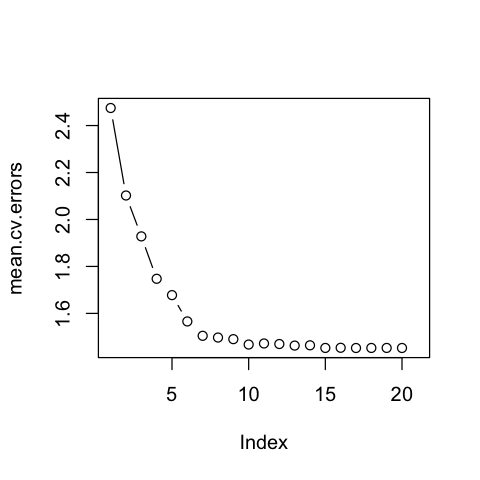

In [344]:
set.seed(1)
for(j in 1:k){
best.fit = regsubsets (damt~.,data =data.train.log.std.y[folds!= j,],nvmax=20)
    for (i in 1:20){
pred=predict(best.fit,data.train.log.std.y[folds==j,],id=i) 
cv.errors[j,i]=mean((y.train[folds==j]-pred)^2)
}}

mean.cv.errors=apply(cv.errors ,2,mean)
par(mfrow=c(1,1))
plot(mean.cv.errors ,type='b')

In [349]:
cv.errors

1,2,3,4,5,6,7,8,9,10,⋯,12,13,14,15,16,17,18,19,20,21
2.114061,1.774151,1.501953,1.387441,1.281573,1.174297,1.077852,1.091293,1.073148,1.058834,⋯,1.063417,1.067867,1.062345,1.057033,1.058331,1.060852,1.063343,1.062352,1.061662,NA
2.739905,2.393840,2.290132,2.046199,1.942201,1.858283,1.821268,1.840221,1.802360,1.784571,⋯,1.780236,1.783461,1.777950,1.766990,1.766583,1.765793,1.765022,1.763759,1.764060,NA
2.667569,2.230326,1.992970,1.830156,1.763388,1.644241,1.605717,1.585084,1.619804,1.573494,⋯,1.600333,1.600897,1.592415,1.591663,1.593040,1.586207,1.584323,1.585667,1.585626,NA
2.534971,2.126801,1.962709,1.883616,1.816890,1.674688,1.604107,1.594361,1.619757,1.580059,⋯,1.584512,1.585136,1.564249,1.562916,1.571887,1.569768,1.569498,1.570862,1.571271,NA
2.317193,1.985443,1.892152,1.589859,1.585108,1.477498,1.413877,1.374901,1.336393,1.340145,⋯,1.319407,1.277241,1.323607,1.285855,1.278033,1.280499,1.282102,1.281978,1.281060,NA


In [36]:
order(mean.cv.errors)[1]

[1] 17

In [345]:
model.best=regsubsets(damt~.,data=data.train.std.y,nvmax =21)
coef(model.best,17)

(Intercept)        reg1        reg2        reg3        reg4        home 
14.18307322 -0.03831499 -0.07270517  0.32691895  0.63574555  0.24052942 
       chld        hinc        genf        avhv        incm        plow 
-0.60754658  0.50212135 -0.06262598 -0.03448664  0.31987350  0.23956208 
       npro        tgif        lgif        rgif        tdon        agif 
 0.13779372  0.05916779 -0.05477974  0.51643380  0.07203396  0.67131742

In [352]:
#perform linear regression with these 17 predictors
model.bestsub <-  lm(damt ~ reg1 + reg2 + reg3 + reg4 + home + chld + hinc + genf + 
                  avhv + incm  + plow + npro + tgif + lgif + rgif + tdon + agif, 
                  data.train.log.std.y)

bestsub.pred <- predict(model.bestsub, newdata = data.valid.log.std.y) 
mean((y.valid - bestsub.pred)^2)

[1] 1.645858

In [353]:
summary(model.bestsub)


Call:
lm(formula = damt ~ reg1 + reg2 + reg3 + reg4 + home + chld + 
    hinc + genf + avhv + incm + plow + npro + tgif + lgif + rgif + 
    tdon + agif, data = data.train.log.std.y)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2417 -0.7781 -0.1828  0.5058  8.9381 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.19639    0.04126 344.032  < 2e-16 ***
reg1        -0.04495    0.03695  -1.217 0.223889    
reg2        -0.08665    0.04012  -2.160 0.030928 *  
reg3         0.31721    0.03782   8.388  < 2e-16 ***
reg4         0.63836    0.03886  16.426  < 2e-16 ***
home         0.24237    0.05685   4.263 2.11e-05 ***
chld        -0.53019    0.03165 -16.752  < 2e-16 ***
hinc         0.51073    0.03721  13.725  < 2e-16 ***
genf        -0.06476    0.02668  -2.427 0.015305 *  
avhv        -0.08228    0.04281  -1.922 0.054768 .  
incm         0.23916    0.05176   4.621 4.07e-06 ***
plow         0.03588    0.05469   0.656 0.511855    
npro         0.025

# Ridge Regression

In [104]:
set.seed(1)
library(glmnet)
grid=10^seq(10,-2,length=100)
model.ridge=glmnet(x.train.donors,y.train,alpha=0,lambda=grid,standardize=FALSE)

In [634]:
model.ridge


Call:  glmnet(x = x.train.donors, y = y.train, alpha = 0, lambda = grid,      standardize = FALSE) 

       Df      %Dev    Lambda
  [1,] 20 3.881e-10 1.000e+10
  [2,] 20 5.130e-10 7.565e+09
  [3,] 20 6.781e-10 5.722e+09
  [4,] 20 8.965e-10 4.329e+09
  [5,] 20 1.185e-09 3.275e+09
  [6,] 20 1.567e-09 2.477e+09
  [7,] 20 2.071e-09 1.874e+09
  [8,] 20 2.738e-09 1.417e+09
  [9,] 20 3.619e-09 1.072e+09
 [10,] 20 4.784e-09 8.111e+08
 [11,] 20 6.324e-09 6.136e+08
 [12,] 20 8.360e-09 4.642e+08
 [13,] 20 1.105e-08 3.511e+08
 [14,] 20 1.461e-08 2.656e+08
 [15,] 20 1.931e-08 2.009e+08
 [16,] 20 2.553e-08 1.520e+08
 [17,] 20 3.375e-08 1.150e+08
 [18,] 20 4.462e-08 8.697e+07
 [19,] 20 5.898e-08 6.579e+07
 [20,] 20 7.797e-08 4.977e+07
 [21,] 20 1.031e-07 3.765e+07
 [22,] 20 1.363e-07 2.848e+07
 [23,] 20 1.801e-07 2.154e+07
 [24,] 20 2.381e-07 1.630e+07
 [25,] 20 3.148e-07 1.233e+07
 [26,] 20 4.161e-07 9.326e+06
 [27,] 20 5.501e-07 7.055e+06
 [28,] 20 7.272e-07 5.337e+06
 [29,] 20 9.612e-07 4.037e+0

[1] 0.1107589

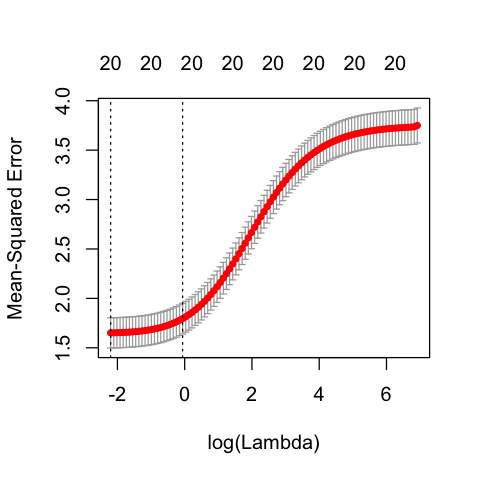

In [105]:
set.seed (1)
cv.out=cv.glmnet(x.train.donors,y.train,alpha=0) #10 fold cross validation
plot(cv.out)
bestlam=cv.out$lambda.min #we select lambda that results in lowest MSE
bestlam

In [338]:
?glmnet

In [107]:
ridge.pred=predict(model.ridge,s=bestlam ,newx=x.valid.donors)
mean((ridge.pred-y.valid)^2)

[1] 1.876935

## Ridge Regression with log transformed predictors

In [334]:
set.seed(1)
grid=10^seq(10,-2,length=100)
model.ridge=glmnet(x.train.log.donors,y.train,alpha=0,lambda=grid,standardize=FALSE)
cv.out=cv.glmnet(x.train.log.donors,y.train,alpha=0) #10 fold cross validation
bestlam=cv.out$lambda.min #we select lambda that results in lowest MSE
ridge.pred=predict(model.ridge,s=bestlam ,newx=x.valid.log.donors)
mean((ridge.pred-y.valid)^2)

[1] 1.636306

In [337]:
bestlam

[1] 0.1247257

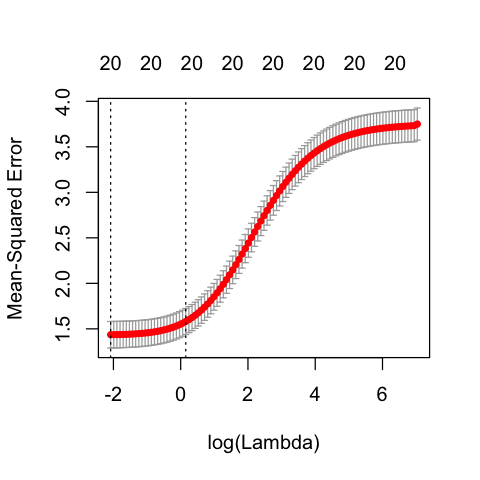

In [335]:
plot(cv.out)

# Lasso 

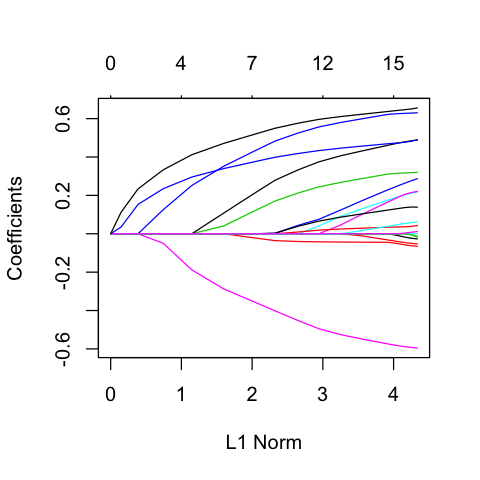

In [536]:
library(glmnet)
grid=10^seq(10,-2,length=100)
lasso.mod=glmnet(x.train.donors,y.train,alpha=1,lambda=grid)
plot(lasso.mod)

lambda that results in best cv error is .119.

[1] 0.1187631

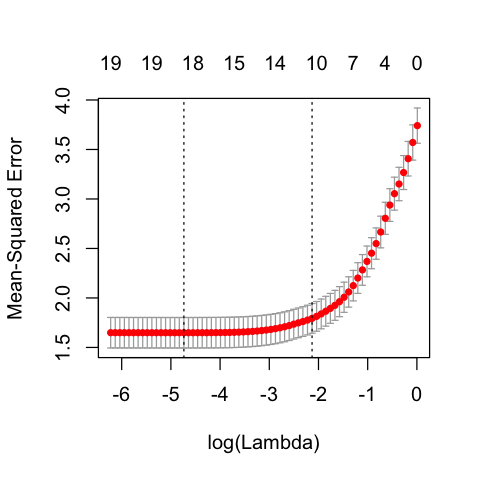

In [538]:
set.seed(1)
cv.out=cv.glmnet(x.train.donors,y.train,alpha=1) #performs 10-fold CV
bestlam=cv.out$lambda.1se #get best lambda (the one that minimizes error)
bestlam
plot(cv.out) #plot lambdas and cv errors
lasso.pred=predict(lasso.mod,s=bestlam ,newx=x.valid.donors)


In [539]:
mean((lasso.pred-y.valid)^2) #not an improvement over linear regression

[1] 2.026994

## Lasso with logged predictors

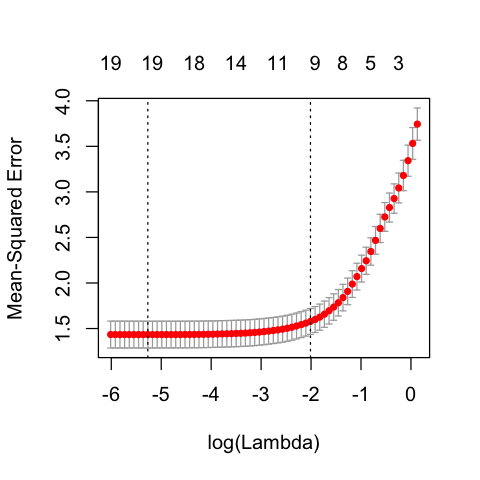

In [339]:
library(glmnet)
grid=10^seq(10,-2,length=100)
lasso.mod=glmnet(x.train.log.donors,y.train,alpha=1,lambda=grid)
set.seed(1)
cv.out=cv.glmnet(x.train.log.donors,y.train,alpha=1) #performs 10-fold CV
bestlam=cv.out$lambda.1se #get best lambda (the one that minimizes error)
plot(cv.out) #plot lambdas and cv errors
lasso.pred=predict(lasso.mod,s=bestlam ,newx=x.valid.log.donors)

In [340]:
bestlam

[1] 0.1337393

In [126]:
mean((lasso.pred-y.valid)^2) #not an improvement over linear regression

[1] 1.799128

# Principal Components Regression

In [620]:
library(pls)
set.seed (1)
model.pcr=pcr(damt~.,data=data.train.std.y,scale=FALSE, validation ="CV")
#scale standardizes predictors

In [602]:
summary(model.pcr) 

Data: 	X dimension: 1995 20 
	Y dimension: 1995 1
Fit method: svdpc
Number of components considered: 20

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.937    1.938    1.649    1.635    1.612    1.483    1.464
adjCV        1.937    1.938    1.649    1.637    1.612    1.479    1.463
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       1.445    1.433    1.429     1.419     1.361     1.359     1.317
adjCV    1.443    1.433    1.429     1.418     1.362     1.354     1.316
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        1.301     1.301     1.303     1.305     1.304     1.286     1.286
adjCV     1.300     1.300     1.302     1.304     1.304     1.285     1.285

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X     19.2895    34.59    44.65    54.24    60.25    66.01  

In [328]:
?pcr

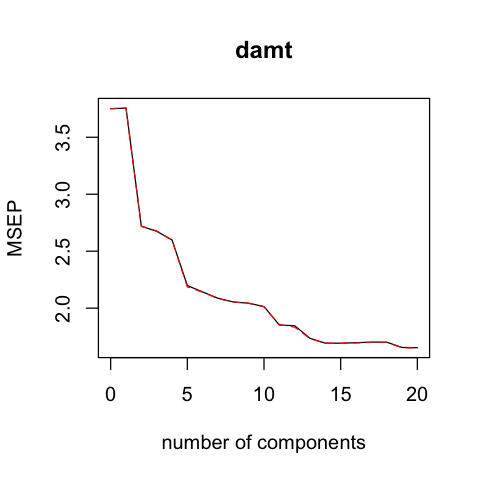

In [621]:
validationplot(model.pcr,val.type="MSEP") #plots cross validation MSE

In [622]:
pcr.pred=predict(model.pcr,x.valid.donors,ncomp=14)
mean((pcr.pred-y.valid)^2) #a slight improvement over linear regression

[1] 1.908628

In [623]:
pcr.pred=predict(model.pcr,x.valid.donors,ncomp=9) #9 components over just over 70% exp var
mean((pcr.pred-y.valid)^2) #not an improvement

[1] 2.17442

## PCR with logged predictors

Data: 	X dimension: 1995 20 
	Y dimension: 1995 1
Fit method: svdpc
Number of components considered: 20

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.937    1.939    1.533    1.518    1.477    1.308    1.297
adjCV        1.937    1.939    1.532    1.518    1.477    1.306    1.296
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       1.297    1.271    1.267     1.268     1.220     1.218     1.217
adjCV    1.297    1.271    1.267     1.268     1.219     1.217     1.216
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        1.218     1.219     1.210     1.201     1.201     1.201     1.201
adjCV     1.217     1.218     1.209     1.200     1.200     1.200     1.200

TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X     20.31249    36.09    47.05    57.04    63.32    69.21

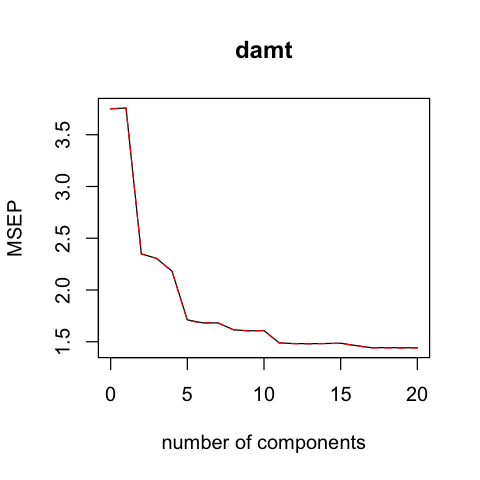

In [329]:
library(pls)
set.seed(1)
model.pcr=pcr(damt~.,data=data.train.log.std.y,scale=FALSE, validation ="CV")
validationplot(model.pcr,val.type="MSEP") #plots cross validation MSE
summary(model.pcr) 

In [330]:
pcr.pred=predict(model.pcr,x.valid.log.donors,ncomp=17) #lowest # of pcs for lowest cv score
mean((pcr.pred-y.valid)^2) #

[1] 1.620111

In [131]:
pcr.pred=predict(model.pcr,x.valid.log.donors,ncomp=7) #over 70% variance explained
mean((pcr.pred-y.valid)^2) #

[1] 1.882937

# Partial Least Squares Regression

In [618]:
library(pls)
set.seed(1)
model.pls=plsr(damt~.,data=data.train.std.y,scale=FALSE,validation='CV')
summary(model.pls)

Data: 	X dimension: 1995 20 
	Y dimension: 1995 1
Fit method: kernelpls
Number of components considered: 20

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.937    1.454    1.318    1.298     1.29    1.287    1.286
adjCV        1.937    1.454    1.318    1.296     1.29    1.286    1.285
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       1.286    1.286    1.286     1.286     1.286     1.286     1.286
adjCV    1.285    1.285    1.285     1.285     1.285     1.285     1.285
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        1.286     1.286     1.286     1.286     1.286     1.286     1.286
adjCV     1.285     1.285     1.285     1.285     1.285     1.285     1.285

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       14.32    21.24    31.49    44.49    52.53    55.

In [325]:
?plsr

In [619]:
pls.pred=predict(model.pls,x.valid.donors,ncomp=9) #the lowest cv error occurs when
mean((pls.pred-y.valid)^2)

[1] 1.869003

## PLSR with logged predictors

In [135]:
library(pls)
set.seed(1)
model.pls=plsr(damt~.,data=data.train.log.std.y,scale=FALSE,validation='CV')
summary(model.pls)

Data: 	X dimension: 1995 20 
	Y dimension: 1995 1
Fit method: kernelpls
Number of components considered: 20

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.937    1.331    1.223    1.211    1.204    1.202    1.201
adjCV        1.937    1.330    1.223    1.210    1.203    1.202    1.200
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       1.201    1.201    1.201     1.201     1.201     1.201     1.201
adjCV    1.200    1.200    1.200     1.200     1.200     1.200     1.200
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        1.201     1.201     1.201     1.201     1.201     1.201     1.201
adjCV     1.200     1.200     1.200     1.200     1.200     1.200     1.200

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       14.95    22.48    31.77    45.44    54.94    59.

In [136]:
pls.pred=predict(model.pls,x.valid.log.donors,ncomp=8) #over 70% and lowest cv score 
mean((pls.pred-y.valid)^2)

[1] 1.623341

## PLSR with logged vars and some vars removed

In [170]:
library(pls)
set.seed(1)
model.pls=plsr(damt~.,data=data.train.log.std.y.rem2,scale=FALSE,validation='CV')
summary(model.pls)

Data: 	X dimension: 1995 17 
	Y dimension: 1995 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           1.937    1.338    1.239    1.211    1.204    1.204    1.203
adjCV        1.937    1.337    1.238    1.209    1.204    1.203    1.203
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       1.204    1.204    1.204     1.204     1.204     1.204     1.204
adjCV    1.203    1.203    1.203     1.203     1.203     1.203     1.203
       14 comps  15 comps  16 comps  17 comps
CV        1.204     1.204     1.204     1.204
adjCV     1.203     1.203     1.203     1.203

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X        17.3    26.59    33.96    53.78    63.46    71.25    74.63    77.61
damt     52.6    59.59    61.70    61.94    62.04    62.09    62.12  

In [171]:
pls.pred=predict(model.pls,x.valid.log.donors.rem2,ncomp=6) #over 70% and lowest cv score 
mean((pls.pred-y.valid)^2)

[1] 1.63424

# Neural Networks

In [297]:
library(nnet)
library(mlbench)
library(caret)

Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin


Attaching package: ‘caret’

The following object is masked from ‘package:survival’:

    cluster



In [301]:
?nnet

In [589]:
summary(charity$damt)['Max.']

Max. 
  27 

In [140]:
set.seed(1)
mygrid <- expand.grid(.decay=c(0.5, 0.1), .size=c(4,5,6))
model.nn <- train(damt/27 ~ ., data=data.train.std.y, method="nnet", maxit=1000, 
                   tuneGrid=mygrid, trace=F) 
print(model.nn)

Neural Network 

1995 samples
  20 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1995, 1995, 1995, 1995, 1995, 1995, ... 
Resampling results across tuning parameters:

  decay  size  RMSE        Rsquared 
  0.1    4     0.04413770  0.6251239
  0.1    5     0.04413011  0.6252908
  0.1    6     0.04417788  0.6244561
  0.5    4     0.04582798  0.5993803
  0.5    5     0.04582069  0.5994732
  0.5    6     0.04581356  0.5995396

RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were size = 5 and decay = 0.1. 


In [302]:
?train

In [142]:
# multiply 27 to restore original scale
nn.pred <- predict(model.nn,newdata = data.valid.std.y)*27
 
# mean squared error:
mean((nn.pred - y.valid)^2) 

[1] 1.653663

## NNet with logged predictors

In [143]:
set.seed(1)
mygrid <- expand.grid(.decay=c(0.5, 0.1), .size=c(4,5,6))
model.nn <- train(damt/27 ~ ., data=data.train.log.std.y, method="nnet", maxit=1000, 
                   tuneGrid=mygrid, trace=F) 
print(model.nn)

Neural Network 

1995 samples
  20 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1995, 1995, 1995, 1995, 1995, 1995, ... 
Resampling results across tuning parameters:

  decay  size  RMSE        Rsquared 
  0.1    4     0.04436910  0.6210042
  0.1    5     0.04433367  0.6215969
  0.1    6     0.04437344  0.6209545
  0.5    4     0.04468776  0.6179639
  0.5    5     0.04466834  0.6180931
  0.5    6     0.04466485  0.6180657

RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were size = 5 and decay = 0.1. 


In [144]:
# multiply 27 to restore original scale
nn.pred <- predict(model.nn,newdata = data.valid.log.std.y)*27
 
# mean squared error:
mean((nn.pred - y.valid)^2) 

[1] 1.63466

# Gradient Boosted Machines

In [303]:
library('gbm')
set.seed(1)
model.gbm <- gbm(formula = damt~ ., 
             distribution = "gaussian",
             data = data.train.std.y,
             n.trees = 70,
             interaction.depth = 5,
             shrinkage = 0.3,
             bag.fraction = 0.5,
             train.fraction = 1.0,
             n.cores = NULL)  #will use all cores by default
gbm.pred <- predict(model.gbm, newdata = data.frame(x.valid.donors), n.trees = 70)
mean((gbm.pred - y.valid)^2) 

[1] 1.558996

## GBM with logged predictors

In [151]:
library('gbm')
set.seed(1)
model.gbm <- gbm(formula = damt~ ., 
             distribution = "gaussian",
             data = data.train.log.std.y,
             n.trees = 70,
             interaction.depth = 5,
             shrinkage = 0.3,
             bag.fraction = 0.5,
             train.fraction = 1.0,
             n.cores = NULL)  #will use all cores by default
gbm.pred <- predict(model.gbm, newdata = data.frame(x.valid.log.donors), n.trees = 70)
mean((gbm.pred - y.valid)^2) 

[1] 1.558241

## GBM with logged vars and some vars removed

In [390]:
library('gbm')
set.seed(1)
model.gbm <- gbm(formula = damt~ ., 
             distribution = "gaussian",
             data = data.train.log.std.y.rem2,
             n.trees = 70,
             interaction.depth = 5,
             shrinkage = 0.3,
             bag.fraction = 0.5,
             train.fraction = 1.0,
             n.cores = NULL)  #will use all cores by default
gbm.pred <- predict(model.gbm, newdata = data.frame(x.valid.log.donors.rem2), n.trees = 70)
mean((gbm.pred - y.valid)^2) 

[1] 1.548449

In [306]:
model.gbm

gbm(formula = damt ~ ., distribution = "gaussian", data = data.train.log.std.y.rem2, 
    n.trees = 70, interaction.depth = 5, shrinkage = 0.3, bag.fraction = 0.5, 
    train.fraction = 1, n.cores = NULL)
A gradient boosted model with gaussian loss function.
70 iterations were performed.
There were 17 predictors of which 17 had non-zero influence.

In [391]:
yhat.test <- predict(model.gbm, newdata = data.test.log.std.rem2,n.trees=70) # test predictions

# XGBoost

In [151]:
library('xgboost')
model.xgb <-  xgboost(objective = "reg:linear",
                                      seed = 1,
                                      data = data.matrix(data.train.std.y[,-21]), 
                                      eval_metric = "rmse",
                                      label = data.matrix(y.train),
                                      nround = 70)                                      

[1]	train-rmse:9.963010 
[2]	train-rmse:7.057905 
[3]	train-rmse:5.038719 
[4]	train-rmse:3.644606 
[5]	train-rmse:2.689731 
[6]	train-rmse:2.046137 
[7]	train-rmse:1.611304 
[8]	train-rmse:1.329474 
[9]	train-rmse:1.148570 
[10]	train-rmse:1.034976 
[11]	train-rmse:0.949669 
[12]	train-rmse:0.889054 
[13]	train-rmse:0.848594 
[14]	train-rmse:0.824633 
[15]	train-rmse:0.802651 
[16]	train-rmse:0.780824 
[17]	train-rmse:0.758373 
[18]	train-rmse:0.740242 
[19]	train-rmse:0.733891 
[20]	train-rmse:0.716705 
[21]	train-rmse:0.700259 
[22]	train-rmse:0.677263 
[23]	train-rmse:0.667026 
[24]	train-rmse:0.660874 
[25]	train-rmse:0.655729 
[26]	train-rmse:0.650961 
[27]	train-rmse:0.638373 
[28]	train-rmse:0.625554 
[29]	train-rmse:0.618092 
[30]	train-rmse:0.604000 
[31]	train-rmse:0.597746 
[32]	train-rmse:0.590932 
[33]	train-rmse:0.571892 
[34]	train-rmse:0.556717 
[35]	train-rmse:0.552308 
[36]	train-rmse:0.535194 
[37]	train-rmse:0.532677 
[38]	train-rmse:0.526932 
[39]	train-rmse:0.517

In [152]:
xgb.pred <- predict(model.xgb, newdata = data.matrix(x.valid.donors))
mean((xgb.pred - y.valid)^2)

[1] 1.588941

## XGBoost with logged predictors

In [147]:
library('xgboost')
model.xgb <-  xgboost(objective = "reg:linear",
                                      seed = 1,
                                      data = data.matrix(data.train.log.std.y[,-21]), 
                                      eval_metric = "rmse",
                                      label = data.matrix(y.train),
                                      nround = 70)     

[1]	train-rmse:9.963010 
[2]	train-rmse:7.057905 
[3]	train-rmse:5.038719 
[4]	train-rmse:3.644606 
[5]	train-rmse:2.689731 
[6]	train-rmse:2.046137 
[7]	train-rmse:1.611304 
[8]	train-rmse:1.329474 
[9]	train-rmse:1.148570 
[10]	train-rmse:1.034976 
[11]	train-rmse:0.949669 
[12]	train-rmse:0.889054 
[13]	train-rmse:0.848594 
[14]	train-rmse:0.824633 
[15]	train-rmse:0.802651 
[16]	train-rmse:0.780824 
[17]	train-rmse:0.758373 
[18]	train-rmse:0.740242 
[19]	train-rmse:0.733891 
[20]	train-rmse:0.716705 
[21]	train-rmse:0.700259 
[22]	train-rmse:0.677263 
[23]	train-rmse:0.667026 
[24]	train-rmse:0.660874 
[25]	train-rmse:0.655729 
[26]	train-rmse:0.650961 
[27]	train-rmse:0.638373 
[28]	train-rmse:0.625554 
[29]	train-rmse:0.618092 
[30]	train-rmse:0.604000 
[31]	train-rmse:0.597746 
[32]	train-rmse:0.590932 
[33]	train-rmse:0.571892 
[34]	train-rmse:0.556717 
[35]	train-rmse:0.552308 
[36]	train-rmse:0.535194 
[37]	train-rmse:0.532677 
[38]	train-rmse:0.526932 
[39]	train-rmse:0.517

In [148]:
xgb.pred <- predict(model.xgb, newdata = data.matrix(x.valid.log.donors))
mean((xgb.pred - y.valid)^2)

[1] 1.58405

## XGBoost with logged vars and some vars removed

In [321]:
library('xgboost')
model.xgb <-  xgboost(objective = "reg:linear",
                                      seed = 1,
                                      data = data.matrix(data.train.log.std.y.rem2[,-18]), 
                                      eval_metric = "rmse",
                                      label = data.matrix(y.train),
                                      nround = 70)     

[1]	train-rmse:9.963010 
[2]	train-rmse:7.057905 
[3]	train-rmse:5.038719 
[4]	train-rmse:3.644606 
[5]	train-rmse:2.689815 
[6]	train-rmse:2.046049 
[7]	train-rmse:1.604150 
[8]	train-rmse:1.322315 
[9]	train-rmse:1.133825 
[10]	train-rmse:1.021343 
[11]	train-rmse:0.953026 
[12]	train-rmse:0.897106 
[13]	train-rmse:0.860270 
[14]	train-rmse:0.835257 
[15]	train-rmse:0.805181 
[16]	train-rmse:0.778498 
[17]	train-rmse:0.759050 
[18]	train-rmse:0.740674 
[19]	train-rmse:0.727399 
[20]	train-rmse:0.719276 
[21]	train-rmse:0.707049 
[22]	train-rmse:0.690748 
[23]	train-rmse:0.674507 
[24]	train-rmse:0.657781 
[25]	train-rmse:0.651604 
[26]	train-rmse:0.641727 
[27]	train-rmse:0.629903 
[28]	train-rmse:0.617972 
[29]	train-rmse:0.613524 
[30]	train-rmse:0.604263 
[31]	train-rmse:0.594669 
[32]	train-rmse:0.589316 
[33]	train-rmse:0.576247 
[34]	train-rmse:0.558029 
[35]	train-rmse:0.556126 
[36]	train-rmse:0.547259 
[37]	train-rmse:0.539077 
[38]	train-rmse:0.530009 
[39]	train-rmse:0.527

In [320]:
xgb.pred <- predict(model.xgb, newdata = data.matrix(x.valid.log.donors.rem2))
mean((xgb.pred - y.valid)^2)

[1] 1.747228

# Random Forests

In [155]:
library(randomForest)
set.seed(1)
model.rf.y=randomForest(damt~.,data=data.train.std.y,importance =TRUE)
rf.y.pred = predict(model.rf.y,newdata=x.valid.donors)
mean((rf.y.pred - y.valid)^2)

[1] 1.672363

## RF with logged predictors

In [312]:
library(randomForest)
set.seed(1)
model.rf.y=randomForest(damt~.,data=data.train.log.std.y,importance =TRUE,ntree=500)
rf.y.pred = predict(model.rf.y,newdata=x.valid.log.donors)
mean((rf.y.pred - y.valid)^2)

[1] 1.672528

# Final Results

In [394]:
# FINAL RESULTS

# Save final results for both classification and regression

length(chat.test) # check length = 2007
length(yhat.test) # check length = 2007
chat.test[1:10] # check this consists of 0s and 1s
yhat.test[1:10] # check this consists of plausible predictions of damt

ip <- data.frame(chat=chat.test, yhat=yhat.test) # data frame with two variables: chat and yhat
write.csv(ip, file="ABC.csv", row.names=FALSE) # use your initials for the file name

# submit the csv file in Angel for evaluation based on actual test donr and damt values

[1] 2007

[1] 2007

[1] 0 1 0 0 0 1 0 0 0 0

[1] 16.49883 15.26187 15.59269 11.33127 16.11786 15.79922 15.91637 14.43885
 [9] 11.24665 18.31467